<a href="https://www.kaggle.com/code/trakiet/cs116?scriptVersionId=276733191" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **NHÓM**
> Trần Anh Kiệt - 23520820

> Nguyễn Bá Long - 23520880

# EDA

## CÀI ĐẶT VÀ KHAI BÁO THƯ VIỆN

In [1]:
import os, gc
import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 12

## KẾT NỐI GOOGLE DRIVE VÀ TẢI DỮ LIỆU

In [2]:
# Định nghĩa đường dẫn trong môi trường Kaggle
BASE_DIR = "/kaggle/input/rcm-dataset/recommendation dataset"  
OUT_DIR = "/kaggle/working/eda_outputs"

# Tạo thư mục đầu ra
os.makedirs(OUT_DIR, exist_ok=True)

# Kiểm tra các file 
print("Các file trong dataset:")
for file in os.listdir(BASE_DIR):
    print("-", file)

Các file trong dataset:
- sales_pers.user_chunk_7.parquet
- sales_pers.user_chunk_1.parquet
- sales_pers.purchase_history_daily_chunk_0.parquet
- sales_pers.purchase_history_daily_chunk_41.parquet
- sales_pers.purchase_history_daily_chunk_42.parquet
- sales_pers.purchase_history_daily_chunk_34.parquet
- sales_pers.purchase_history_daily_chunk_58.parquet
- sales_pers.purchase_history_daily_chunk_49.parquet
- sales_pers.purchase_history_daily_chunk_71.parquet
- sales_pers.purchase_history_daily_chunk_39.parquet
- sales_pers.purchase_history_daily_chunk_32.parquet
- sales_pers.purchase_history_daily_chunk_69.parquet
- sales_pers.purchase_history_daily_chunk_13.parquet
- sales_pers.purchase_history_daily_chunk_64.parquet
- sales_pers.purchase_history_daily_chunk_50.parquet
- sales_pers.purchase_history_daily_chunk_53.parquet
- sales_pers.purchase_history_daily_chunk_26.parquet
- sales_pers.purchase_history_daily_chunk_38.parquet
- sales_pers.purchase_history_daily_chunk_24.parquet
- sales_

In [3]:
try:
    GLOB_PURCHASE = os.path.join(BASE_DIR, "sales_pers.purchase_history_daily_chunk_*.parquet")
    GLOB_ITEM     = os.path.join(BASE_DIR, "sales_pers.item_chunk_*.parquet")
    GLOB_USER     = os.path.join(BASE_DIR, "sales_pers.user_chunk_*.parquet")

    lf_pur = pl.scan_parquet(GLOB_PURCHASE)
    lf_item = pl.scan_parquet(GLOB_ITEM)
    lf_user = pl.scan_parquet(GLOB_USER)
    print("Tải dữ liệu từ các tệp Parquet thành công!")
except Exception as e:
    print(f"Lỗi khi tải dữ liệu: {e}. Vui lòng kiểm tra lại đường dẫn.")

Tải dữ liệu từ các tệp Parquet thành công!


## TASK 1: PHÂN TÍCH ĐƠN BIẾN

### 1.1 Phân tích dữ liệu Lịch sử mua hàng (Purchase History)

#### Thống kê cơ bản

In [4]:
print("Thống kê mô tả Lịch sử mua hàng:")
df_sample = lf_pur.head(2_000_000).collect(engine="streaming")
desc = df_sample.describe()
display(desc)


Thống kê mô tả Lịch sử mua hàng:


statistic,timestamp,user_id,item_id,event_type,event_value,price,date_key,quantity,customer_id,created_date,updated_date,channel,payment,location,discount,is_deleted
str,f64,str,str,str,f64,f64,f64,f64,f64,str,str,str,str,f64,f64,f64
"""count""",2e6,"""2000000""","""2000000""","""2000000""",2e6,2e6,2e6,2e6,2e6,"""2000000""","""2000000""","""2000000""","""2000000""",2e6,2e6,2e6
"""null_count""",0.0,"""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,"""0""","""0""","""0""","""0""",0.0,0.0,0.0
"""mean""",1.7323e9,null,null,null,1.515004,168067.240954,2.0241e7,1.515004,5.1711e6,"""2024-11-22 23:08:29.479725""","""2024-11-22 23:35:09.403610""",null,null,473.875446,17471.398348,0.0
"""std""",2.5264e6,null,null,null,2.207425,194703.217561,93.948135,2.207425,2.3950e6,null,null,null,null,263.465324,42387.824849,null
"""min""",1.7263e9,"""00002e250e2c01db9cedd7bacdb056…","""0000280000070""","""Purchase""",1.0,0.9776,2.0240914e7,1.0,17286.0,"""2024-09-14 07:38:36.767000""","""2024-09-24 12:27:56.450000""","""Android""","""Chuyển khoản""",16.0,0.0,0.0
"""25%""",1.7296e9,null,null,null,1.0,49000.0,2.0241022e7,1.0,3.238703e6,"""2024-10-22 10:42:35.947000""","""2024-10-22 10:46:59.723000""",null,null,247.0,0.0,null
"""50%""",1.7341e9,null,null,null,1.0,89000.0,2.0241213e7,1.0,5.81216e6,"""2024-12-13 06:49:49.980000""","""2024-12-13 06:49:49.980000""",null,null,465.0,0.0,null
"""75%""",1.7345e9,null,null,null,1.0,229000.0,2.0241218e7,1.0,7.239204e6,"""2024-12-18 13:42:14.377000""","""2024-12-18 14:04:38.780000""",null,null,679.0,17800.0,null
"""max""",1.7357e9,"""ffffd91e10d77f1faa92b9a2f383d7…","""7352000000004""","""Purchase""",240.0,9.9e6,2.0241231e7,240.0,8.208027e6,"""2024-12-31 22:14:42.620000""","""2025-03-15 16:55:30.563000""","""iOS""","""ZaloPay""",1036.0,2.95e6,0.0


In [5]:
print("\nThông tin chi tiết các cột:")

schema_info = []

schema = df_sample.schema

for col_name, col_type in schema.items():
    schema_info.append({
        "Cột": col_name,
        "Kiểu dữ liệu": str(col_type),
        "Số giá trị null": int(df_sample[col_name].null_count()),
        "Số giá trị duy nhất": int(df_sample[col_name].n_unique())
    })

schema_df = pl.DataFrame(schema_info)
display(schema_df)



Thông tin chi tiết các cột:


Cột,Kiểu dữ liệu,Số giá trị null,Số giá trị duy nhất
str,str,i64,i64
"""timestamp""","""Int64""",0,673157
"""user_id""","""String""",0,521048
"""item_id""","""String""",0,12806
"""event_type""","""String""",0,1
"""event_value""","""Decimal(precision=38, scale=4)""",0,58
…,…,…,…
"""channel""","""String""",0,10
"""payment""","""String""",0,10
"""location""","""Int32""",0,729


### Phân tích biến price (Giá sản phẩm)

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


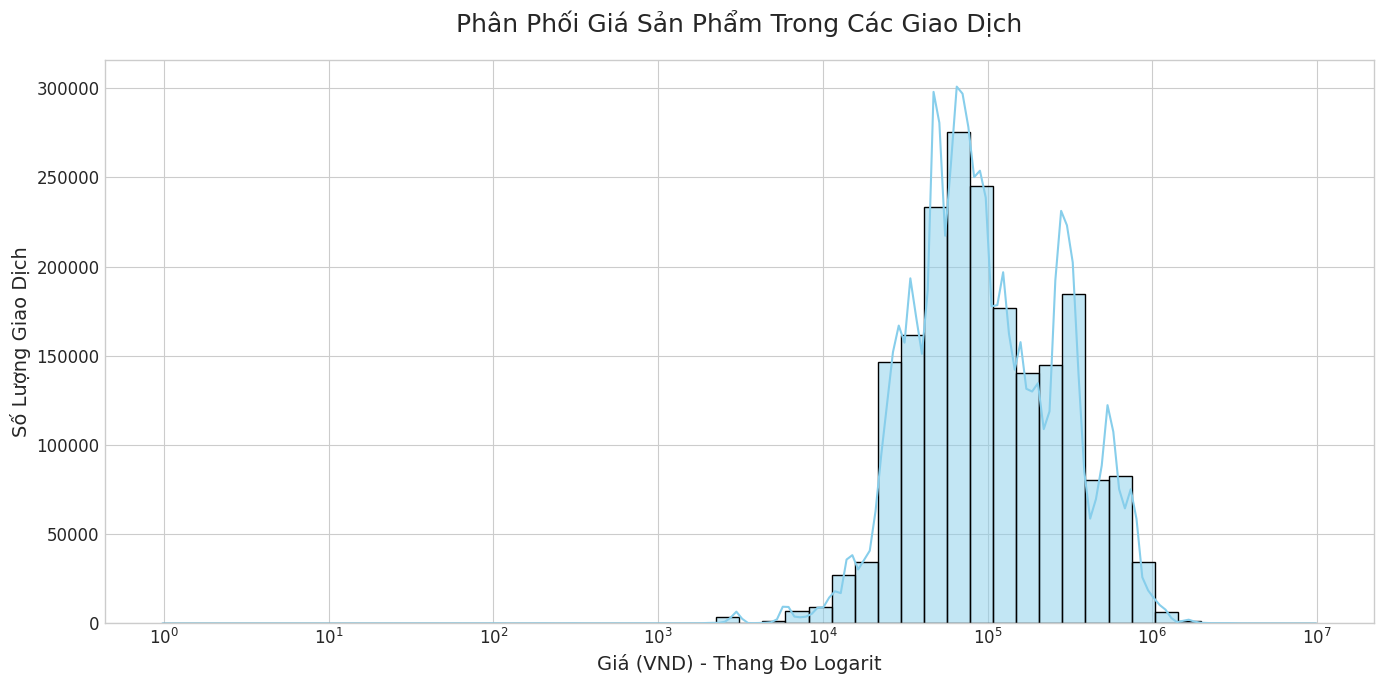

In [7]:

price_series = df_sample["price"].drop_nulls()

plt.figure(figsize=(14, 7))
sns.histplot(price_series.to_pandas().astype(float),
             log_scale=True, bins=50, color='skyblue', edgecolor='black', kde=True)
plt.title('Phân Phối Giá Sản Phẩm Trong Các Giao Dịch', fontsize=18, pad=20)
plt.xlabel('Giá (VND) - Thang Đo Logarit', fontsize=14)
plt.ylabel('Số Lượng Giao Dịch', fontsize=14)
plt.tight_layout()
plt.show()


### Phân tích biến quantity (Số lượng)

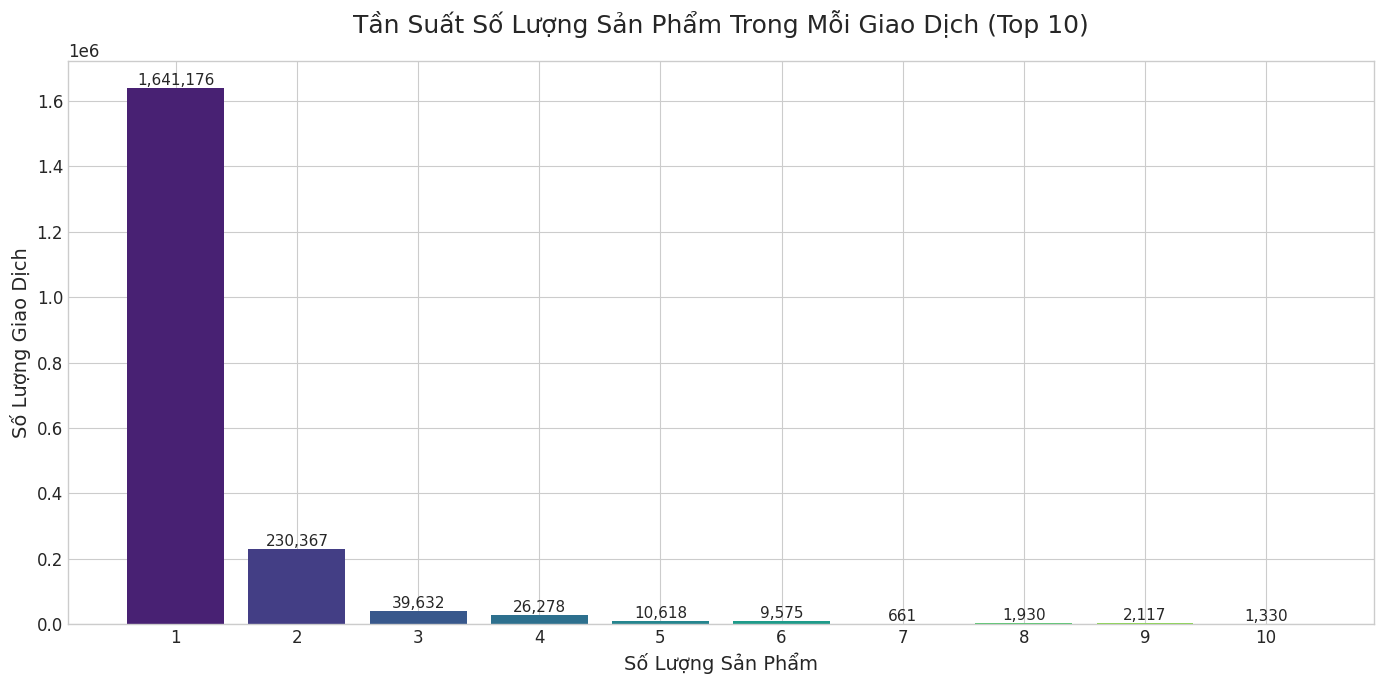

In [8]:

quantity_counts = (
    df_sample['quantity']
    .value_counts()
    .sort('quantity')
    .head(10)
)

plt.figure(figsize=(14, 7))
bars = plt.bar(
    quantity_counts['quantity'].cast(str),
    quantity_counts['count'],
    color=sns.color_palette("viridis", len(quantity_counts))
)

plt.title('Tần Suất Số Lượng Sản Phẩm Trong Mỗi Giao Dịch (Top 10)', fontsize=18, pad=20)
plt.xlabel('Số Lượng Sản Phẩm', fontsize=14)
plt.ylabel('Số Lượng Giao Dịch', fontsize=14)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{int(height):,}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()


### Phân tích biến payment (Phương thức thanh toán)


Phân Phối Phương Thức Thanh Toán :


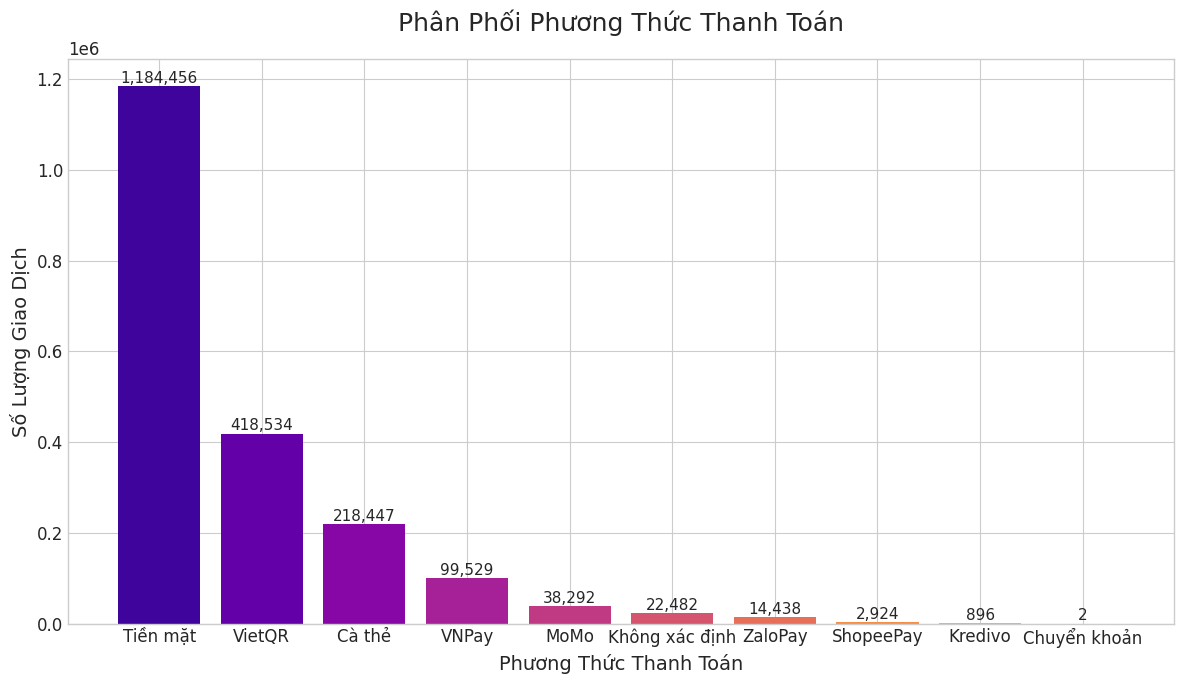

In [9]:
print("\nPhân Phối Phương Thức Thanh Toán :")

payment_counts = (
    df_sample['payment']
    .value_counts()
    .sort('count', descending=True)
)

# Vẽ biểu đồ **thanh dọc**
plt.figure(figsize=(12, 7))
bars = plt.bar(
    payment_counts['payment'].to_list(),
    payment_counts['count'].to_list(),
    color=sns.color_palette("plasma", len(payment_counts))
)

plt.title('Phân Phối Phương Thức Thanh Toán', fontsize=18, pad=20)
plt.xlabel('Phương Thức Thanh Toán', fontsize=14)
plt.ylabel('Số Lượng Giao Dịch', fontsize=14)

for i, v in enumerate(payment_counts['count'].to_list()):
    plt.text(i, v + 1000, f'{v:,}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()


### Phân tích biến channel (Kênh giao dịch

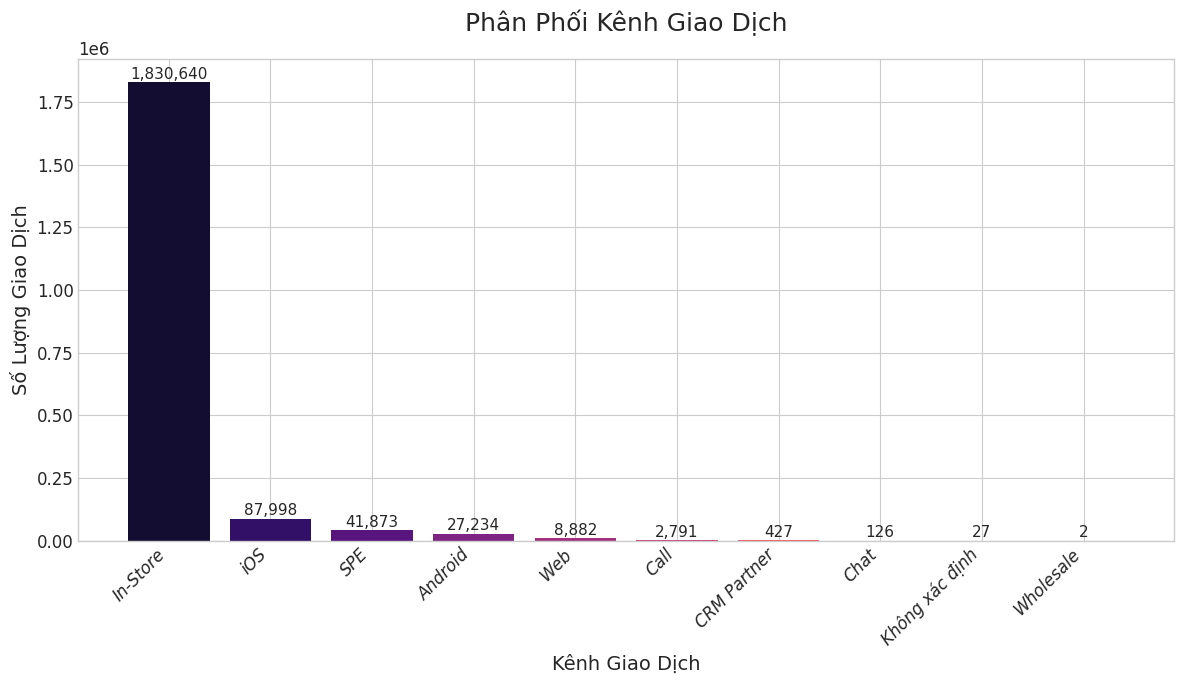

In [10]:
channel_counts = (
    df_sample['channel']
    .value_counts()
    .sort('count', descending=True)
)
plt.figure(figsize=(12, 7))
bars = plt.bar(
    x=channel_counts['channel'].to_list(),
    height=channel_counts['count'].to_list(),
    color=sns.color_palette("magma", len(channel_counts))
)

plt.title('Phân Phối Kênh Giao Dịch', fontsize=18, pad=20)
plt.xlabel('Kênh Giao Dịch', fontsize=14)
plt.ylabel('Số Lượng Giao Dịch', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12, fontstyle='italic')

for i, v in enumerate(channel_counts['count'].to_list()):
    plt.text(i, v + 1000, f'{v:,}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

### Phân tích biến created_date (Thời gian tạo giao dịch)

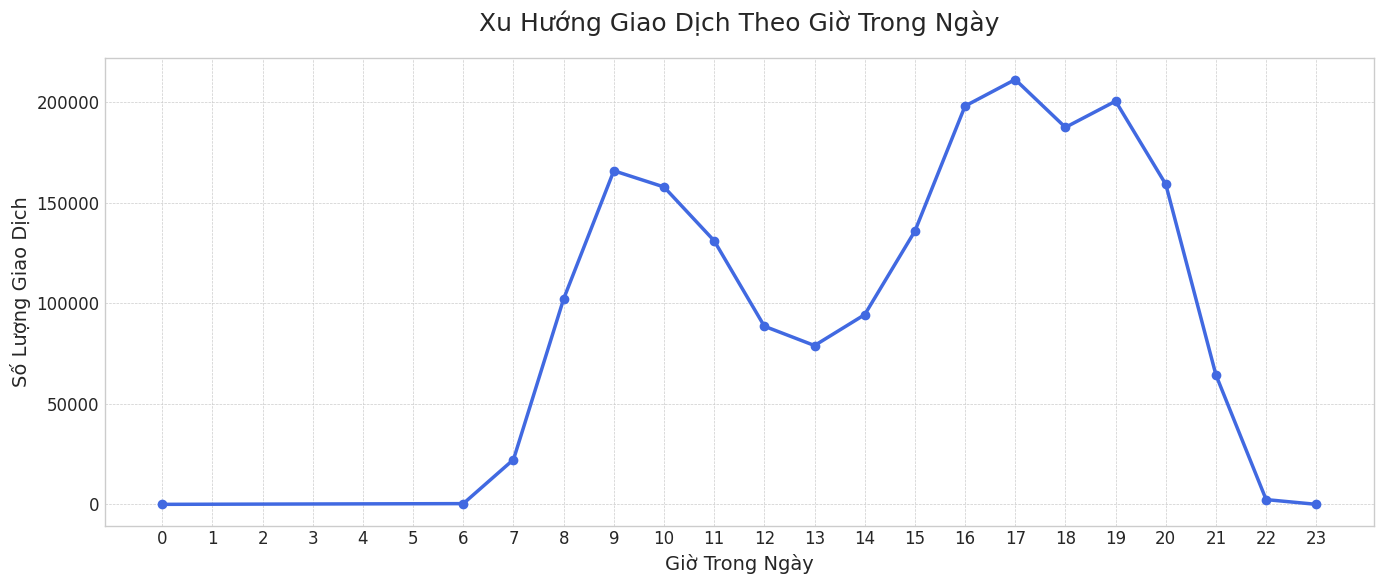

In [11]:
df_datetime = df_sample.with_columns(pl.col("created_date").dt.hour().alias("hour"))  # Tạo cột giờ từ created_date. dt.hour() trích xuất giờ từ datetime, alias("hour") đặt tên cột mới là "hour"

hourly_counts = (
    df_datetime
    .group_by("hour")
    .agg(pl.len().alias("transaction_count"))  # agg la gộp các bản ghi theo giờ và đếm số lượng giao dịch. pl.len() đếm số lượng bản ghi trong mỗi nhóm.
    .sort("hour")
)

# Vẽ biểu đồ đường
plt.figure(figsize=(14, 6))
plt.plot(
    hourly_counts["hour"].to_list(),  #to_list() chuyển từ Series sang List để vẽ. List là kiểu dữ liệu mà matplotlib có thể xử lý trực tiếp.
    hourly_counts["transaction_count"].to_list(),
    marker='o', color='royalblue', linewidth=2.5
)

plt.title('Xu Hướng Giao Dịch Theo Giờ Trong Ngày', fontsize=18, pad=20)
plt.xlabel('Giờ Trong Ngày', fontsize=14)
plt.ylabel('Số Lượng Giao Dịch', fontsize=14)
plt.xticks(range(0, 24))  # Hiển thị tất cả các giờ từ 0 đến 23
plt.grid(True, linestyle='--', linewidth=0.5)  # Thêm lưới cho biểu đồ
plt.tight_layout()
plt.show()

###  Phân tích biến location (Khu vực địa lý)

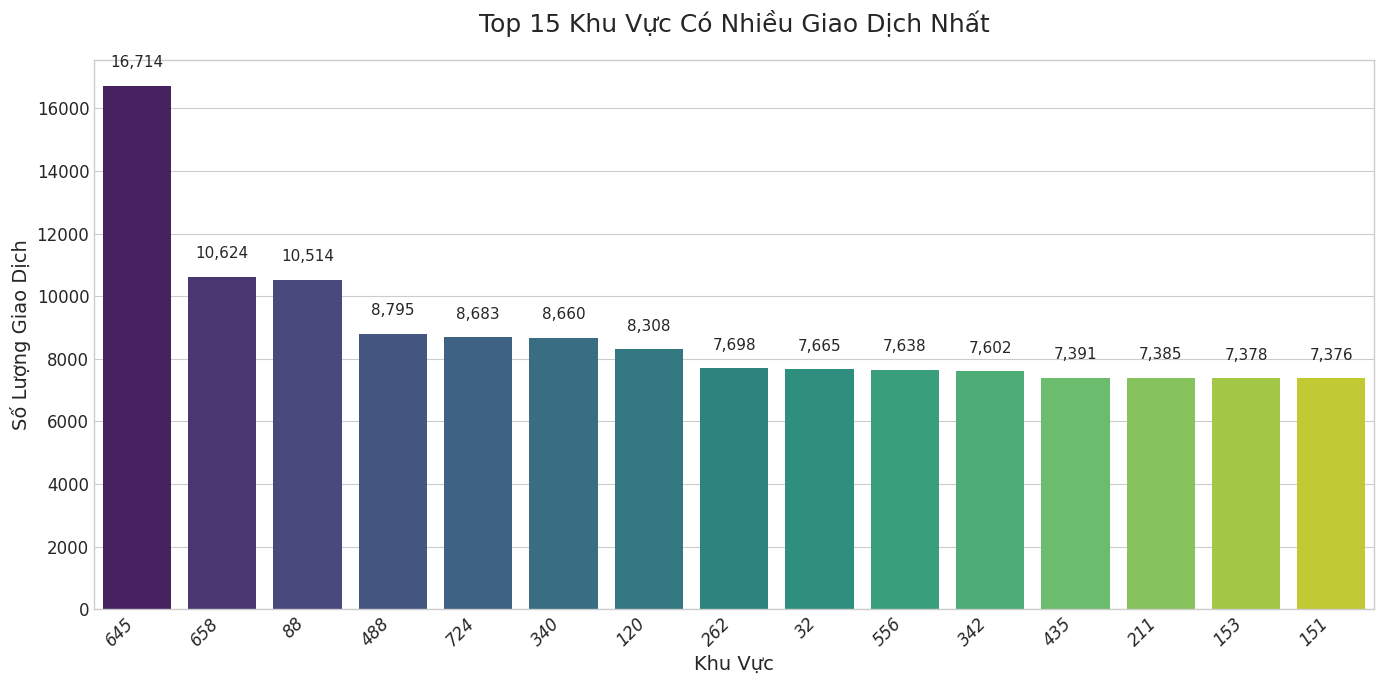

In [12]:
top_locations = (
    df_sample['location']
    .value_counts()
    .sort('count', descending=True)
    .head(15)
)

plt.figure(figsize=(14, 7))
sns.barplot(
    x=top_locations['location'].to_list(),
    y=top_locations['count'].to_list(),
    order=top_locations['location'].to_list(),
    palette="viridis"
)

plt.title('Top 15 Khu Vực Có Nhiều Giao Dịch Nhất', fontsize=18, pad=20)
plt.xlabel('Khu Vực', fontsize=14)
plt.ylabel('Số Lượng Giao Dịch', fontsize=14)
plt.xticks(rotation=45, ha='right', fontstyle='italic')

# Ghi số lượng trên đầu mỗi cột
for i, v in enumerate(top_locations['count'].to_list()):
    plt.text(i, v + 500, f'{v:,}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

###  Phân tích biến event_value vs quantity

Thống kê mô tả cho 'quantity':


statistic,quantity
str,f64
"""count""",2e6
"""null_count""",0.0
"""mean""",1.515004
"""std""",2.207425
"""min""",1.0
"""25%""",1.0
"""50%""",1.0
"""75%""",1.0
"""max""",240.0



Thống kê mô tả cho 'event_value':


statistic,event_value
str,f64
"""count""",2e6
"""null_count""",0.0
"""mean""",1.515004
"""std""",2.207425
"""min""",1.0
"""25%""",1.0
"""50%""",1.0
"""75%""",1.0
"""max""",240.0



Số hàng mà 'quantity' khác 'event_value': 0


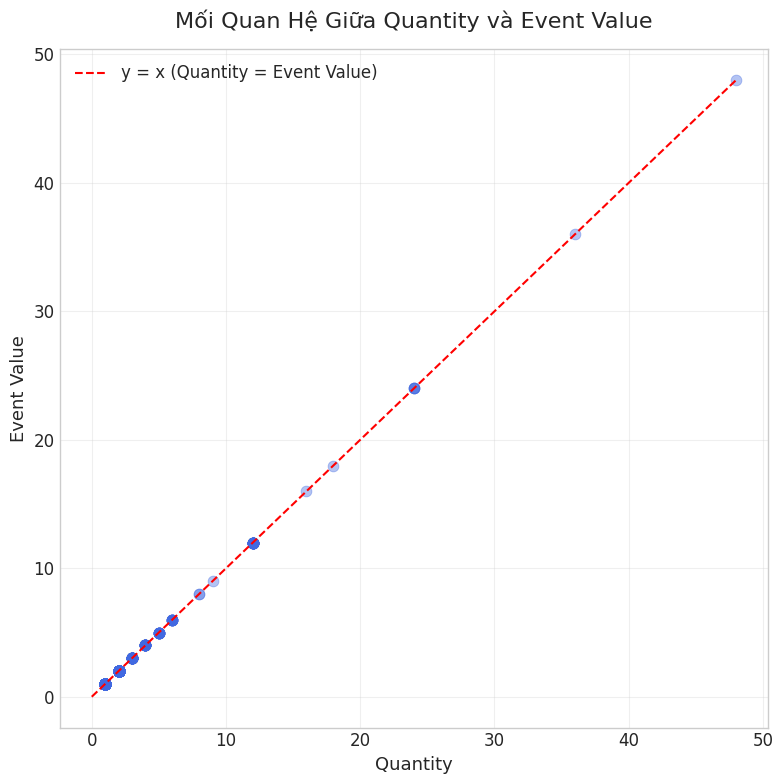

In [13]:
# Thống kê mô tả
print("Thống kê mô tả cho 'quantity':")
display(df_sample.select('quantity').describe())

print("\nThống kê mô tả cho 'event_value':")
display(df_sample.select('event_value').describe())

# Chuyển 2 cột về kiểu số (float) bằng Polars
df_sample = df_sample.with_columns([
    pl.col("quantity").cast(pl.Float64, strict=False),   # cast dung để chuyển kiểu dữ liệu, strict=False để tránh lỗi nếu có giá trị không thể chuyển đổi
    pl.col("event_value").cast(pl.Float64, strict=False)
])

# Đếm số hàng có giá trị khác nhau
diff_count = (
    df_sample
    .filter(pl.col("quantity") != pl.col("event_value"))
    .height
)
print(f"\nSố hàng mà 'quantity' khác 'event_value': {diff_count:,}")    # {:,} định dạng số với dấu phẩy phân tách hàng nghìn

# Trực quan hóa (chuyển sang pandas để dùng seaborn)
sample_size = min(2000, df_sample.height)
sample_df = (
    df_sample.sample(n=sample_size, seed=42)
    .select(["quantity", "event_value"])
    .drop_nulls()
    .to_pandas()
)

plt.figure(figsize=(8, 8))
sns.scatterplot(
    data=sample_df,
    x='quantity', y='event_value',
    alpha=0.4, s=60, color='royalblue', edgecolor=None
)

#  Vẽ đường y=x
max_val = max(sample_df['quantity'].max(), sample_df['event_value'].max())
plt.plot([0, max_val], [0, max_val], 'r--', label='y = x (Quantity = Event Value)')

plt.title('Mối Quan Hệ Giữa Quantity và Event Value', fontsize=16, pad=15)
plt.xlabel('Quantity', fontsize=13)
plt.ylabel('Event Value', fontsize=13)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Phân tích Đơn biến: Thông tin Sản phẩm (Item)

In [14]:
print("\nThống kê mô tả thông tin sản phẩm (Item)")
df_item = lf_item.collect(engine="streaming")
desc = df_item.describe()
display(desc)


Thống kê mô tả thông tin sản phẩm (Item)


statistic,p_id,item_id,price,category_l1_id,category_l1,category_l2_id,category_l2,category_l3_id,category_l3,category_id,category,description,brand,manufacturer,creation_timestamp,is_deleted,created_date,updated_date,sync_status_id,last_sync_date,sync_error_message,image_url,gender_target,age_group,item_type,gp,weight,color,size,origin,volume,material,sale_status,description_new
str,f64,str,f64,f64,str,f64,str,f64,str,f64,str,str,str,str,f64,f64,str,str,f64,str,str,str,str,str,str,f64,f64,str,str,str,str,str,f64,str
"""count""",27332.0,"""27332""",27332.0,27332.0,"""27332""",27332.0,"""27332""",27332.0,"""27332""",27332.0,"""27332""","""27332""","""27332""","""27332""",27332.0,27332.0,"""27332""","""27332""",26546.0,"""26546""","""0""","""27332""","""27332""","""27332""","""27332""",27332.0,0.0,"""27332""","""27332""","""27332""","""27332""","""27332""",27332.0,"""22317"""
"""null_count""",0.0,"""0""",0.0,0.0,"""0""",0.0,"""0""",0.0,"""0""",0.0,"""0""","""0""","""0""","""0""",0.0,0.0,"""0""","""0""",786.0,"""786""","""27332""","""0""","""0""","""0""","""0""",0.0,27332.0,"""0""","""0""","""0""","""0""","""0""",0.0,"""5015"""
"""mean""",106317.679643,null,190456.829467,2836.189192,null,3719.039843,null,4876.768294,null,4920.712718,null,null,null,null,1.6225e9,0.0,"""2021-05-31 17:17:33.849833""","""2025-08-30 04:07:07.766157""",2.0,"""2025-07-18 18:00:25.086391""",null,null,null,null,null,49696.651226,null,null,null,null,null,null,0.167203,null
"""std""",25425.734073,null,511123.971813,1417.521137,null,1935.042044,null,2035.952741,null,1999.308355,null,null,null,null,7.5666e7,null,null,null,0.0,null,null,null,null,null,null,144155.68753,null,null,null,null,null,null,0.373164,null
"""min""",1675.0,"""0000280000019""",0.0,1.0,"""Babycare""",2.0,"""0-1Y""",14.0,"""A2 milk""",4.0,"""0-12M Bodysuit bé trai đùi""","""Với kiểu dáng đơn giản nhưng …","""137 Degrees""","""(L) Địa điểm kinh doanh 1 - Ch…",1.2983e9,0.0,"""2011-02-21 11:54:02.047000""","""2023-12-26 17:21:11.663000""",2.0,"""2025-07-18 17:59:29.898256""",null,"""Không xác định""","""Bé Gái""","""0-10M""","""BCS""",0.0,null,"""Bạc""","""0 tháng""",""" Singapore, Thụy Sĩ""","""1 lít""",""" Vải không dệt, bông cellulose…",0.0,"""Chi tiết sản phẩm …"
"""25%""",88905.0,null,49000.0,2788.0,null,2038.0,null,3516.0,null,3522.0,null,null,null,null,1.5755e9,null,"""2019-12-04 18:24:16.260000""","""2025-08-18 09:59:19.847000""",2.0,"""2025-07-18 17:59:29.898256""",null,null,null,null,null,0.0,null,null,null,null,null,null,0.0,null
"""50%""",104510.0,null,119000.0,3292.0,null,3958.0,null,5254.0,null,5511.0,null,null,null,null,1.6358e9,null,"""2021-11-01 13:19:26.080000""","""2025-09-26 08:05:23.153000""",2.0,"""2025-07-18 17:59:29.898256""",null,null,null,null,null,25047.0,null,null,null,null,null,null,0.0,null
"""75%""",120262.0,null,199000.0,3292.0,null,4571.0,null,6984.0,null,6988.0,null,null,null,null,1.6699e9,null,"""2022-12-01 15:40:42.260000""","""2025-09-27 00:05:36.233000""",2.0,"""2025-07-18 17:59:29.898256""",null,null,null,null,null,65532.0,null,null,null,null,null,null,0.0,null
"""max""",167147.0,"""7497000000006""",2.099e7,7376.0,"""Đồ chơi & Sách""",7492.0,"""Đồ uống""",7493.0,"""Đồ hộp""",7501.0,"""Động vật mô hình""","""﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿Bỉm …","""Đức Thành""","""﻿Shantou City Chenghai Jia Ron…",1.7559e9,0.0,"""2025-08-22 17:35:14.377000""","""2025-10-01 08:05:42.990000""",2.0,"""2025-07-21 10:59:04.045058""",null,"""Không xác định""","""Unisex""","""[""Từ 6M"", ""Từ 9M"", ""Từ 1Y""]""","""Ứng dụng mẹ và bé""",5.54136e6,null,"""Đỏ""","""XXL(15-25kg) - 26 miếng""","""Ấn Độ, Bulgaria""","""hộp 3 lọ x 250ml""","""﻿100% cotton﻿<br>""",1.0,"""Xin lỗi, nhưng tôi không thể t…"


In [15]:
print("\nThông tin chi tiết các cột:")
schema_info = []

schema = lf_item.collect_schema()
for col_name in schema.names():
    col_type = schema[col_name]
    nulls = df_item[col_name].null_count()
    uniques = df_item[col_name].n_unique()
    schema_info.append({
        "Cột": col_name,
        "Kiểu dữ liệu": str(col_type),
        "Số giá trị null": int(nulls),
        "Số giá trị duy nhất": int(uniques)
    })

schema_df = pl.DataFrame(schema_info)
display(schema_df)


Thông tin chi tiết các cột:


Cột,Kiểu dữ liệu,Số giá trị null,Số giá trị duy nhất
str,str,i64,i64
"""p_id""","""Int32""",0,27332
"""item_id""","""String""",0,27332
"""price""","""Decimal(precision=38, scale=4)""",0,733
"""category_l1_id""","""Int32""",0,15
"""category_l1""","""String""",0,15
…,…,…,…
"""origin""","""String""",0,293
"""volume""","""String""",0,138
"""material""","""String""",0,583


### Phân tích biến price (Giá sản phẩm)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


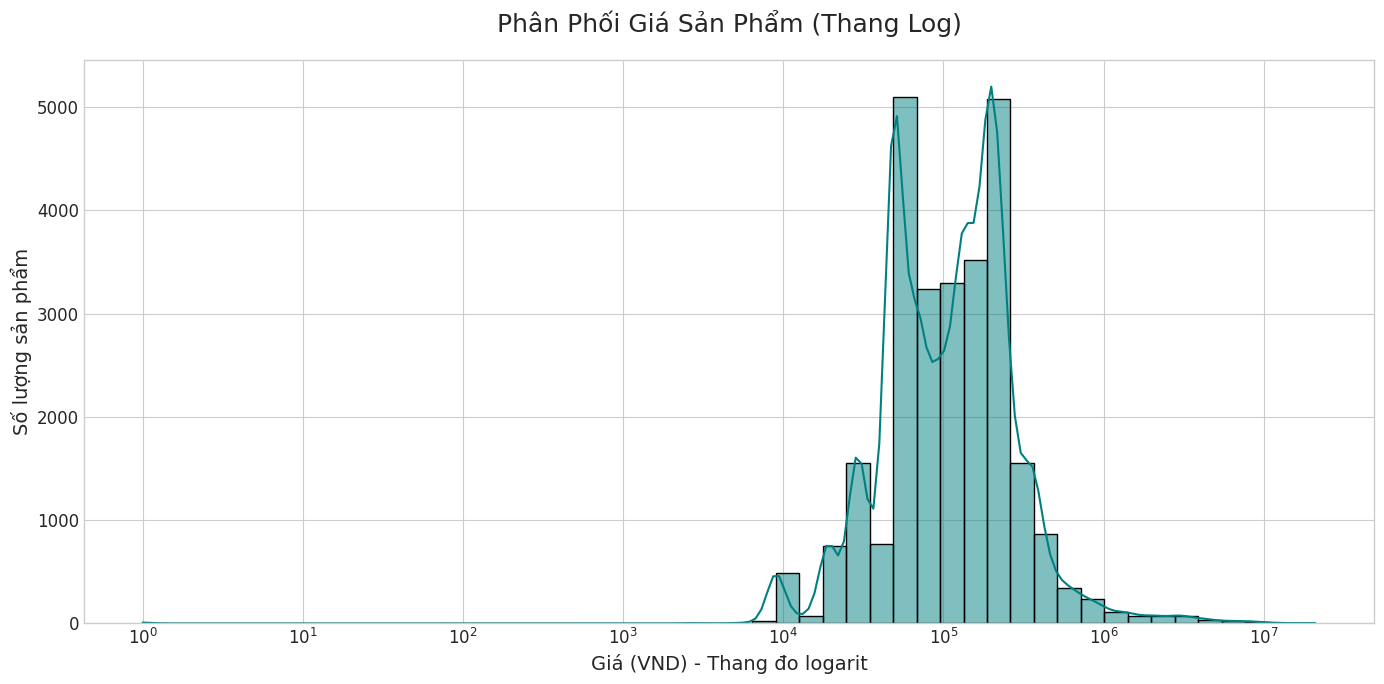

In [16]:
price_series_positive = df_item.filter(pl.col("price") > 0)["price"].drop_nulls()

plt.figure(figsize=(14, 7))
sns.histplot(
    price_series_positive.to_pandas().astype(float),  
    log_scale=True, bins=50, color='teal', edgecolor='black', kde=True
)
plt.title('Phân Phối Giá Sản Phẩm (Thang Log)', fontsize=18, pad=20)
plt.xlabel('Giá (VND) - Thang đo logarit', fontsize=14)
plt.ylabel('Số lượng sản phẩm', fontsize=14)
plt.tight_layout()
plt.show()

### TOP DANH MỤC SẢN PHẨM

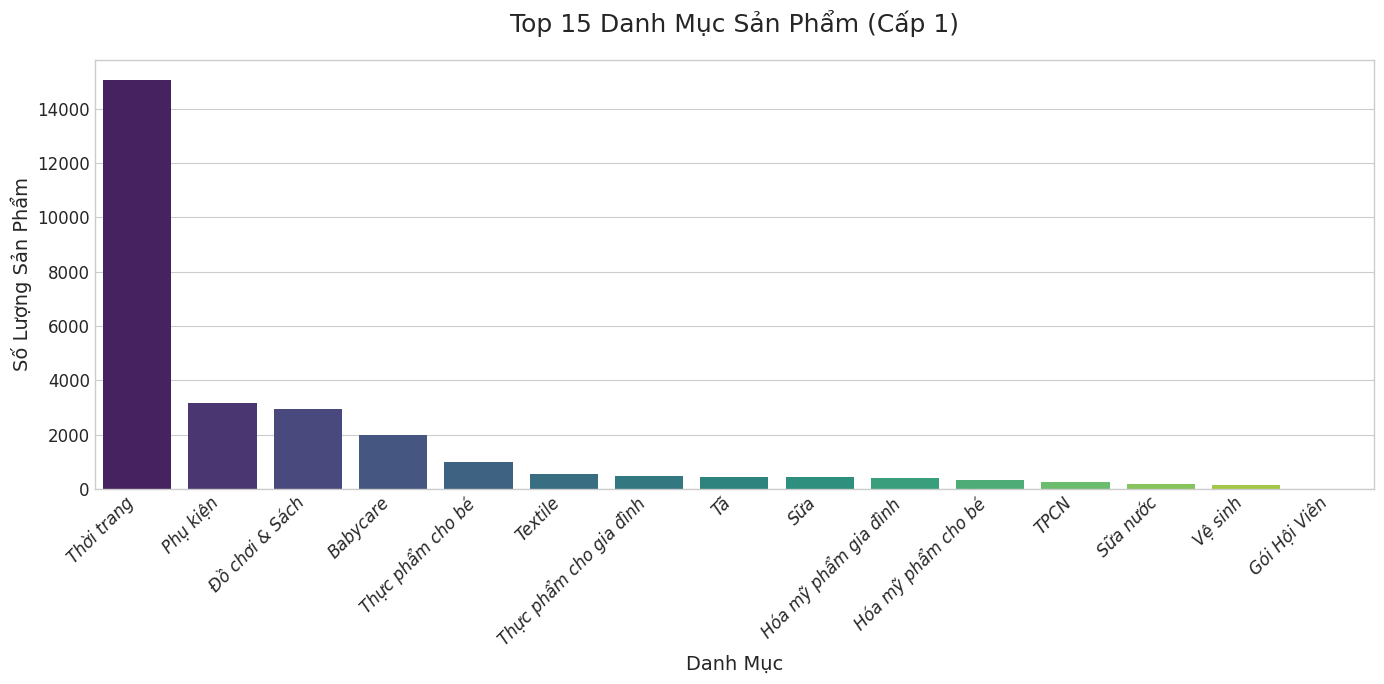

In [17]:
category_counts = (
    df_item['category_l1']
    .value_counts()
    .sort('count', descending=True)
    .head(15)
    .to_pandas()
)
plt.figure(figsize=(14, 7))
sns.barplot(data=category_counts, x='category_l1', y='count', palette='viridis')
plt.title('Top 15 Danh Mục Sản Phẩm (Cấp 1)', fontsize=18, pad=20)
plt.xlabel('Danh Mục', fontsize=14)
plt.ylabel('Số Lượng Sản Phẩm', fontsize=14)
plt.xticks(rotation=45, ha='right', fontstyle='italic')
plt.tight_layout()
plt.show()

###  Phân tích biến brand (Thương hiệu)

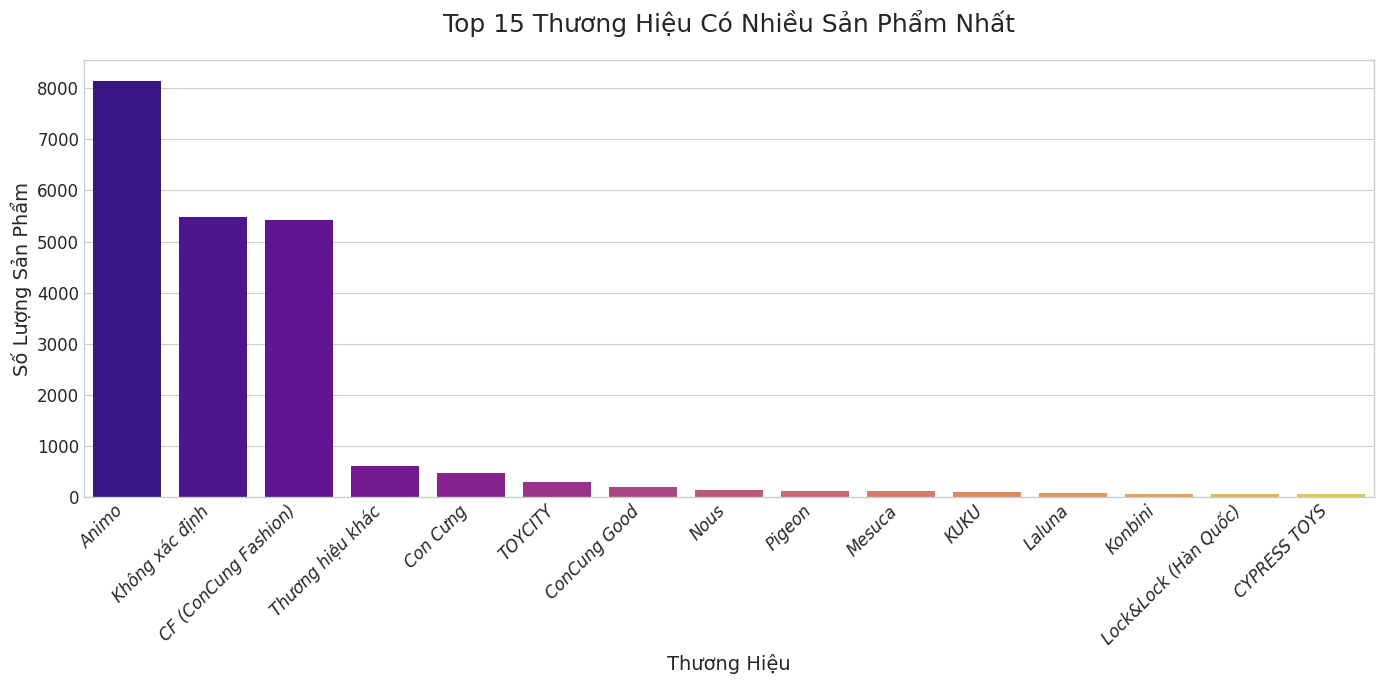

In [18]:
brand_counts = (
    df_item['brand']
    .value_counts()
    .sort('count', descending=True)
    .head(15)
    .to_pandas()
)
plt.figure(figsize=(14, 7))
sns.barplot(data=brand_counts, x='brand', y='count', palette='plasma')
plt.title('Top 15 Thương Hiệu Có Nhiều Sản Phẩm Nhất', fontsize=18, pad=20)
plt.xlabel('Thương Hiệu', fontsize=14)
plt.ylabel('Số Lượng Sản Phẩm', fontsize=14)
plt.xticks(rotation=45, ha='right', fontstyle='italic')
plt.tight_layout()
plt.show()

#### TỶ LỆ TRẠNG THÁI BÁN HÀNG

Bảng phân phối trạng thái khuyến mãi: 
shape: (2, 3)
┌───────────────────────┬──────────┬───────────┐
│ trang_thai_khuyen_mai ┆ so_luong ┆ phan_tram │
│ ---                   ┆ ---      ┆ ---       │
│ str                   ┆ u32      ┆ f64       │
╞═══════════════════════╪══════════╪═══════════╡
│ Khuyến mãi            ┆ 4570     ┆ 16.720328 │
│ Không khuyến mãi      ┆ 22762    ┆ 83.279672 │
└───────────────────────┴──────────┴───────────┘


/tmp/ipykernel_19/880428780.py:10: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("so_luong"))


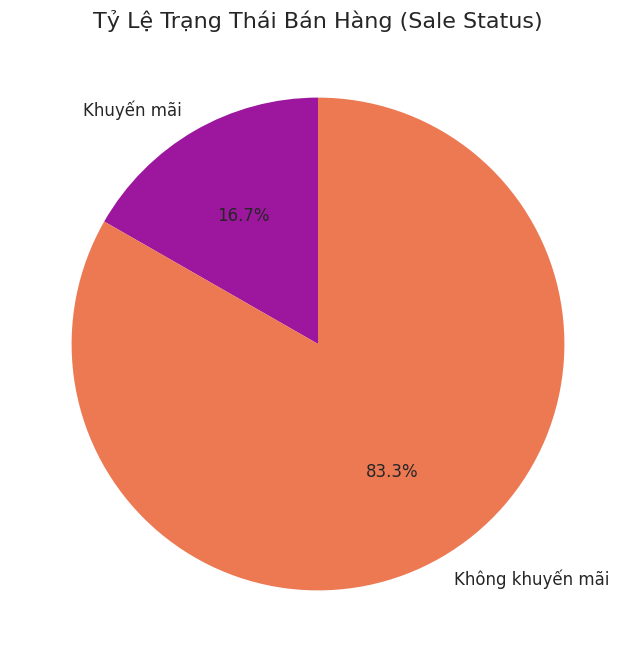

In [19]:
lf_items_sale_status = lf_item.with_columns(
    pl.when(pl.col("sale_status") == 1)
    .then(pl.lit("Khuyến mãi"))
    .otherwise(pl.lit("Không khuyến mãi"))
    .alias("trang_thai_khuyen_mai")
)

sale_status_dist = (
    lf_items_sale_status.group_by("trang_thai_khuyen_mai")
    .agg(pl.count().alias("so_luong"))
    .with_columns(
        (pl.col("so_luong") / pl.col("so_luong").sum() * 100).alias("phan_tram")
    )
    .sort("trang_thai_khuyen_mai")
)

print("Bảng phân phối trạng thái khuyến mãi: ")
print(sale_status_dist.collect())

status_count = sale_status_dist.collect().to_pandas()

plt.figure(figsize=(10, 8))
plt.pie(
    status_count['phan_tram'],
    labels=status_count['trang_thai_khuyen_mai'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('plasma', len(status_count)),
)

plt.title('Tỷ Lệ Trạng Thái Bán Hàng (Sale Status)', fontsize=16)
plt.ylabel('')
plt.show()


### XU HƯỚNG THÊM SẢN PHẨM THEO THỜI GIAN


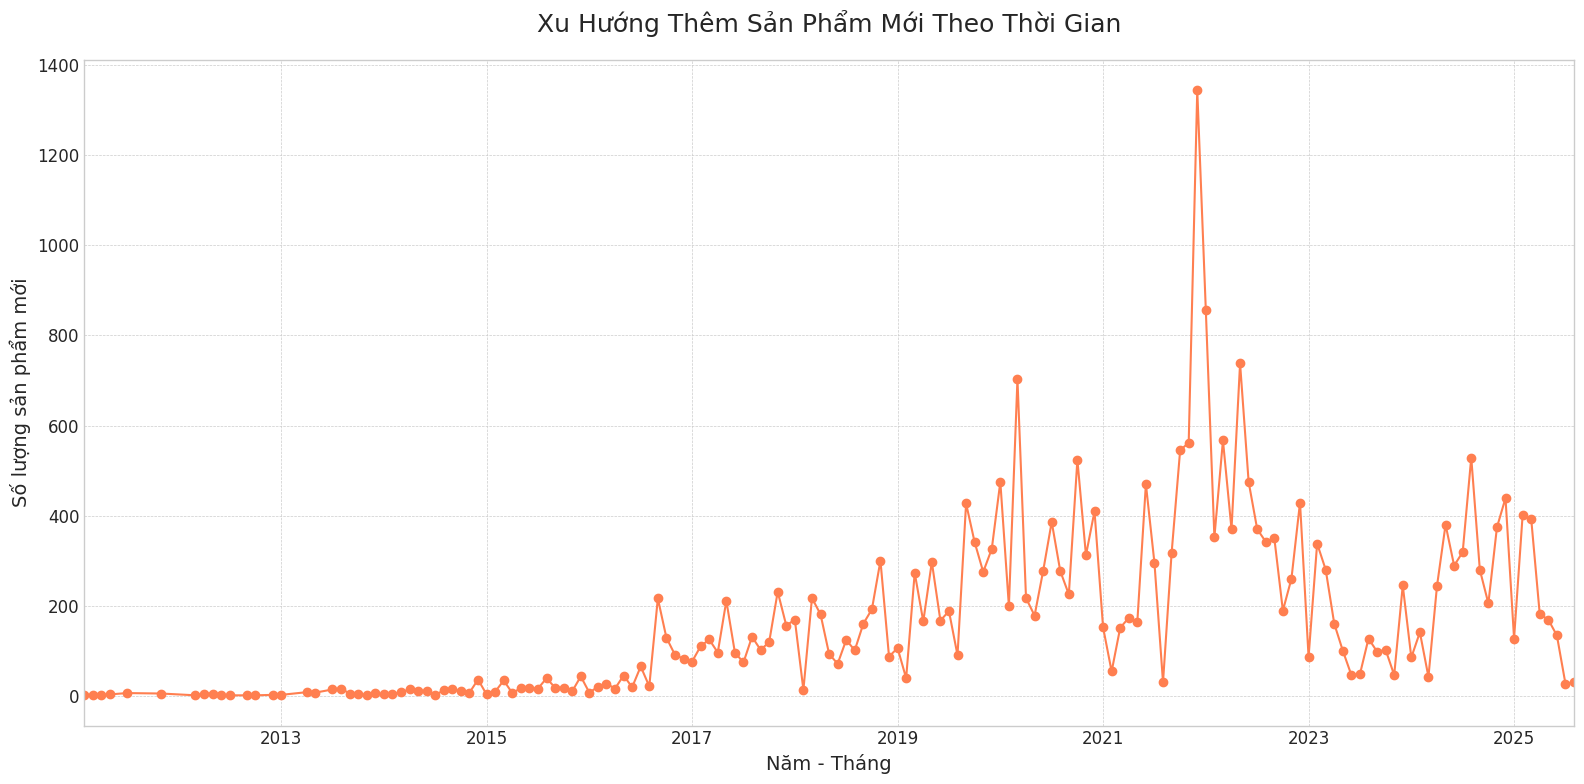

In [20]:
if 'created_date' in df_item.columns:
    df_dates = df_item.select('created_date').to_pandas()
    df_dates['created_date'] = pd.to_datetime(df_dates['created_date'], errors='coerce')
    df_dates = df_dates.dropna(subset=['created_date'])
    df_dates['year_month'] = df_dates['created_date'].dt.to_period('M')
    monthly_counts = df_dates['year_month'].value_counts().sort_index()

    plt.figure(figsize=(16, 8))
    monthly_counts.plot(kind='line', marker='o', color='coral')
    plt.title('Xu Hướng Thêm Sản Phẩm Mới Theo Thời Gian', fontsize=18, pad=20)
    plt.xlabel('Năm - Tháng', fontsize=14)
    plt.ylabel('Số lượng sản phẩm mới', fontsize=14)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()
else:
    print("Không có cột `created_date` trong bảng sản phẩm, bỏ qua biểu đồ thời gian.")

### NGUỒN GỐC XUẤT XỨ

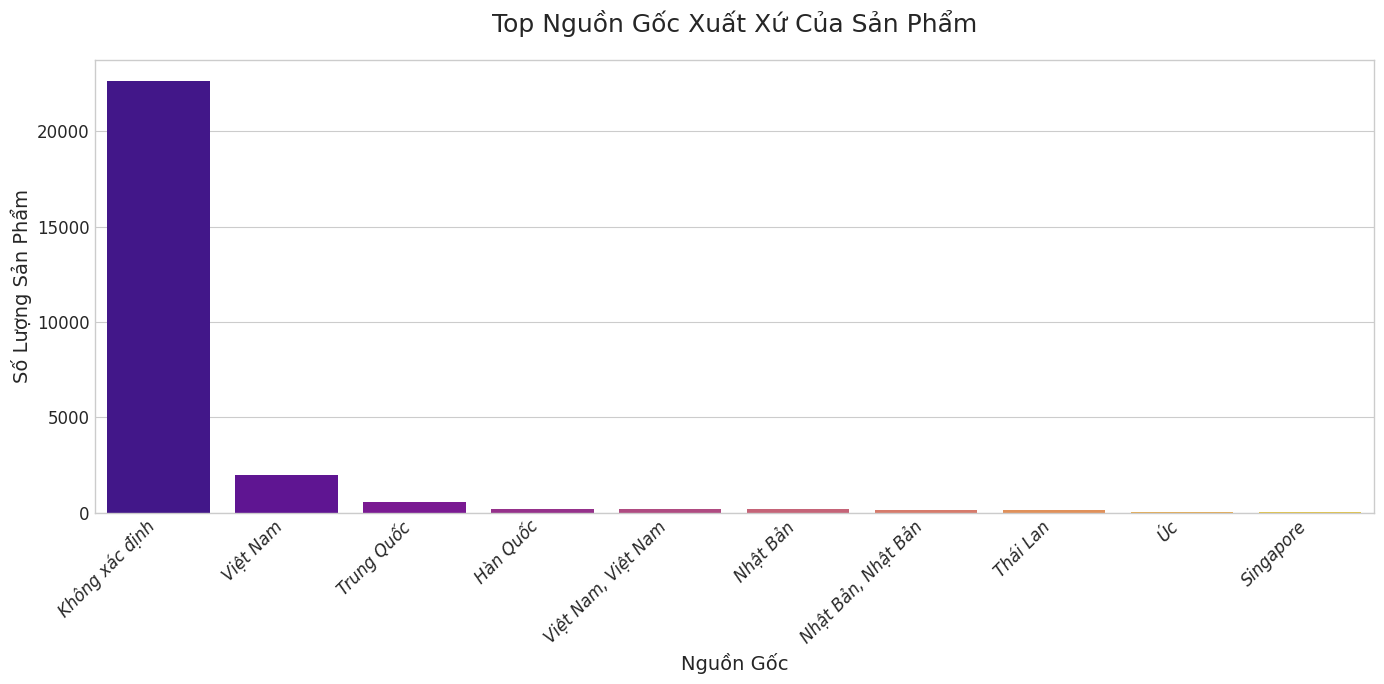

In [21]:
if 'origin' in df_item.columns:
    origin_counts = (
        df_item['origin']
        .value_counts()
        .sort('count', descending=True)
        .head(10)
        .to_pandas()
    )
    plt.figure(figsize=(14, 7))
    sns.barplot(data=origin_counts, x='origin', y='count', palette='plasma')
    plt.title('Top Nguồn Gốc Xuất Xứ Của Sản Phẩm', fontsize=18, pad=20)
    plt.xlabel('Nguồn Gốc', fontsize=14)
    plt.ylabel('Số Lượng Sản Phẩm', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontstyle='italic')
    plt.tight_layout()
    plt.show()
else:
    print("Không có cột `origin` trong bảng sản phẩm, bỏ qua biểu đồ nguồn gốc.")

In [22]:
all_origin = lf_item.select("origin").unique().collect()

print("Toàn bộ dữ liệu trong cột 'origin': ")
print(all_origin)

Toàn bộ dữ liệu trong cột 'origin': 
shape: (293, 1)
┌─────────────────────────────────┐
│ origin                          │
│ ---                             │
│ str                             │
╞═════════════════════════════════╡
│ Thụy Sĩ                         │
│ Đài Loan , Đài Loan             │
│ Sản xuất tại Thái Lan           │
│ Nga, Nga                        │
│ <span id="docs-internal-guid-d… │
│ …                               │
│ Ba Lan                          │
│ Hoa Kỳ, Hoa Kỳ                  │
│ 37x9x15cm, Trung Quốc           │
│ Trung Quốc, Đức                 │
│ Thổ Nhĩ Kỳ, Thổ Nhĩ Kỳ          │
└─────────────────────────────────┘


In [23]:

# 1. Tách các chuỗi có nhiều quốc gia thành một danh sách
lf_origin_split = lf_item.with_columns(
    pl.col("origin").str.split(",")
)

# 2. Mở rộngL tạo ra các dòng mới cho mỗi quốc gia trong danh sách
lf_origin_exploded = lf_origin_split.explode("origin")

# 3. Chuẩn hóa: loại bỏ khoảng trắng thừa, chuyển tất cả về định dạng viết hoa chữ cái đầu, tạo cột mới tên là 'origin_cleaned'
lf_origin_cleaned = lf_origin_exploded.with_columns(
    pl.col("origin").str.strip_chars().str.to_titlecase().alias("origin_cleaned")
)
# 4. Loại bỏ trùng lặp cuối cùng: xử lý các trường hợp trùng quốc gia vd: "Trung Quốc, Trung Quốc"
lf_origin_final = lf_origin_cleaned.unique(subset=['item_id', 'origin_cleaned'])



Bảng phân phối nguồn gốc xuất xứ:
   origin_cleaned  so_luong
0  Không Xác Định     22627
1        Việt Nam      2389
2      Trung Quốc       698
3        Nhật Bản       462
4        Hàn Quốc       262
5        Thái Lan       197
6              Mỹ       123
7              Úc        85
8       Singapore        69
9             Đức        51


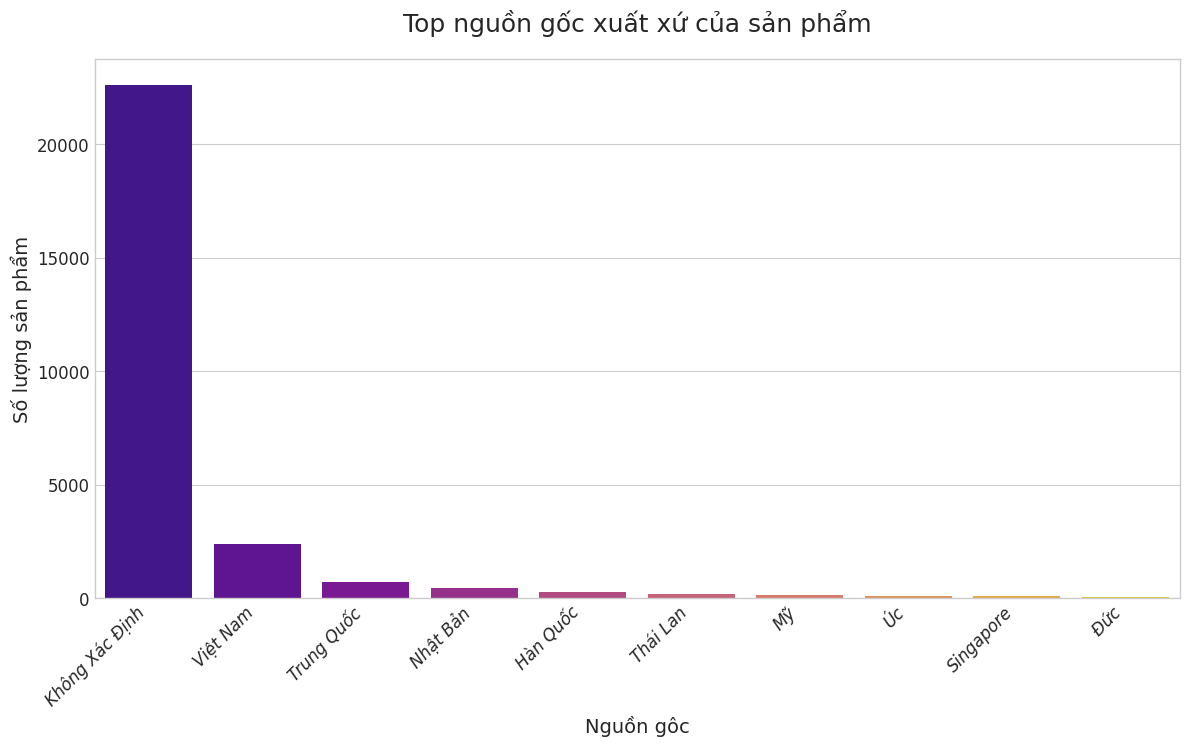

In [24]:
origin_dist_cleaned = (
    lf_origin_final.filter(pl.col("origin_cleaned").is_not_null() & (pl.col('origin_cleaned') != ""))
    .group_by("origin_cleaned")
    .agg(pl.len().alias("so_luong"))
    .sort("so_luong", descending=True)
    .head(10)
)

print("Bảng phân phối nguồn gốc xuất xứ:")
origin_dist = origin_dist_cleaned.collect().to_pandas()
print(origin_dist)

plt.figure(figsize=(14, 7))
sns.barplot(data=origin_dist, x='origin_cleaned', y='so_luong', palette='plasma')
plt.title("Top nguồn gốc xuất xứ của sản phẩm", fontsize=18, pad=20)
plt.xlabel("Nguồn gôc", fontsize=14)
plt.ylabel("Số lượng sản phẩm", fontsize=14)
plt.xticks(rotation=45, ha='right', fontstyle='italic')
plt.show()

### PHÂN PHỐI SẢN PHẨM THEO NHÓM TUỔI MỤC TIÊU

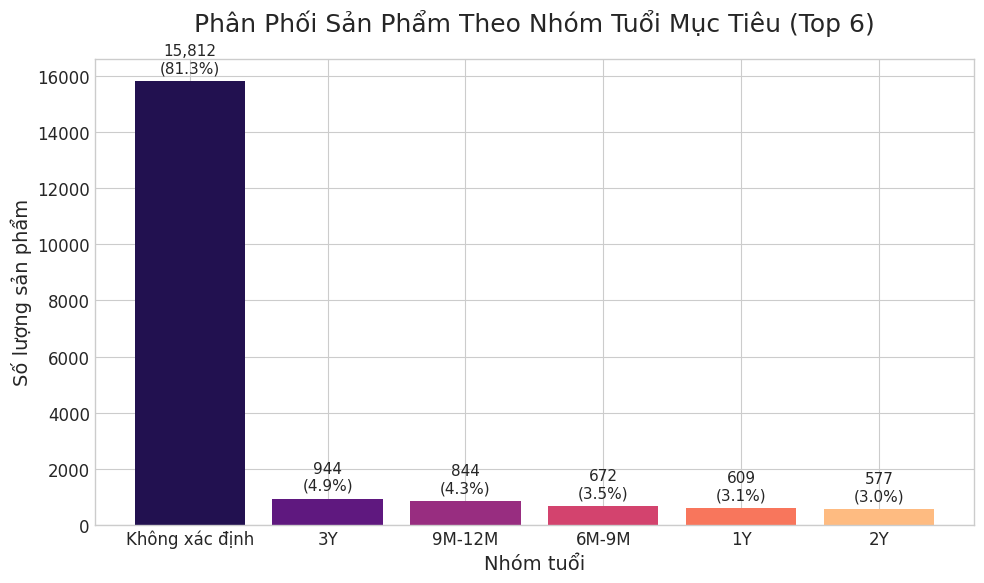

In [25]:
possible_cols = ['age_group', 'target_age', 'age_range']
age_col = next((c for c in possible_cols if c in df_item.columns), None)

if age_col:
    # Dành cho Pandas DataFrame
    df_age = df_item[[age_col]].to_pandas().dropna().copy()

    # Chuẩn hóa dữ liệu cột nhóm tuổi
    df_age[age_col] = (
        df_age[age_col]
        .astype(str)
        .replace(["nan", "None", "NULL"], np.nan)
        .str.replace(r"[\[\]\'\"]", "", regex=True)
        .str.replace(r"Từ\s*", "", regex=True)
        .str.replace(r"\s*M", "M", regex=True)
        .str.replace(r"\s*Y", "Y", regex=True)
        .str.strip()
    )

    # Đếm tần suất xuất hiện của từng nhóm tuổi (Top 6)
    age_counts = (
        df_age[age_col]
        .value_counts()
        .head(6)
        .sort_values(ascending=False)
    )

    # Vẽ biểu đồ
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(age_counts.index, age_counts.values,
                  color=sns.color_palette("magma", len(age_counts)))

    total = age_counts.sum()
    for bar, count in zip(bars, age_counts.values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200,
                f'{count:,}\n({count/total*100:.1f}%)',
                ha='center', va='bottom', fontsize=11)

    ax.set_title('Phân Phối Sản Phẩm Theo Nhóm Tuổi Mục Tiêu (Top 6)', fontsize=18, pad=20)
    ax.set_xlabel('Nhóm tuổi', fontsize=14)
    ax.set_ylabel('Số lượng sản phẩm', fontsize=14)
    plt.xticks(rotation=0, ha='center', fontsize=12)
    plt.tight_layout()
    plt.show()

else:
    print("Không tìm thấy cột nhóm tuổi trong dữ liệu sản phẩm.")

## Thông tin Người dùng (User)

In [26]:
print("\nThống kê mô tả thông tin người dùng (User)")
df_user = lf_user.collect(engine="streaming")
desc = df_user.describe()
display(desc)


Thống kê mô tả thông tin người dùng (User)


statistic,customer_id,gender,location,province,membership,timestamp,created_date,updated_date,sync_status_id,last_sync_date,sync_error_message,region,location_name,install_app,install_date,district,user_id,is_deleted
str,f64,str,f64,str,str,f64,str,str,f64,str,str,str,str,str,f64,str,str,f64
"""count""",4.573964e6,"""4573964""",4.573964e6,"""4573964""","""4573964""",4.573964e6,"""4573964""","""4573964""",4.235679e6,"""4235679""","""0""","""4573964""","""4573964""","""4573964""",4.573964e6,"""4573964""","""4573964""",4.573964e6
"""null_count""",0.0,"""0""",0.0,"""0""","""0""",0.0,"""0""","""0""",338285.0,"""338285""","""4573964""","""0""","""0""","""0""",0.0,"""0""","""0""",0.0
"""mean""",6.1266e6,null,554.053518,null,null,1.6712e9,"""2022-12-16 22:48:44.025646""","""2025-06-11 05:52:40.770554""",2.0,"""2025-07-16 15:20:34.188640""",null,null,null,null,1.6841e9,null,null,0.0
"""std""",2.4412e6,null,295.523361,null,null,7.9743e7,null,null,0.0,null,null,null,null,null,7.1374e7,null,null,null
"""min""",14732.0,"""Khác""",42.0,"""An Giang""","""Diamond""",1.3064e9,"""2011-05-25 21:11:51.677000""","""2019-06-30 08:38:47.100000""",2.0,"""2025-07-16 11:54:29.816986""",null,"""Bắc Trung Bộ""","""AGI - 110 Quốc Lộ 91""","""Android""",1.3063e9,""" Vũng Liêm""","""000004697bc1f0ecab42b6a3c2f0bc…",0.0
"""25%""",4.53268e6,null,302.0,null,null,1.6343e9,"""2021-10-15 10:09:34.280000""","""2025-07-07 15:33:10.201316""",2.0,"""2025-07-16 11:58:58.022193""",null,null,null,null,1.6550e9,null,null,null
"""50%""",6.843955e6,null,547.0,null,null,1.6960e9,"""2023-09-29 16:33:25.217000""","""2025-07-07 15:33:10.201316""",2.0,"""2025-07-16 12:03:34.550186""",null,null,null,null,1.7054e9,null,null,null
"""75%""",8.029649e6,null,765.0,null,null,1.7312e9,"""2024-11-09 14:38:22.223000""","""2025-08-02 10:54:03.860000""",2.0,"""2025-07-16 12:11:53.888687""",null,null,null,null,1.7366e9,null,null,null
"""max""",9.264159e6,"""Nữ""",1310.0,"""Đồng Tháp""","""Standard""",1.7593e9,"""2025-09-30 22:00:36.623000""","""2025-09-30 23:22:08.957000""",2.0,"""2025-07-21 11:19:29.058389""",null,"""Đồng bằng sông Cửu Long""","""ĐTH - Trần Hưng Đạo""","""iOS""",1.7592e9,"""Ứng Hòa""","""fffffbd469d500229dd000e9fc48ed…",0.0


In [27]:
schema_info = []
for col_name, dtype in zip(df_user.columns, df_user.dtypes):
    nulls = df_user[col_name].null_count()
    uniques = df_user[col_name].n_unique()
    schema_info.append({
        "Cột": col_name,
        "Kiểu dữ liệu": str(dtype),
        "Số giá trị null": int(nulls),
        "Số giá trị duy nhất": int(uniques)
    })
display(pl.DataFrame(schema_info))


Cột,Kiểu dữ liệu,Số giá trị null,Số giá trị duy nhất
str,str,i64,i64
"""customer_id""","""Int32""",0,4573964
"""gender""","""String""",0,3
"""location""","""Int32""",0,995
"""province""","""String""",0,126
"""membership""","""String""",0,3
…,…,…,…
"""install_app""","""String""",0,11
"""install_date""","""Int64""",0,4919
"""district""","""String""",0,1339


###  PHÂN PHỐI GIỚI TÍNH

In [28]:
gender_counts = (
    df_user['gender']
    .drop_nulls()
    .value_counts()
    .sort('count', descending=True)
    .to_pandas()
)

print(gender_counts)

  gender    count
0     Nữ  3424887
1    Nam  1149069
2   Khác        8


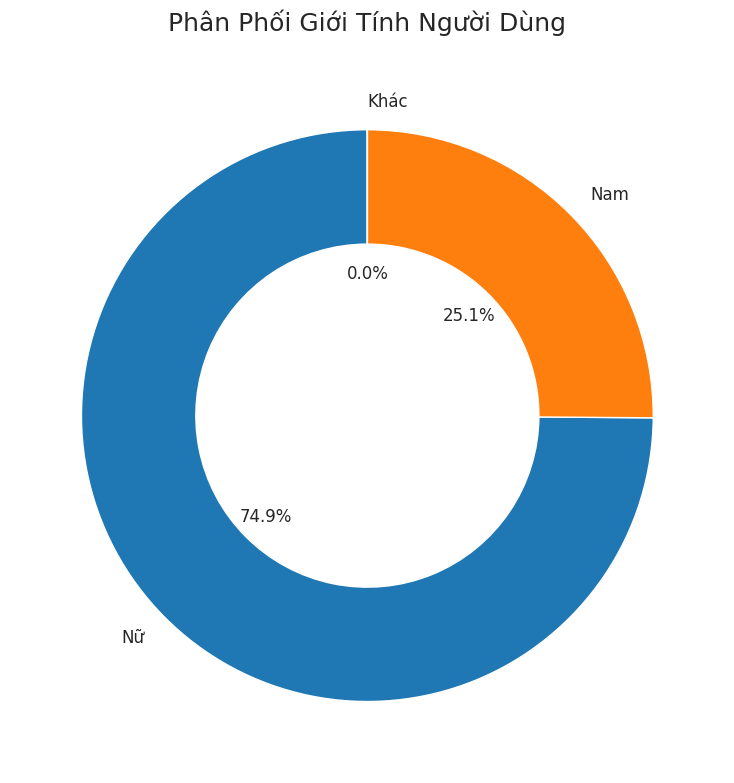

In [29]:
plt.figure(figsize=(8, 8))
plt.pie(
    gender_counts['count'],
    labels=gender_counts['gender'],
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.5,
    wedgeprops=dict(width=0.4, edgecolor='w')
)
plt.title('Phân Phối Giới Tính Người Dùng', fontsize=18, pad=20)
plt.tight_layout()
plt.show()

#### PHÂN PHỐI CẤP ĐỘ THÀNH VIÊN

In [30]:
membership_counts = (
    df_user['membership']
    .drop_nulls()
    .value_counts()
    .sort('count', descending=True)
    .to_pandas()
)

print(membership_counts)

  membership    count
0   Standard  4242946
1       Gold   255173
2    Diamond    75845


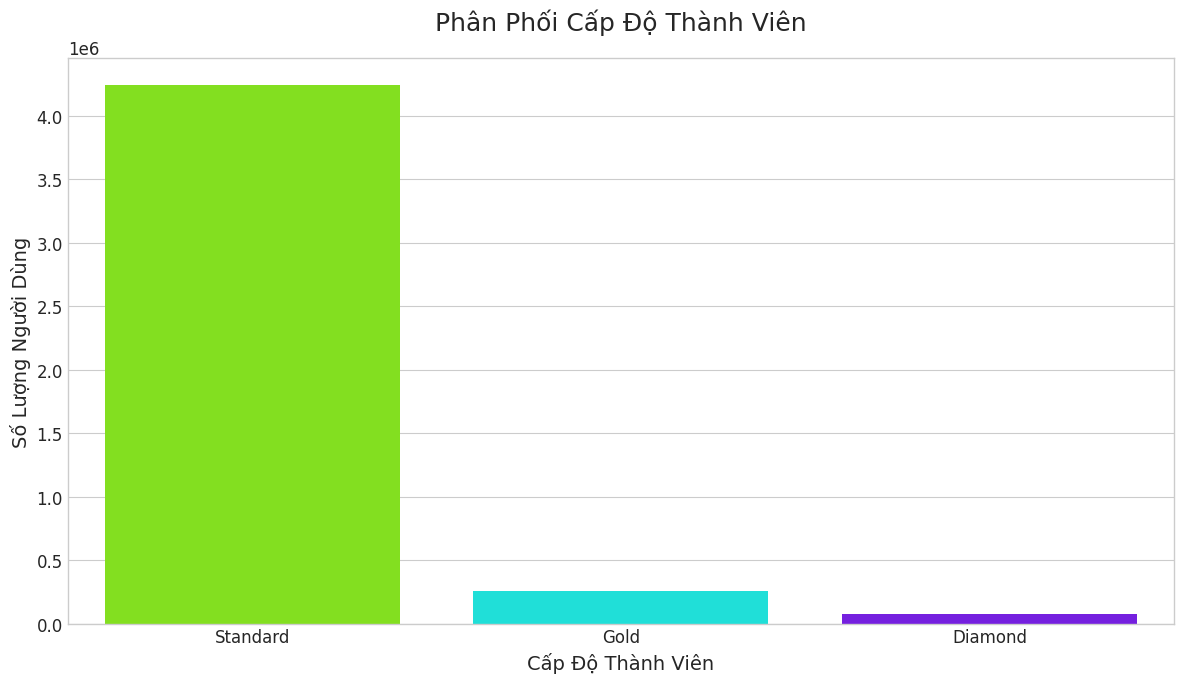

In [31]:
plt.figure(figsize=(12, 7))
sns.barplot(
    data=membership_counts,
    x='membership', y='count',
    palette='hsv'
)
plt.title('Phân Phối Cấp Độ Thành Viên', fontsize=18, pad=20)
plt.xlabel('Cấp Độ Thành Viên', fontsize=14)
plt.ylabel('Số Lượng Người Dùng', fontsize=14)
plt.tight_layout()
plt.show()

### Phân tích biến province (Tỉnh/Thành phố)

In [32]:
province_counts = (
    df_user['province']
    .drop_nulls()
    .value_counts()
    .sort('count', descending=True)
    .head(15)
    .to_pandas()
)

print(province_counts)

             province    count
0         Hồ Chí Minh  1223333
1            Đồng Nai   312131
2          Bình Dương   287542
3              Hà Nội   201491
4             Đà Nẵng   146596
5            Lâm Đồng   134620
6             Long An   133752
7   Bà Rịa - Vũng Tàu   118101
8           Khánh Hòa   112897
9            Tây Ninh   112150
10            Đắk Lắk   102728
11           An Giang    87664
12         Tiền Giang    86932
13            Cần Thơ    83634
14         Kiên Giang    82819


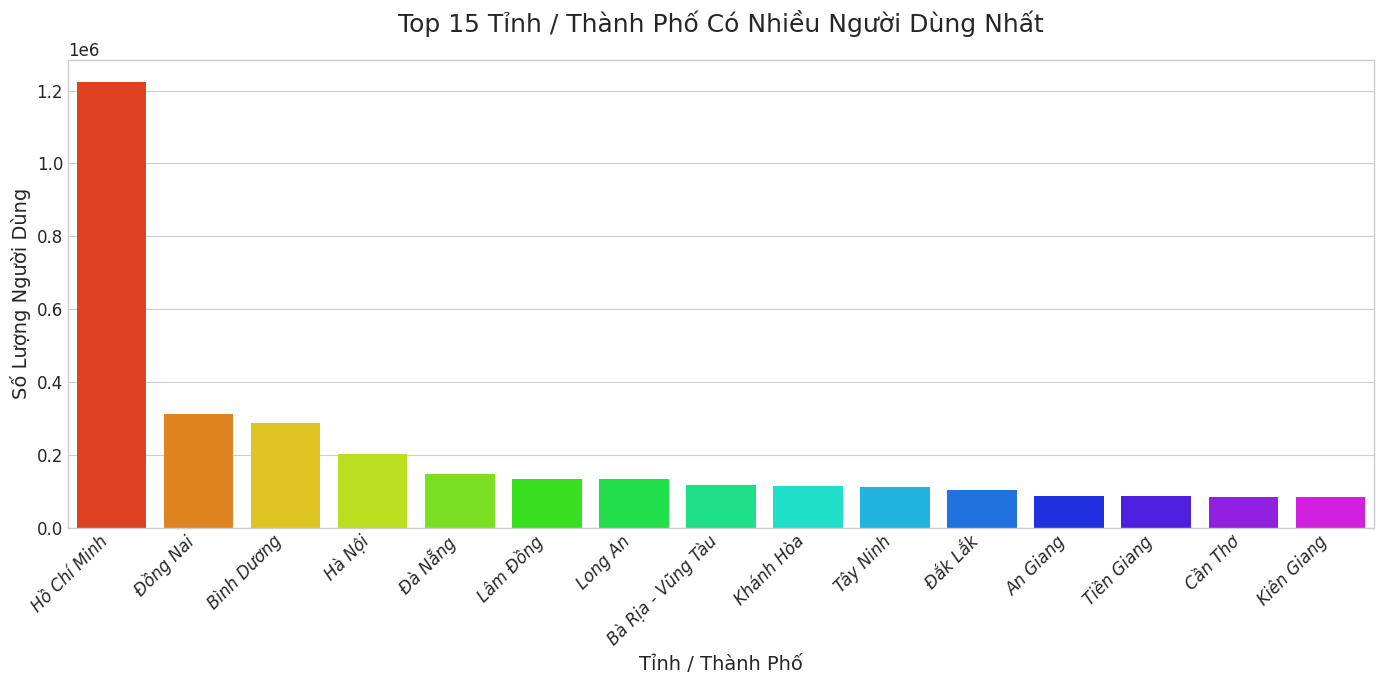

In [33]:
plt.figure(figsize=(14, 7))
sns.barplot(data=province_counts, x='province', y='count', palette='gist_rainbow')
plt.title('Top 15 Tỉnh / Thành Phố Có Nhiều Người Dùng Nhất', fontsize=18, pad=20)
plt.xlabel('Tỉnh / Thành Phố', fontsize=14)
plt.ylabel('Số Lượng Người Dùng', fontsize=14)
plt.xticks(rotation=45, ha='right', fontstyle='italic')
plt.tight_layout()
plt.show()

### NỀN TẢNG NGƯỜI DÙNG (ANDROID / iOS)

In [34]:
app_counts = (
    df_user['install_app']
    .drop_nulls()
    .value_counts()
    .sort('count', descending=True)
    .to_pandas()
)

print(app_counts)

       install_app    count
0         In-Store  3942000
1              SPE   347908
2              iOS   127882
3          Android    91951
4              Web    35876
5      CRM Partner    15992
6             Call    10584
7             Chat     1727
8        Wholesale       38
9   Không xác định        5
10             LZD        1


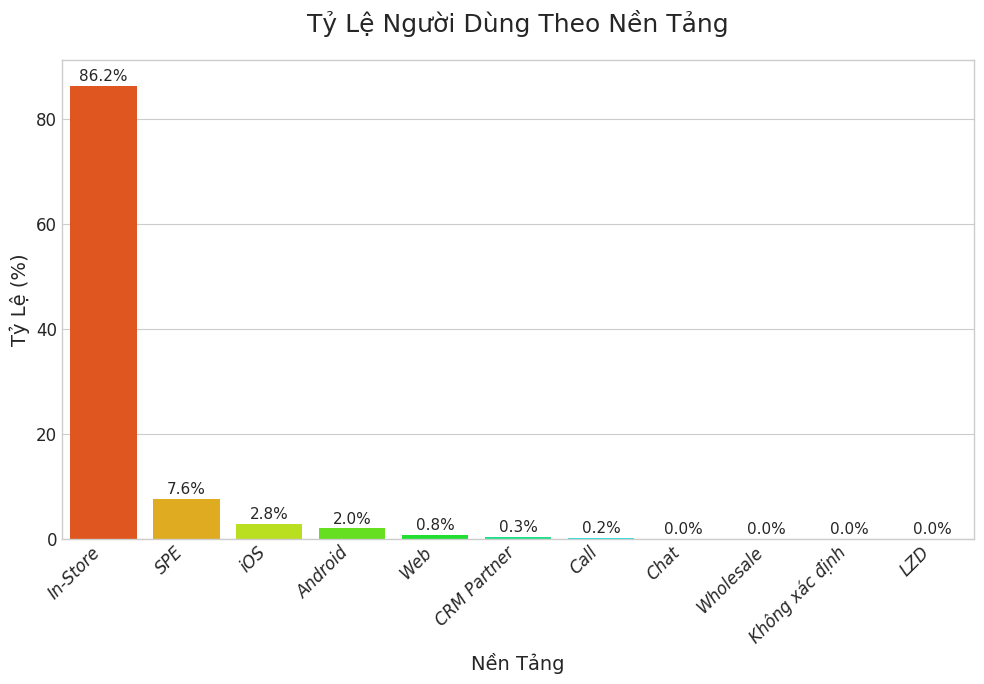

In [35]:
app_counts['percent'] = app_counts['count'] / app_counts['count'].sum() * 100

plt.figure(figsize=(10, 7))
sns.barplot(
    data=app_counts,
    x='install_app', y='percent',
    palette='gist_rainbow',
)

plt.title('Tỷ Lệ Người Dùng Theo Nền Tảng', fontsize=18, pad=20)
plt.xlabel('Nền Tảng', fontsize=14)
plt.ylabel('Tỷ Lệ (%)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontstyle='italic')

for i, pct in enumerate(app_counts['percent']):
    plt.text(i, pct + 0.3, f'{pct:.1f}%', ha='center', va='bottom', fontsize=11)

plt.ylim(0, app_counts['percent'].max() + 5)
plt.tight_layout()
plt.show()


### XU HƯỚNG NGƯỜI DÙNG MỚI THEO THỜI GIAN

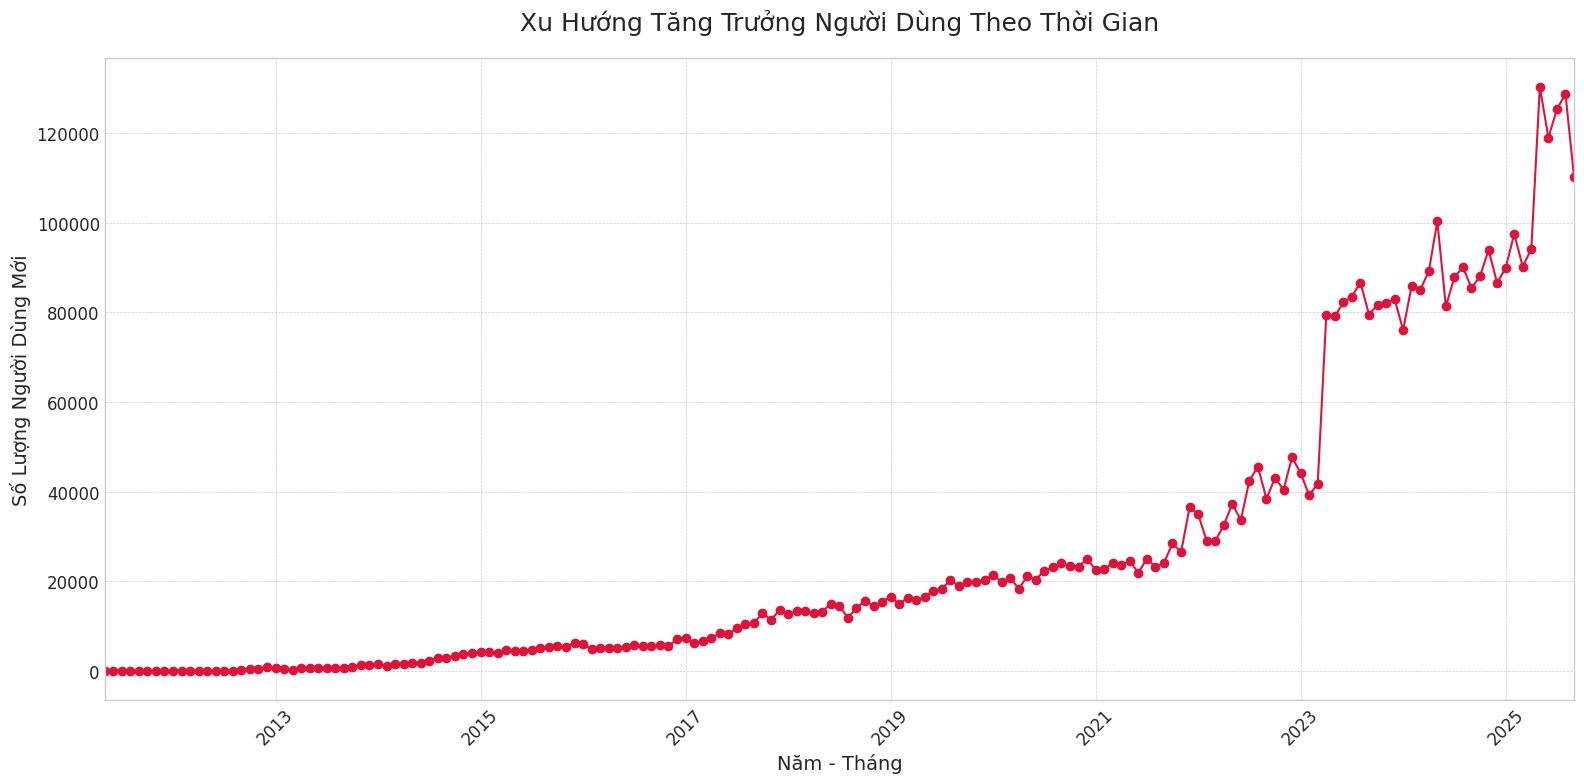

In [36]:
df_user_date = df_user.select('created_date').to_pandas()
df_user_date['created_date'] = pd.to_datetime(df_user_date['created_date'], errors='coerce')
df_user_date = df_user_date.dropna()
df_user_date['year_month'] = df_user_date['created_date'].dt.to_period('M')
monthly_counts = df_user_date['year_month'].value_counts().sort_index()

plt.figure(figsize=(16, 8))
monthly_counts.plot(kind='line', marker='o', color='crimson')
plt.title('Xu Hướng Tăng Trưởng Người Dùng Theo Thời Gian', fontsize=18, pad=20)
plt.xlabel('Năm - Tháng', fontsize=14)
plt.ylabel('Số Lượng Người Dùng Mới', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Phân tích theo region (Khu vực địa lý vĩ mô)

In [37]:
region_counts = (
    df_user['region']
    .drop_nulls()
    .value_counts()
    .sort('count', descending=True)
    .to_pandas()
)

print(region_counts)

                          region    count
0                    Đông Nam Bộ  2126066
1        Đồng bằng sông Cửu Long   847970
2         Duyên hải Nam Trung Bộ   577306
3         Đồng bằng sông Hồng   361571
4                     Tây Nguyên   333463
5                  Bắc Trung Bộ   217869
6  Trung du và miền núi phía Bắc   105336
7               Duyên hải Bắc Bộ     4383


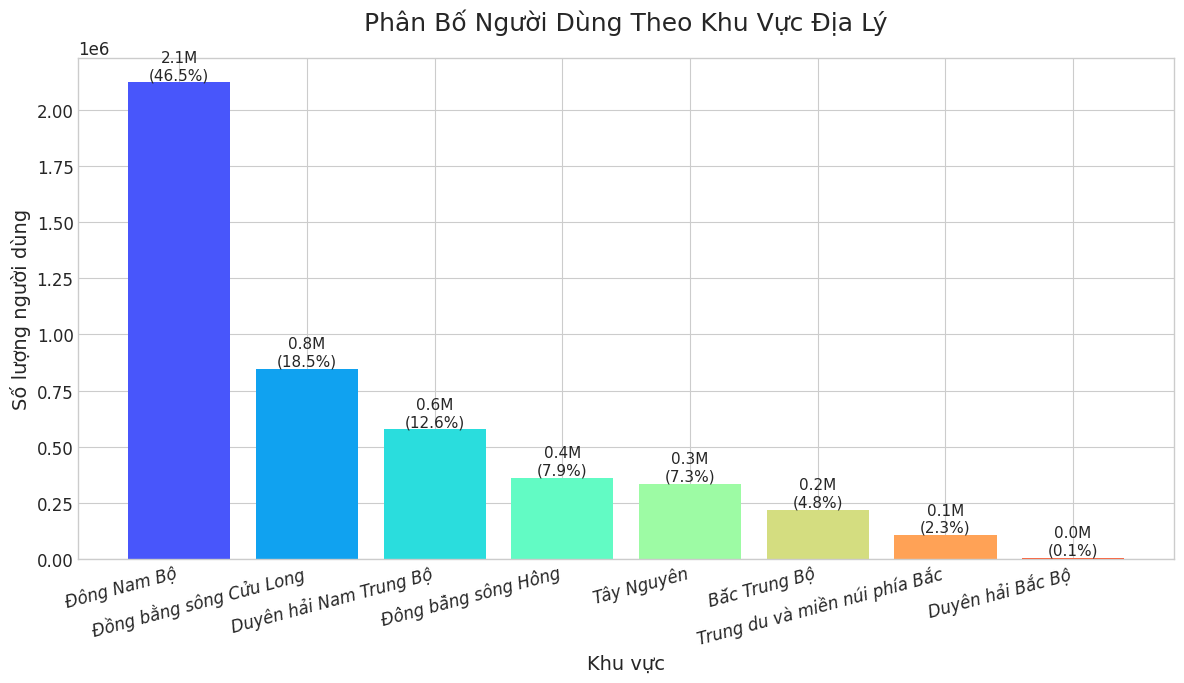

In [38]:
total = region_counts['count'].sum()
colors = sns.color_palette("rainbow", len(region_counts))

plt.figure(figsize=(12, 7))
bars = plt.bar(region_counts['region'], region_counts['count'],
               color=colors, linewidth=1.2)

for bar, count in zip(bars, region_counts['count']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200,
             f'{count/1e6:.1f}M\n({count/total*100:.1f}%)',
             ha='center', va='bottom', fontsize=11, fontweight='medium')

plt.title('Phân Bố Người Dùng Theo Khu Vực Địa Lý', fontsize=18, pad=20)
plt.xlabel('Khu vực', fontsize=14)
plt.ylabel('Số lượng người dùng', fontsize=14)
plt.xticks(rotation=15, ha='right', fontstyle='italic')
plt.tight_layout()
plt.show()


## Task 2: Phân tích đa biến

In [39]:
df_pur_sample = (
    lf_pur
    .head(1_000_000)
    .collect(engine="streaming")
    .sample(n=400_000, seed=42)
    .to_pandas()
)

df_user_subset = (
    lf_user
    .select(["user_id", "province", "region", "membership", "gender", "install_app"])
    .collect(engine="streaming")
    .to_pandas()
)

df_item_subset = (
    lf_item
    .select(["item_id", "price", "brand", "category_l1", "category_l2", "sale_status"])
    .collect(engine="streaming")
    .to_pandas()
)

# Đổi tên các cột 'price' để tránh xung đột khi merge
df_pur_sample = df_pur_sample.rename(columns={"price": "purchase_price"})
df_item_subset = df_item_subset.rename(columns={"price": "item_price"})

df_full = (
    df_pur_sample
    .merge(df_user_subset, on="user_id", how="left")
    .merge(df_item_subset, on="item_id", how="left")
)

# Tạo cột doanh thu và chuyển sang float
df_full["revenue"] = (df_full["item_price"] * df_full["quantity"]).astype(float)

In [40]:
#  Đảm bảo cột timestamp là kiểu số (numeric) và loại bỏ các giá trị lỗi.
df_full['timestamp_numeric'] = pd.to_numeric(df_full['timestamp'], errors='coerce')
df_full.dropna(subset=['timestamp_numeric'], inplace=True) # Xóa các dòng có timestamp lỗi
df_full['timestamp_numeric'] = df_full['timestamp_numeric'].astype('int64')

# TỰ ĐỘNG PHÁT HIỆN đơn vị (s hay ms)
median_timestamp = df_full['timestamp_numeric'].median()

if median_timestamp > 1e12:
    detected_unit = 'ms'
    print("Đã phát hiện đơn vị là: ms")
else:
    detected_unit = 's'
    print("Đã phát hiện đơn vị là: s")
print("-" * 50)


#Thực hiện chuyển đổi với đơn vị đã được phát hiện chính xác
df_full['timestamp'] = pd.to_datetime(df_full['timestamp_numeric'], unit=detected_unit, errors='coerce')

# Tạo lại các cột month từ cột timestamp đã được sửa đúng
df_full['order_month'] = df_full['timestamp'].dt.to_period('M')
df_full['cohort_month'] = df_full.groupby('user_id')['timestamp'].transform('min').dt.to_period('M')

# Xóa cột numeric tạm thời
df_full.drop(columns=['timestamp_numeric'], inplace=True)

print(df_full[['timestamp', 'order_month', 'cohort_month']].head())
print("\n")
print(f"Ngày mua hàng sớm nhất: {df_full['timestamp'].min()}")
print(f"Ngày mua hàng gần nhất: {df_full['timestamp'].max()}")

Đã phát hiện đơn vị là: s
--------------------------------------------------
            timestamp order_month cohort_month
0 2024-12-13 11:00:32     2024-12      2024-12
1 2024-12-14 19:17:12     2024-12      2024-12
2 2024-12-14 12:34:55     2024-12      2024-12
3 2024-12-17 17:39:15     2024-12      2024-12
4 2024-12-16 09:26:32     2024-12      2024-12


Ngày mua hàng sớm nhất: 2024-12-13 06:49:49
Ngày mua hàng gần nhất: 2024-12-31 22:06:38


In [41]:
print(df_full)

                 timestamp                                            user_id  \
0      2024-12-13 11:00:32  1fe63a3a3eb81ac1adf4e346f7ff7fa4fa0f92244b8253...   
1      2024-12-14 19:17:12  bc2d9258725ab7809e5b466de25be9cacc189f1eb12cda...   
2      2024-12-14 12:34:55  320d09342d822c2c73374c9cc0ce07c2153865cfc1a2d3...   
3      2024-12-17 17:39:15  ed7d2220bfc72dfdfcaa3881475339dfd3924bf392f8f2...   
4      2024-12-16 09:26:32  43c0e0dc69f091ada39b64745214a5b65139cde291b7ff...   
...                    ...                                                ...   
399995 2024-12-13 08:41:57  d372d08f2cf8de30fb3e2f3232fffd25ca577f3c87cfe4...   
399996 2024-12-26 13:44:13  43c4a73b0e934e6f73ccdc00b0aa88378ab9830e5fb9bc...   
399997 2024-12-25 21:09:45  3b6d9f1acc6d97566650a5e4c9d17fde6cd713356758e5...   
399998 2024-12-13 09:58:08  bca993b515d92bb2a755b3d5e848ae7eb518c63992fafe...   
399999 2024-12-26 12:09:14  1f29c73d3be14fc13161014f3b2fa0b878f415b1ca4c83...   

              item_id event

### 2.1 Doanh thu theo Tỉnh / Thành phố

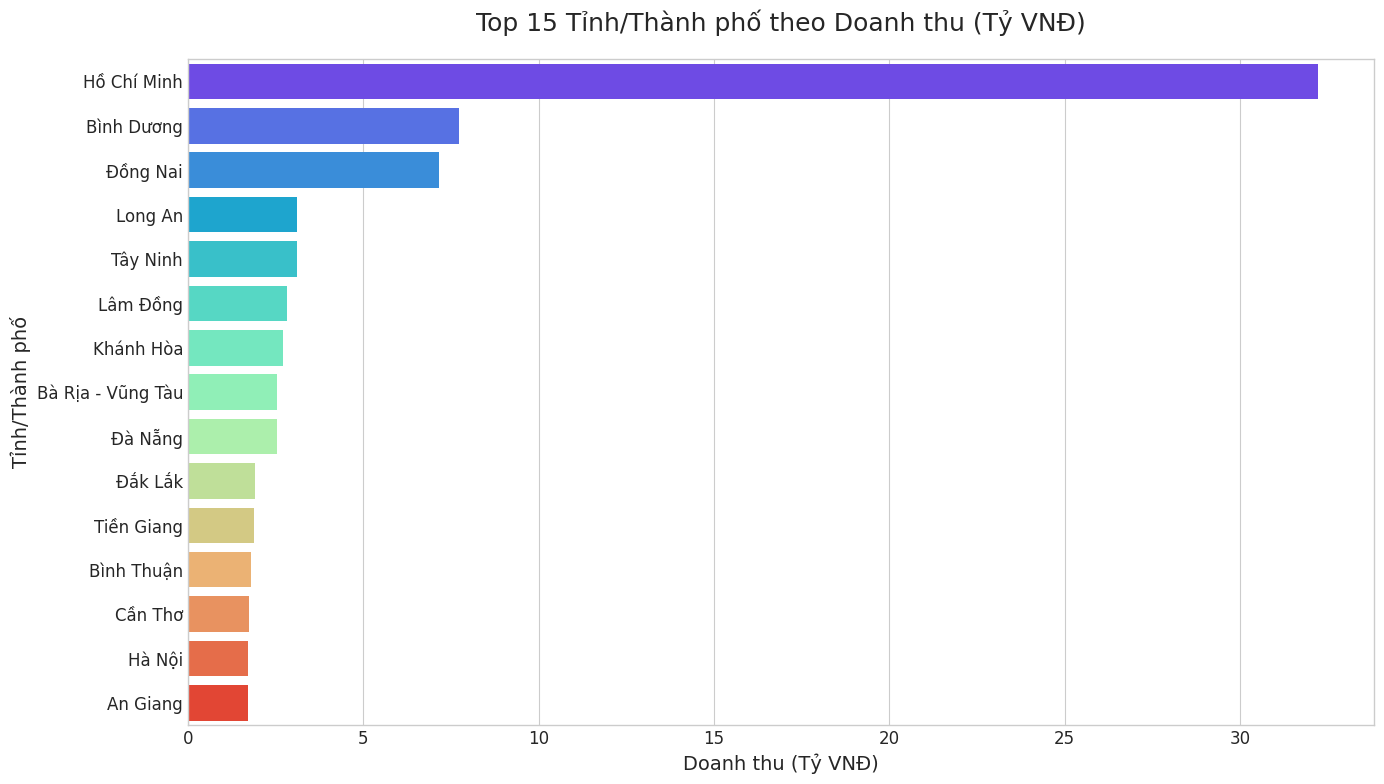

In [42]:
province_revenue = df_full.groupby('province')['revenue'].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(14, 8))
sns.barplot(x=province_revenue.values / 1e9, y=province_revenue.index, palette='rainbow')
plt.title('Top 15 Tỉnh/Thành phố theo Doanh thu (Tỷ VNĐ)', fontsize=18, pad=20)
plt.xlabel('Doanh thu (Tỷ VNĐ)', fontsize=14)
plt.ylabel('Tỉnh/Thành phố', fontsize=14)
plt.tight_layout()
plt.show()

### 2.2 Tỷ trọng Danh mục theo Tỉnh

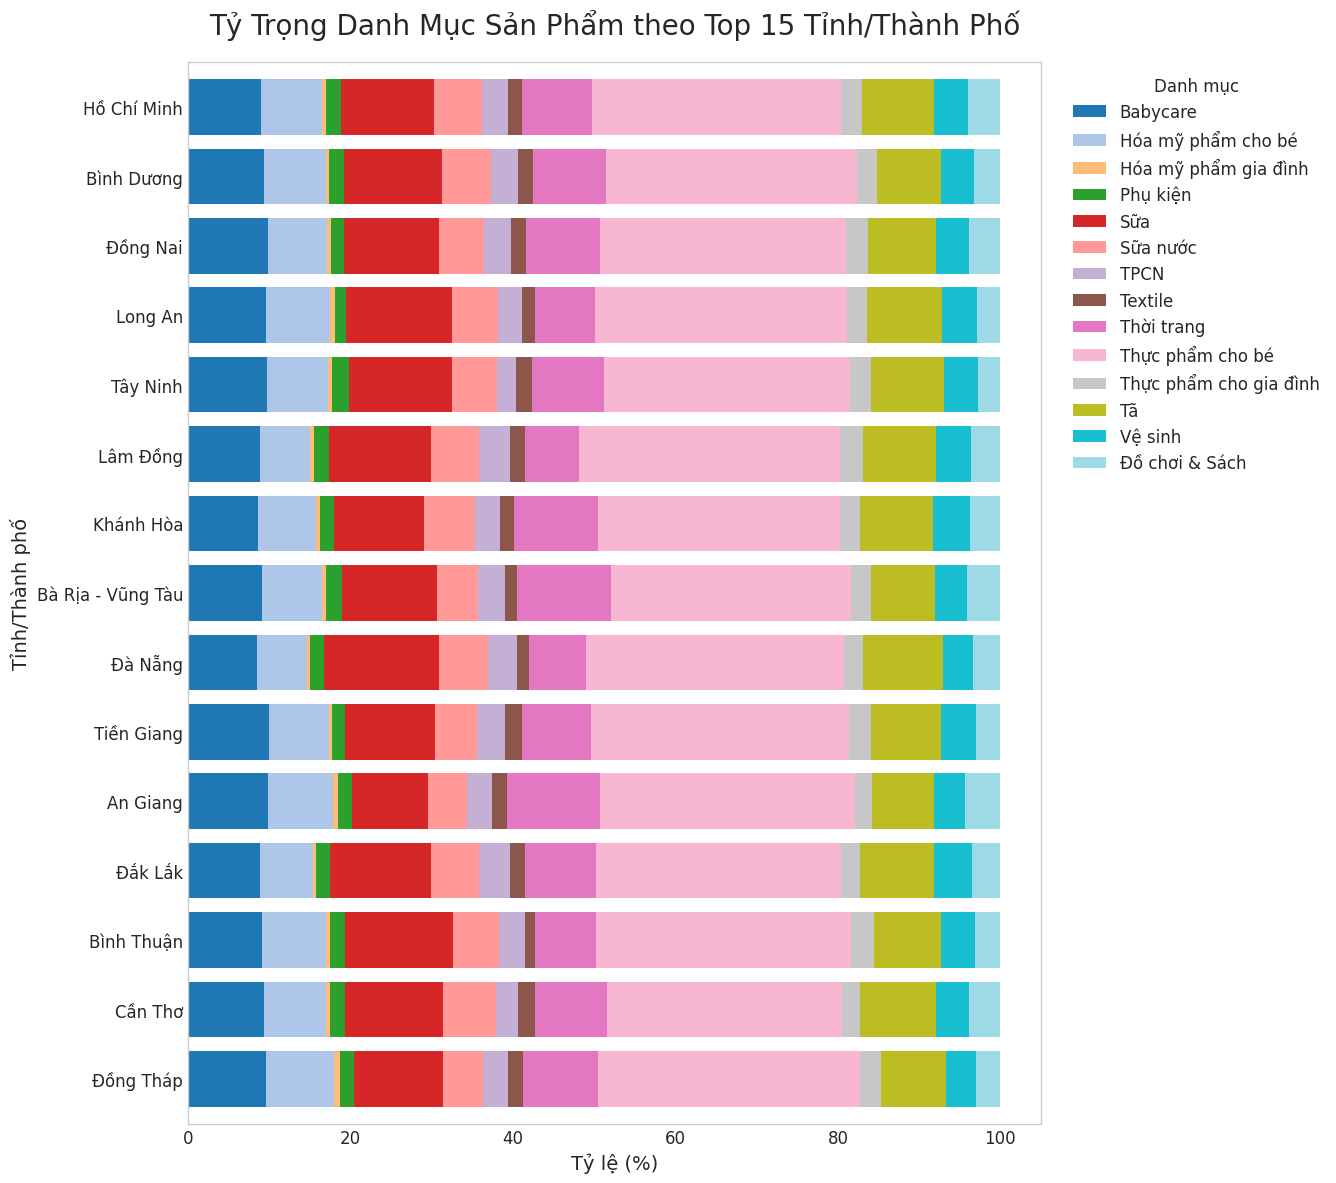

In [43]:
province_category_counts = (
    df_full.groupby(['province', 'category_l1'])['item_id']
    .count().reset_index(name='count')
)
heatmap_data = province_category_counts.pivot(index='province', columns='category_l1', values='count').fillna(0)
heatmap_normalized = heatmap_data.div(heatmap_data.sum(axis=1), axis=0) * 100

top_provinces = df_full['province'].value_counts().nlargest(15).index
data_to_plot = heatmap_normalized.loc[top_provinces]

ax = data_to_plot.plot(
    kind='barh',
    stacked=True,
    figsize=(16, 12),
    cmap='tab20',
    width=0.8
)

ax.set_title('Tỷ Trọng Danh Mục Sản Phẩm theo Top 15 Tỉnh/Thành Phố', fontsize=20, pad=20)
ax.set_xlabel('Tỷ lệ (%)', fontsize=14)
ax.set_ylabel('Tỉnh/Thành phố', fontsize=14)
ax.invert_yaxis()
ax.legend(title='Danh mục', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.grid(False)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

### 2.3 Phân tích Thời gian Vòng đời Khách hàng (Customer Lifetime Duration)

 Tỷ lệ khách hàng trung thành (mua > 3 lần): 10.74%


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


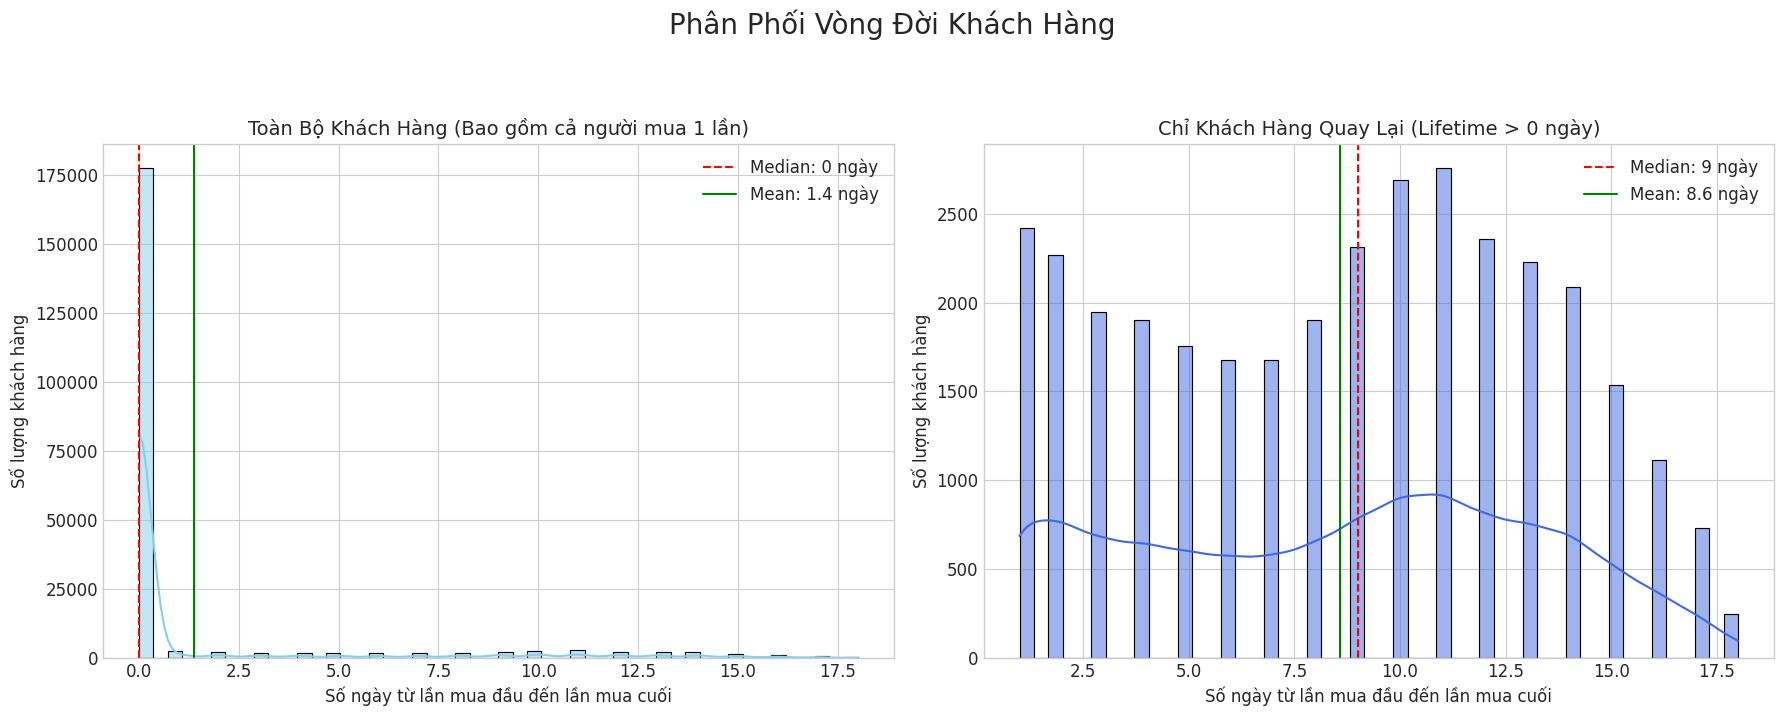

In [44]:
user_lifetime = df_full.groupby('user_id').agg(
    first_purchase=('timestamp', 'min'),
    last_purchase=('timestamp', 'max'),
    n_purchases=('item_id', 'count')
).reset_index()

user_lifetime['lifetime_days'] = (user_lifetime['last_purchase'] - user_lifetime['first_purchase']).dt.days

loyal_rate = (user_lifetime['n_purchases'] > 3).mean() * 100
print(f" Tỷ lệ khách hàng trung thành (mua > 3 lần): {loyal_rate:.2f}%")

# Lọc ra những khách hàng có quay lại (lifetime > 0)
returning_customers = user_lifetime[user_lifetime['lifetime_days'] > 0]

# Tính toán các giá trị thống kê quan trọng
median_lifetime_all = user_lifetime['lifetime_days'].median()
mean_lifetime_all = user_lifetime['lifetime_days'].mean()
median_lifetime_returning = returning_customers['lifetime_days'].median()
mean_lifetime_returning = returning_customers['lifetime_days'].mean()

# Tạo 2 biểu đồ con trên cùng một hàng
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Phân Phối Vòng Đời Khách Hàng', fontsize=20, y=1.02)


# Biểu đồ 1: Toàn bộ khách hàng
sns.histplot(user_lifetime['lifetime_days'].dropna(), bins=50, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Toàn Bộ Khách Hàng (Bao gồm cả người mua 1 lần)', fontsize=14)
axes[0].axvline(median_lifetime_all, color='red', linestyle='--', label=f'Median: {median_lifetime_all:.0f} ngày')
axes[0].axvline(mean_lifetime_all, color='green', linestyle='-', label=f'Mean: {mean_lifetime_all:.1f} ngày')
axes[0].legend()


# Biểu đồ 2: Chỉ khách hàng quay lại
sns.histplot(returning_customers['lifetime_days'].dropna(), bins=50, kde=True, color='royalblue', ax=axes[1])
axes[1].set_title('Chỉ Khách Hàng Quay Lại (Lifetime > 0 ngày)', fontsize=14)
axes[1].axvline(median_lifetime_returning, color='red', linestyle='--', label=f'Median: {median_lifetime_returning:.0f} ngày')
axes[1].axvline(mean_lifetime_returning, color='green', linestyle='-', label=f'Mean: {mean_lifetime_returning:.1f} ngày')
axes[1].legend()

# Đặt nhãn chung
for ax in axes:
    ax.set_xlabel('Số ngày từ lần mua đầu đến lần mua cuối', fontsize=12)
    ax.set_ylabel('Số lượng khách hàng', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Điều chỉnh layout để không bị đè tiêu đề
plt.show()

### 2.4 Mối quan hệ giữa Giá và Số lượng mua

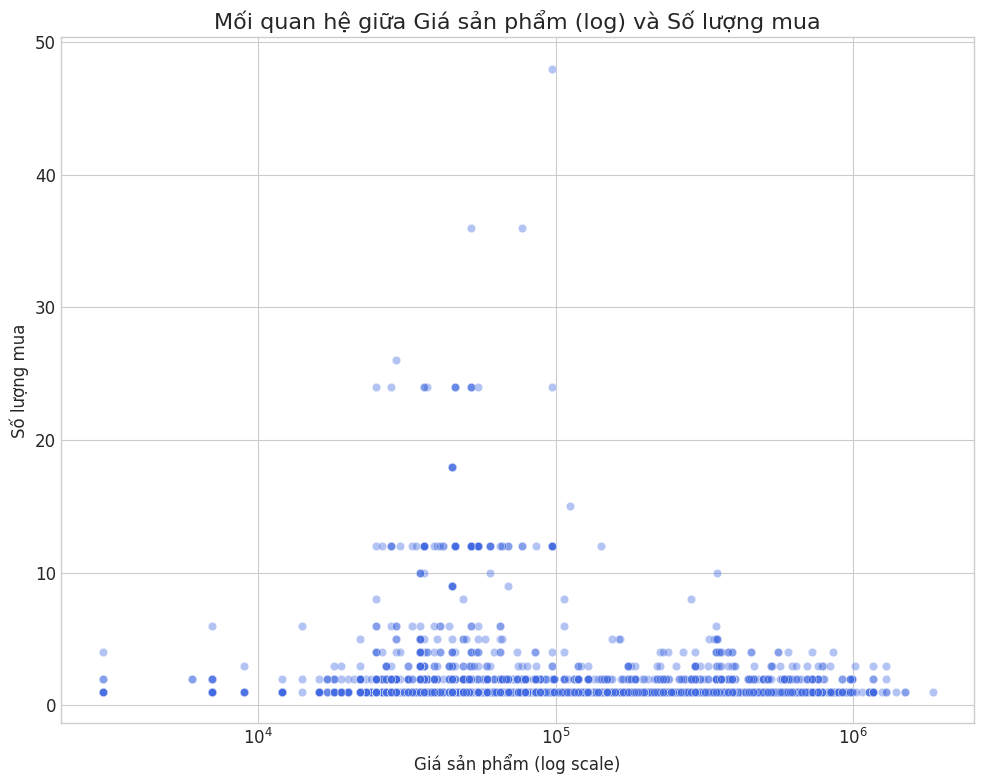

In [45]:
plt.figure(figsize=(10, 8))

sns.scatterplot(data=df_full.sample(5000, random_state=42),
                x='item_price', y='quantity', alpha=0.4, color='royalblue')
plt.xscale('log')
plt.title('Mối quan hệ giữa Giá sản phẩm (log) và Số lượng mua', fontsize=16)
plt.xlabel('Giá sản phẩm (log scale)', fontsize=12)
plt.ylabel('Số lượng mua', fontsize=12)
plt.tight_layout() # Sửa lỗi cú pháp
plt.show()

### 2.5 Giá trị giao dịch trung bình theo Kênh và Cấp độ thành viên

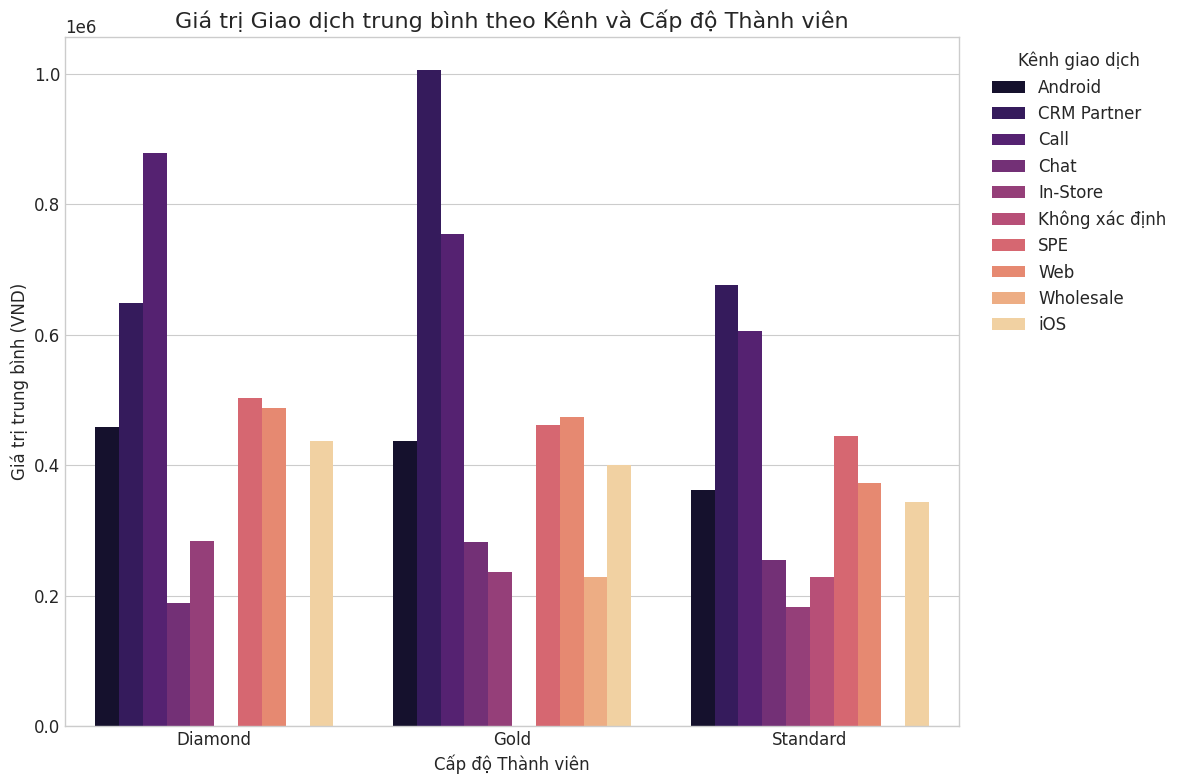

In [46]:
avg_order_value = df_full.groupby(['channel', 'membership'])['revenue'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(
    data=avg_order_value,
    x='membership', y='revenue', hue='channel',
    palette='magma'
)
plt.title('Giá trị Giao dịch trung bình theo Kênh và Cấp độ Thành viên', fontsize=16)
plt.xlabel('Cấp độ Thành viên', fontsize=12)
plt.ylabel('Giá trị trung bình (VND)', fontsize=12)

plt.legend(title='Kênh giao dịch', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 2.6 Phân tích RFM (Recency, Frequency, Monetary) - Phân khúc Khách hàng

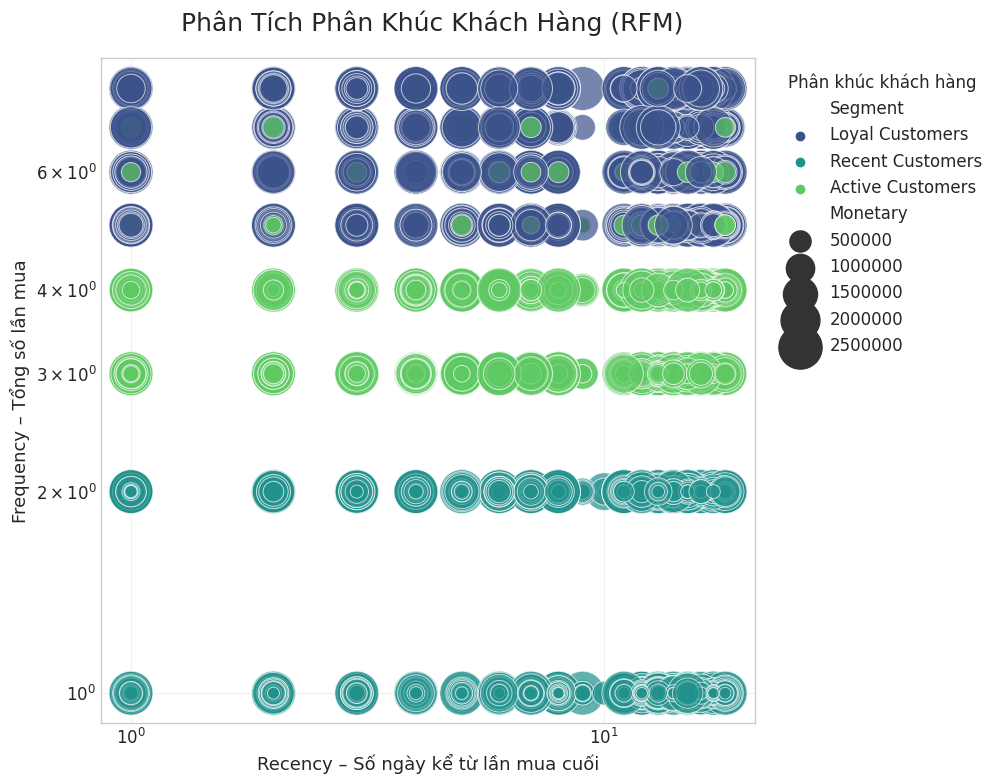

 Tỷ lệ phân khúc khách hàng:


,Segment,Count
0,Recent Customers,167270
1,Active Customers,33984
2,Loyal Customers,9897


In [47]:
from datetime import datetime

#  Lấy ngày gần nhất làm mốc (Recency)
latest_date = df_full['timestamp'].max()

#  Tính toán RFM theo từng user
rfm = (
    df_full.groupby('user_id', as_index=False)
    .agg({
        'timestamp': lambda x: (latest_date - x.max()).days,  # Recency (ngày kể từ lần mua gần nhất)
        'item_id': 'count',                                   # Frequency (số lần mua)
        'revenue': 'sum'                                      # Monetary (tổng chi tiêu)
    })
    .rename(columns={'timestamp': 'Recency', 'item_id': 'Frequency', 'revenue': 'Monetary'})
)

#  Chuẩn hóa giá trị cực trị (cắt 1% trên để tránh outlier)
for col in ['Recency', 'Frequency', 'Monetary']:
    q99 = rfm[col].quantile(0.99)
    rfm[col] = np.where(rfm[col] > q99, q99, rfm[col])

#  Gán nhãn phân khúc dựa theo hành vi
def rfm_segment(row):
    if row['Recency'] <= 30 and row['Frequency'] >= 5 and row['Monetary'] >= 500000:
        return 'Loyal Customers'
    elif row['Recency'] <= 90 and row['Frequency'] >= 3:
        return 'Active Customers'
    elif row['Recency'] <= 180:
        return 'Recent Customers'
    else:
        return 'Other'

rfm['Segment'] = rfm.apply(rfm_segment, axis=1)

plt.figure(figsize=(12, 8))

bubble_plot = sns.scatterplot(
    data=rfm,
    x='Recency',
    y='Frequency',
    size='Monetary',
    hue='Segment',
    sizes=(50, 1000),
    alpha=0.7,
    palette='viridis'
)

plt.title(' Phân Tích Phân Khúc Khách Hàng (RFM)', fontsize=18, pad=20)
plt.xlabel('Recency – Số ngày kể từ lần mua cuối', fontsize=13)
plt.ylabel('Frequency – Tổng số lần mua', fontsize=13)
plt.grid(alpha=0.3)

#  Tự động dùng log scale nếu dữ liệu lệch nhiều
if rfm['Frequency'].skew() > 1.5 or rfm['Monetary'].skew() > 1.5:
    plt.xscale('log')
    plt.yscale('log')

plt.legend(
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    title='Phân khúc khách hàng',
    frameon=False
)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


segment_counts = rfm['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']
print(" Tỷ lệ phân khúc khách hàng:")
display(segment_counts)


###  2.7 Phân tích Giỏ hàng (Market Basket Analysis)

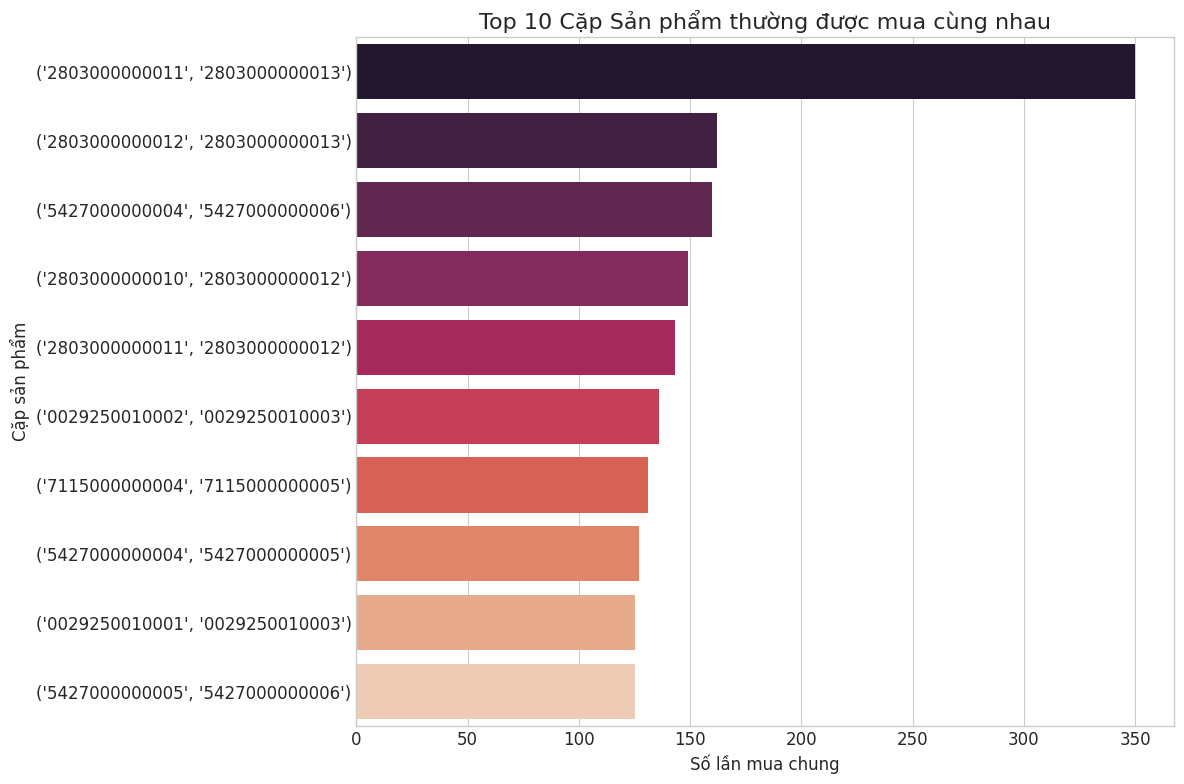

In [48]:
from collections import Counter
from itertools import combinations

baskets = df_full.groupby(['user_id', df_full['timestamp'].dt.date])['item_id'].apply(list)
pairs = Counter(
    tuple(sorted(p))
    for basket in baskets if len(basket) > 1
    for p in combinations(basket, 2)
)

pair_df = pd.DataFrame(pairs.items(), columns=['pair', 'count']).sort_values('count', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(y=pair_df['pair'].astype(str), x=pair_df['count'], palette='rocket')
plt.title('Top 10 Cặp Sản phẩm thường được mua cùng nhau', fontsize=16)
plt.xlabel('Số lần mua chung', fontsize=12)
plt.ylabel('Cặp sản phẩm', fontsize=12)
plt.tight_layout()
plt.show()

### 2.8 Phân tích Đồng niên (Cohort Analysis) - Tỷ lệ giữ chân khách hàng

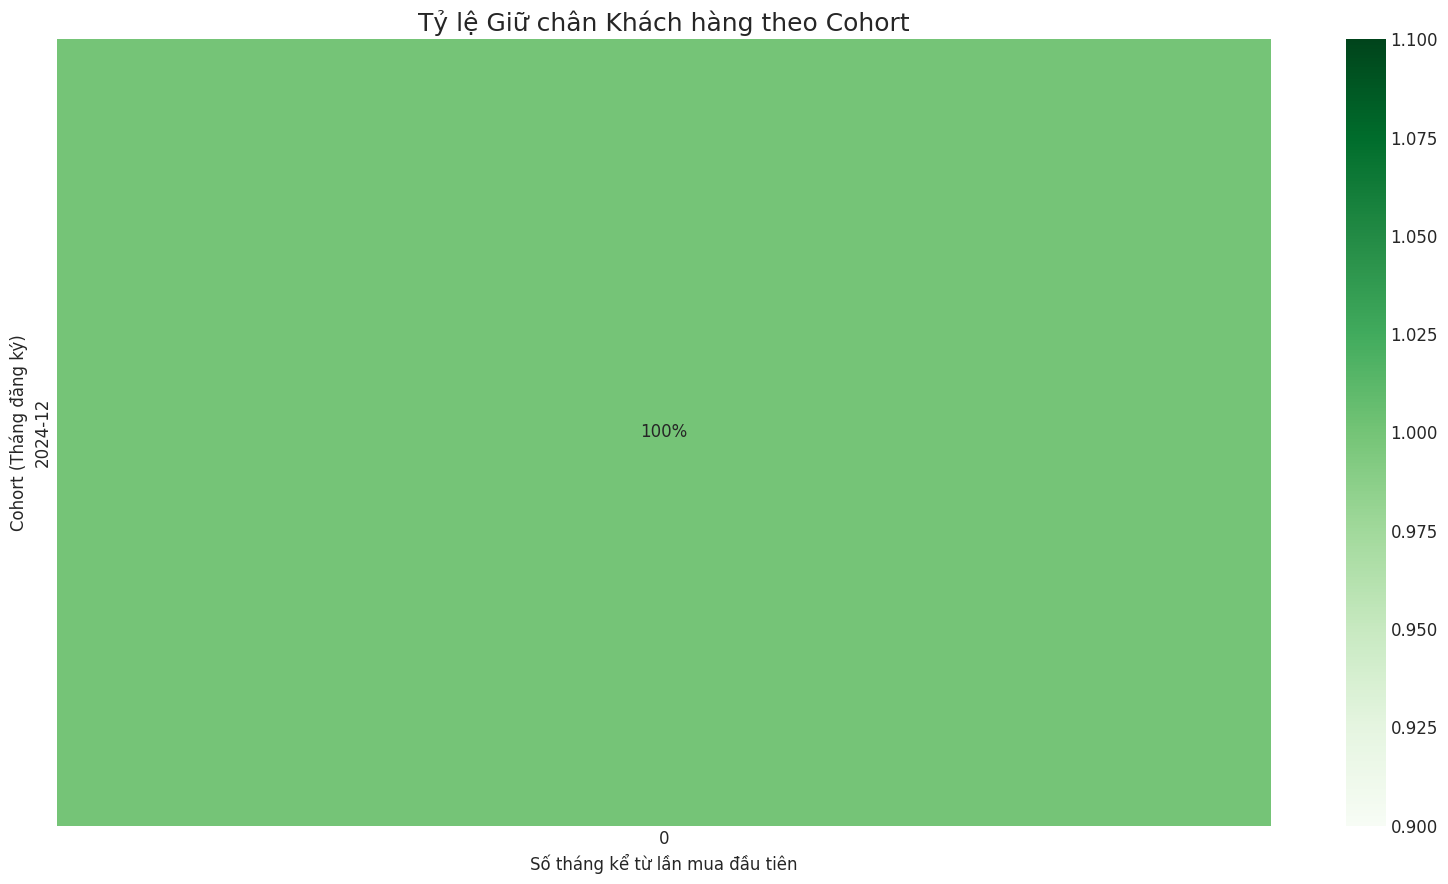

In [49]:
# Chuyển đổi timestamp và xử lý lỗi nếu có
df_full['timestamp'] = pd.to_datetime(df_full['timestamp'], errors='coerce')
df_full.dropna(subset=['timestamp'], inplace=True) # Xóa các dòng có ngày tháng lỗi

# Tạo tháng diễn ra đơn hàng và tháng của cohort (tháng đầu tiên mua hàng)
df_full['order_month'] = df_full['timestamp'].dt.to_period('M')
df_full['cohort_month'] = df_full.groupby('user_id')['timestamp'].transform('min').dt.to_period('M')

# TÍNH LẠI COHORT INDEX - Đây là cách tính chuẩn và ít bị lỗi nhất
from operator import attrgetter
df_full['cohort_index'] = (df_full['order_month'] - df_full['cohort_month']).apply(attrgetter('n'))

# --- Tạo lại ma trận tỷ lệ ---
cohort_data = df_full.groupby(['cohort_month', 'cohort_index'])['user_id'].nunique().reset_index()
cohort_pivot = cohort_data.pivot_table(index='cohort_month', columns='cohort_index', values='user_id')
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

# --- Vẽ lại biểu đồ heatmap sau khi sửa lỗi ---
plt.figure(figsize=(16, 9))
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='Greens')
plt.title('Tỷ lệ Giữ chân Khách hàng theo Cohort', fontsize=18)
plt.xlabel('Số tháng kể từ lần mua đầu tiên', fontsize=12)
plt.ylabel('Cohort (Tháng đăng ký)', fontsize=12)
plt.tight_layout()
plt.show()

## Task 3: Nhận định sơ bộ một số công việc cần làm ở bước tiền xử lý.

In [50]:
from IPython.display import display, Markdown

LOW_INFO_TOP_RATIO = 0.99
HIGH_MISSING_DROP  = 0.95
SKEW_ABS_THRESHOLD = 1.0

def _to_pandas(df_like):
    if isinstance(df_like, pd.DataFrame):
        return df_like
    if isinstance(df_like, pl.LazyFrame):
        df_like = df_like.collect(streaming=True)
    if isinstance(df_like, pl.DataFrame):
        return df_like.to_pandas()
    raise TypeError("Chỉ hỗ trợ Pandas hoặc Polars DataFrame/LazyFrame")

def build_preproc_summary(df_like, table_name: str) -> pd.DataFrame:
    df = _to_pandas(df_like)
    n = len(df)
    num_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
    cat_cols = [c for c in df.columns if c not in num_cols]
    rows = []

    # Numeric
    for c in num_cols:
        s = df[c]; missing_pct = s.isna().mean() if n else 0
        try:
            q1, q3 = s.quantile(0.25), s.quantile(0.75)
            iqr = q3 - q1; lo, hi = q1 - 1.5*iqr, q3 + 1.5*iqr
            outlier = ((s < lo) | (s > hi)).sum() if iqr>0 else 0
            has_outlier = outlier > 0
        except Exception:
            has_outlier = False
        try:
            skew_val = float(s.dropna().skew())
        except Exception:
            skew_val = 0.0
        needs_skew = abs(skew_val) >= SKEW_ABS_THRESHOLD
        sugg = []
        if missing_pct > 0: sugg.append("Xử lý NULL (impute: mean/median)")
        if has_outlier: sugg.append("Xử lý ngoại lệ (IQR/winsorize)")
        if needs_skew: sugg.append("Biến đổi log1p/Box-Cox nếu dùng mô hình")
        if not sugg: sugg.append("Giữ nguyên")
        rows.append({
            "Table": table_name,
            "Column": c,
            "Type": "numeric",
            "Missing Data": f"{missing_pct:.2%}",
            "Skew": f"{skew_val:.3f}",
            "Has Outlier?": "Yes" if has_outlier else "No",
            "Needs Skew Handling?": "Yes" if needs_skew else "No",
            "Observation": "Biến số; kiểm tra phân phối, ngoại lệ, skew",
            "Handling Suggestion": "; ".join(sugg),
            "Drop?": "Yes" if missing_pct >= HIGH_MISSING_DROP else "No"
        })

    # Categorical
    for c in cat_cols:
        s = df[c]; missing_pct = s.isna().mean() if n else 0
        nunique = s.nunique(dropna=True)
        try:
            top_ratio = s.value_counts(normalize=True, dropna=True).max()
        except Exception:
            top_ratio = 0
        low_info = (top_ratio >= LOW_INFO_TOP_RATIO) or (nunique == 1)
        sugg = []
        if missing_pct > 0: sugg.append("Điền NULL (Unknown)")
        if nunique > 50: sugg.append("Cardinality cao → gộp nhóm hiếm/TargetEnc")
        else: sugg.append("OneHot/Freq Encoding")
        if low_info: sugg.append("Trường ít thông tin → cân nhắc loại bỏ")
        rows.append({
            "Table": table_name,
            "Column": c,
            "Type": "categorical",
            "Missing Data": f"{missing_pct:.2%}",
            "Skew": "-",
            "Has Outlier?": "No",
            "Needs Skew Handling?": "No",
            "Observation": f"Danh mục (nunique={nunique}, top≈{top_ratio:.2%})",
            "Handling Suggestion": "; ".join(sugg),
            "Drop?": "Yes" if (low_info or missing_pct>=HIGH_MISSING_DROP) else "No"
        })
    return pd.DataFrame(rows)

def build_preproc_summary_markdown(df, title):
    cols = ["Column","Observation","Missing Data","Handling Suggestion",
            "Drop?","Has Outlier?","Needs Skew Handling?"]
    md = f"# {title}\n\n| " + " | ".join(cols) + " |\n"
    md += "|" + "|".join(["---"]*len(cols)) + "|\n"
    for _, r in df.iterrows():
        md += "| " + " | ".join(str(r[c]) for c in cols) + " |\n"
    return md

sum_purchase = build_preproc_summary(df_sample,  "Purchase")
sum_item     = build_preproc_summary(df_item, "Item")
sum_user     = build_preproc_summary(df_user, "User")

display(Markdown("Purchase"))
display(sum_purchase)

display(Markdown("Item*"))
display(sum_item)

display(Markdown("User"))
display(sum_user)


/tmp/ipykernel_19/1705370352.py:29: RuntimeWarning: invalid value encountered in greater
  outlier = ((s < lo) | (s > hi)).sum() if iqr>0 else 0


Purchase

,Table,Column,Type,Missing Data,Skew,Has Outlier?,Needs Skew Handling?,Observation,Handling Suggestion,Drop?
0,Purchase,timestamp,numeric,0.00%,-0.132,No,No,"Biến số; kiểm tra phân phối, ngoại lệ, skew",Giữ nguyên,No
1,Purchase,event_value,numeric,0.00%,10.787,No,Yes,"Biến số; kiểm tra phân phối, ngoại lệ, skew",Biến đổi log1p/Box-Cox nếu dùng mô hình,No
2,Purchase,date_key,numeric,0.00%,-0.190,No,No,"Biến số; kiểm tra phân phối, ngoại lệ, skew",Giữ nguyên,No
3,Purchase,quantity,numeric,0.00%,10.787,No,Yes,"Biến số; kiểm tra phân phối, ngoại lệ, skew",Biến đổi log1p/Box-Cox nếu dùng mô hình,No
4,Purchase,customer_id,numeric,0.00%,-0.519,No,No,"Biến số; kiểm tra phân phối, ngoại lệ, skew",Giữ nguyên,No
5,Purchase,location,numeric,0.00%,0.170,No,No,"Biến số; kiểm tra phân phối, ngoại lệ, skew",Giữ nguyên,No
6,Purchase,is_deleted,numeric,0.00%,0.000,No,No,"Biến số; kiểm tra phân phối, ngoại lệ, skew",Giữ nguyên,No
7,Purchase,user_id,categorical,0.00%,-,No,No,"Danh mục (nunique=521048, top≈0.01%)",Cardinality cao → gộp nhóm hiếm/TargetEnc,No
8,Purchase,item_id,categorical,0.00%,-,No,No,"Danh mục (nunique=12806, top≈0.95%)",Cardinality cao → gộp nhóm hiếm/TargetEnc,No
9,Purchase,event_type,categorical,0.00%,-,No,No,"Danh mục (nunique=1, top≈100.00%)",OneHot/Freq Encoding; Trường ít thông tin → câ...,Yes


Item*

,Table,Column,Type,Missing Data,Skew,Has Outlier?,Needs Skew Handling?,Observation,Handling Suggestion,Drop?
0,Item,p_id,numeric,0.00%,0.318,Yes,No,"Biến số; kiểm tra phân phối, ngoại lệ, skew",Xử lý ngoại lệ (IQR/winsorize),No
1,Item,category_l1_id,numeric,0.00%,-0.562,Yes,No,"Biến số; kiểm tra phân phối, ngoại lệ, skew",Xử lý ngoại lệ (IQR/winsorize),No
2,Item,category_l2_id,numeric,0.00%,-0.321,No,No,"Biến số; kiểm tra phân phối, ngoại lệ, skew",Giữ nguyên,No
3,Item,category_l3_id,numeric,0.00%,-0.594,No,No,"Biến số; kiểm tra phân phối, ngoại lệ, skew",Giữ nguyên,No
4,Item,category_id,numeric,0.00%,-0.556,No,No,"Biến số; kiểm tra phân phối, ngoại lệ, skew",Giữ nguyên,No
5,Item,creation_timestamp,numeric,0.00%,-0.447,Yes,No,"Biến số; kiểm tra phân phối, ngoại lệ, skew",Xử lý ngoại lệ (IQR/winsorize),No
6,Item,is_deleted,numeric,0.00%,0.000,No,No,"Biến số; kiểm tra phân phối, ngoại lệ, skew",Giữ nguyên,No
7,Item,sync_status_id,numeric,2.88%,0.000,No,No,"Biến số; kiểm tra phân phối, ngoại lệ, skew",Xử lý NULL (impute: mean/median),No
8,Item,weight,numeric,100.00%,nan,No,No,"Biến số; kiểm tra phân phối, ngoại lệ, skew",Xử lý NULL (impute: mean/median),Yes
9,Item,sale_status,numeric,0.00%,1.784,No,Yes,"Biến số; kiểm tra phân phối, ngoại lệ, skew",Biến đổi log1p/Box-Cox nếu dùng mô hình,No


User

,Table,Column,Type,Missing Data,Skew,Has Outlier?,Needs Skew Handling?,Observation,Handling Suggestion,Drop?
0,User,customer_id,numeric,0.00%,-0.829,No,No,"Biến số; kiểm tra phân phối, ngoại lệ, skew",Giữ nguyên,No
1,User,location,numeric,0.00%,0.278,No,No,"Biến số; kiểm tra phân phối, ngoại lệ, skew",Giữ nguyên,No
2,User,timestamp,numeric,0.00%,-1.282,Yes,Yes,"Biến số; kiểm tra phân phối, ngoại lệ, skew",Xử lý ngoại lệ (IQR/winsorize); Biến đổi log1p...,No
3,User,sync_status_id,numeric,7.40%,0.000,No,No,"Biến số; kiểm tra phân phối, ngoại lệ, skew",Xử lý NULL (impute: mean/median),No
4,User,install_date,numeric,0.00%,-1.566,Yes,Yes,"Biến số; kiểm tra phân phối, ngoại lệ, skew",Xử lý ngoại lệ (IQR/winsorize); Biến đổi log1p...,No
5,User,is_deleted,numeric,0.00%,0.000,No,No,"Biến số; kiểm tra phân phối, ngoại lệ, skew",Giữ nguyên,No
6,User,gender,categorical,0.00%,-,No,No,"Danh mục (nunique=3, top≈74.88%)",OneHot/Freq Encoding,No
7,User,province,categorical,0.00%,-,No,No,"Danh mục (nunique=126, top≈26.75%)",Cardinality cao → gộp nhóm hiếm/TargetEnc,No
8,User,membership,categorical,0.00%,-,No,No,"Danh mục (nunique=3, top≈92.76%)",OneHot/Freq Encoding,No
9,User,created_date,categorical,0.00%,-,No,No,"Danh mục (nunique=4570591, top≈0.01%)",Cardinality cao → gộp nhóm hiếm/TargetEnc,No


# DATA PREPROCESSING

## Task 1 — Loại bỏ cột không cần thiết

  - Loại bỏ các cột không hữu ích, toàn NULL, hoặc trùng lặp thông tin
  - Đảm bảo các bảng (Purchase, Item, User) gọn nhẹ, dễ xử lý ở các bước sau

### Xác định danh sách cột loại bỏ cho từng bảng từ bảng tổng hợp từ quá trình nhận định tiền xử lí

In [51]:
DROP_PURCHASE = [
    "event_type",  # Chỉ có 1 giá trị duy nhất & không mang thông tin
]

DROP_ITEM_HARD = [
    "weight",               # 100% NULL
    "sync_error_message",   # Toàn NULL
    "image_url",            # Không liên quan mô hình, nhiều giá trị trùng
    "last_sync_date",       # Thông tin kỹ thuật đồng bộ, không cần cho EDA
]

DROP_ITEM_MAYBE = [
    "volume", "color", "size", "material", "origin", "manufacturer"
]

DROP_USER = [
    "sync_error_message",  # 100% NULL → loại bỏ
]

### Loại bỏ chỉ khi cột dữ liệu đó tồn tại

In [52]:
def safe_drop(lf: pl.LazyFrame, cols_to_drop: list[str]) -> pl.LazyFrame:
    keep_cols = [c for c in lf.columns if c not in cols_to_drop]
    return lf.select([pl.col(c) for c in keep_cols])

In [53]:
lf_pur = safe_drop(lf_pur, DROP_PURCHASE)
lf_item = safe_drop(lf_item, DROP_ITEM_HARD)
lf_item = safe_drop(lf_item, DROP_ITEM_MAYBE)
lf_user = safe_drop(lf_user, DROP_USER)

/tmp/ipykernel_19/1775936576.py:2: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  keep_cols = [c for c in lf.columns if c not in cols_to_drop]


In [54]:
print(f"Purchase: còn {len(lf_pur.columns)} cột.")
for i, (ten_cot, data_type) in enumerate(lf_pur.collect_schema().items(), start=1):
    print(f"  {i:>2}. {ten_cot} ({data_type})")

Purchase: còn 15 cột.
   1. timestamp (Int64)
   2. user_id (String)
   3. item_id (String)
   4. event_value (Decimal(precision=38, scale=4))
   5. price (Decimal(precision=38, scale=4))
   6. date_key (Int32)
   7. quantity (Int32)
   8. customer_id (Int32)
   9. created_date (Datetime(time_unit='us', time_zone=None))
  10. updated_date (Datetime(time_unit='us', time_zone=None))
  11. channel (String)
  12. payment (String)
  13. location (Int32)
  14. discount (Decimal(precision=38, scale=4))
  15. is_deleted (Boolean)


/tmp/ipykernel_19/2586557855.py:1: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  print(f"Purchase: còn {len(lf_pur.columns)} cột.")


In [55]:
print(f"Item: còn {len(lf_item.columns)} cột.")
for i, (ten_cot, data_type) in enumerate(lf_item.collect_schema().items(), start=1):
    print(f"  {i:>2}. {ten_cot} ({data_type})")

Item: còn 24 cột.
   1. p_id (Int32)
   2. item_id (String)
   3. price (Decimal(precision=38, scale=4))
   4. category_l1_id (Int32)
   5. category_l1 (String)
   6. category_l2_id (Int32)
   7. category_l2 (String)
   8. category_l3_id (Int32)
   9. category_l3 (String)
  10. category_id (Int32)
  11. category (String)
  12. description (String)
  13. brand (String)
  14. creation_timestamp (Int64)
  15. is_deleted (Boolean)
  16. created_date (Datetime(time_unit='us', time_zone=None))
  17. updated_date (Datetime(time_unit='us', time_zone=None))
  18. sync_status_id (Int32)
  19. gender_target (String)
  20. age_group (String)
  21. item_type (String)
  22. gp (Decimal(precision=38, scale=4))
  23. sale_status (Int32)
  24. description_new (String)


/tmp/ipykernel_19/4125165761.py:1: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  print(f"Item: còn {len(lf_item.columns)} cột.")


In [56]:
print("User: còn", len(lf_user.columns), "cột.")
for i, (ten_cot, data_type) in enumerate(lf_user.collect_schema().items(), start=1):
    print(f"  {i:>2}. {ten_cot} ({data_type})")

User: còn 17 cột.
   1. customer_id (Int32)
   2. gender (String)
   3. location (Int32)
   4. province (String)
   5. membership (String)
   6. timestamp (Int64)
   7. created_date (Datetime(time_unit='us', time_zone=None))
   8. updated_date (Datetime(time_unit='us', time_zone=None))
   9. sync_status_id (Int32)
  10. last_sync_date (Datetime(time_unit='us', time_zone=None))
  11. region (String)
  12. location_name (String)
  13. install_app (String)
  14. install_date (Int64)
  15. district (String)
  16. user_id (String)
  17. is_deleted (Boolean)


/tmp/ipykernel_19/254125078.py:1: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  print("User: còn", len(lf_user.columns), "cột.")


## Task 2 — Xử lý NULL, Outlier

### Xử lý NULL

> **Item Frame**

In [57]:
lf_item.collect(engine="streaming").null_count()

p_id,item_id,price,category_l1_id,category_l1,category_l2_id,category_l2,category_l3_id,category_l3,category_id,category,description,brand,creation_timestamp,is_deleted,created_date,updated_date,sync_status_id,gender_target,age_group,item_type,gp,sale_status,description_new
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,786,0,0,0,0,0,5015


In [58]:
df_item_for_null_handling = lf_item.collect(engine="streaming")
median_sync_item = df_item_for_null_handling["sync_status_id"].median()

lf_item = lf_item.with_columns([
    pl.col("sync_status_id").fill_null(median_sync_item),
    pl.col("description_new").fill_null("Unknown")
])

print(f"Item: Đã thay sync_status_id NULL = {median_sync_item}, description_new = 'Unknown'")

Item: Đã thay sync_status_id NULL = 2.0, description_new = 'Unknown'


In [59]:
print("Item    :", lf_item.collect(engine="streaming").null_count().to_dict(as_series=False))

Item    : {'p_id': [0], 'item_id': [0], 'price': [0], 'category_l1_id': [0], 'category_l1': [0], 'category_l2_id': [0], 'category_l2': [0], 'category_l3_id': [0], 'category_l3': [0], 'category_id': [0], 'category': [0], 'description': [0], 'brand': [0], 'creation_timestamp': [0], 'is_deleted': [0], 'created_date': [0], 'updated_date': [0], 'sync_status_id': [0], 'gender_target': [0], 'age_group': [0], 'item_type': [0], 'gp': [0], 'sale_status': [0], 'description_new': [0]}


> **Purchase Frame**

In [60]:
lf_pur.collect(engine="streaming").null_count()

timestamp,user_id,item_id,event_value,price,date_key,quantity,customer_id,created_date,updated_date,channel,payment,location,discount,is_deleted
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
print("Purchase:", lf_pur.collect(engine="streaming").null_count().to_dict(as_series=False))

Purchase: {'timestamp': [0], 'user_id': [0], 'item_id': [0], 'event_value': [0], 'price': [0], 'date_key': [0], 'quantity': [0], 'customer_id': [0], 'created_date': [0], 'updated_date': [0], 'channel': [0], 'payment': [0], 'location': [0], 'discount': [0], 'is_deleted': [0]}


> **User Frame**

In [62]:
lf_user.collect(engine="streaming").null_count()

customer_id,gender,location,province,membership,timestamp,created_date,updated_date,sync_status_id,last_sync_date,region,location_name,install_app,install_date,district,user_id,is_deleted
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,338285,338285,0,0,0,0,0,0,0


In [63]:
df_user_for_null_handling = lf_user.collect(engine="streaming")
median_sync_user = df_user_for_null_handling["sync_status_id"].median()

lf_user = lf_user.with_columns([
    pl.col("sync_status_id").fill_null(median_sync_user),
    pl.col("last_sync_date").fill_null("Unknown")
])

print(f"User: Đã thay sync_status_id NULL = {median_sync_user}, last_sync_date = 'Unknown'")

User: Đã thay sync_status_id NULL = 2.0, last_sync_date = 'Unknown'


In [64]:
print("User    :", lf_user.collect(engine="streaming").null_count().to_dict(as_series=False))

User    : {'customer_id': [0], 'gender': [0], 'location': [0], 'province': [0], 'membership': [0], 'timestamp': [0], 'created_date': [0], 'updated_date': [0], 'sync_status_id': [0], 'last_sync_date': [0], 'region': [0], 'location_name': [0], 'install_app': [0], 'install_date': [0], 'district': [0], 'user_id': [0], 'is_deleted': [0]}


> **Nhận xét**:
- Bảng Item: có 2 cột bị null là `sync_status_id` và `description_new` đã được xử lí bằng cách điền `trung vị(median)` và điền `Unknown`
- Bảng Purchase: Không có cột nào bị thiếu dữ liệu (NULL) nên không cần xử lý, giữ nguyên toàn bộ dữ liệu gốc.
- Bảng User: Có 2 cột bị thiếu dữ liệu là `sync_status_id` và `last_sync_date`.
→ Đã được xử lý bằng cách điền giá trị `trung vị (median)` cho `sync_status_id` và điền `Unknown` cho `last_sync_date`


###  Xử lí OutLier


**Phương pháp IQR**: Tứ phân vị là đại lượng mô tả sự phân bố và sự phân tán của tập dữ liệu. Tứ phân vị có 3 giá trị
- Q1 (25%): tứ phân vị thứ nhất, điểm mà 25% dữ liệu nhỏ hơn nó.
- Q2 (50%): trung vị (Median).

- Q3 (75%): tứ phân vị thứ ba, điểm mà 75% dữ liệu nhỏ hơn nó.

 Ba giá trị này chia một tập hợp dữ liệu (đã sắp xếp dữ liệu theo trật từ từ bé đến lớn) thành 4 phần có số lượng quan sát đều nhau.

**Công thức tính IQR và vùng giá trị hợp lý:**

$$ IQR = Q_3 - Q_1 $$

Ngưỡng giá trị hợp lệ được xác định bằng:

$$ \text{Lower Bound} = Q_1 - k \times IQR $$
$$ \text{Upper Bound} = Q_3 + k \times IQR $$

Trong đó:

- $k = 1.5 \rightarrow$ dùng cho outlier thông thường
- $k = 3 \rightarrow$ dùng cho extreme outlier (ngoại lệ mạnh)

Mọi điểm dữ liệu nằm ngoài khoảng [Lower Bound, Upper Bound] được xem là outlier.

> **Tính Toán Q1, Q3, IQR và giới hạn trên/dưới**

> **PURCHASE**

In [65]:
num_cols_pur  = [c for c, dt in lf_pur.schema.items()  if dt.is_numeric()]
print("Purchase:", num_cols_pur)

Purchase: ['timestamp', 'event_value', 'price', 'date_key', 'quantity', 'customer_id', 'location', 'discount']


/tmp/ipykernel_19/768811893.py:1: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  num_cols_pur  = [c for c, dt in lf_pur.schema.items()  if dt.is_numeric()]


> Nhìn vào các cột trên, ta thấy có một số biến nhiều khả năng chứa giá trị bất thường. Purchase: event_value, quantity → có thể có giá trị cao bất thường (do giao dịch lớn).

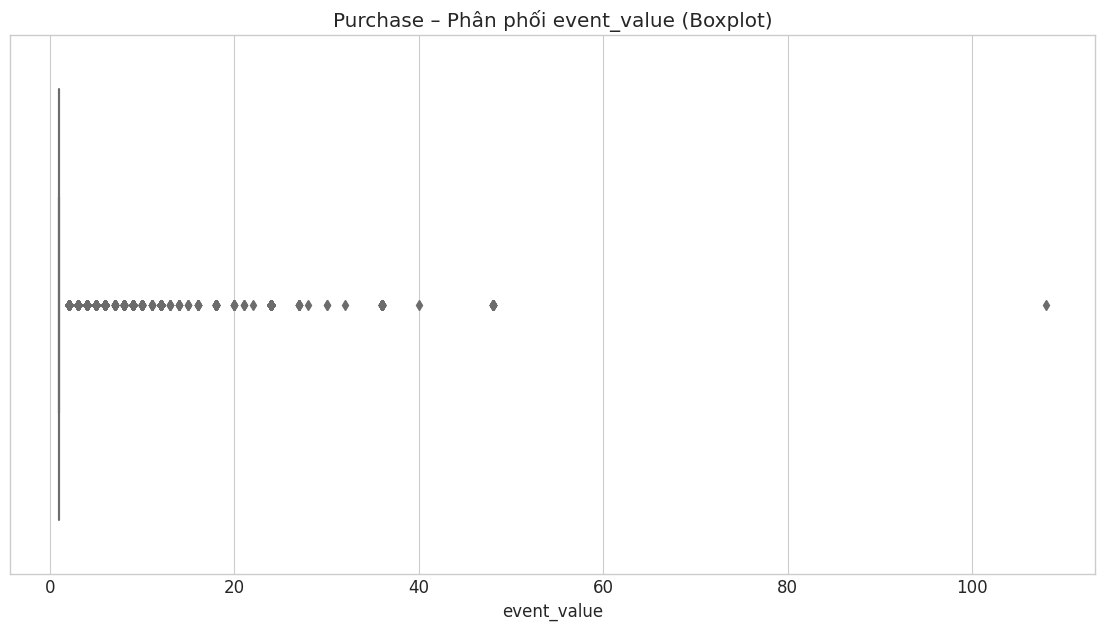

In [66]:
df_pur_for_viz = lf_pur.slice(0, 100000).collect().to_pandas()

event_value_float = df_pur_for_viz["event_value"].astype(float)

sns.boxplot(x=event_value_float, color="#f87171")
plt.title("Purchase – Phân phối event_value (Boxplot)")
plt.show()

> **Nhận xét**: event_value trong Purchase có đuôi phải kéo dài, xuất hiện các điểm cao bất thường → nghi ngờ outlier.

> **ITEM**

In [67]:
num_cols_item = [c for c, dt in lf_item.schema.items() if dt.is_numeric()]
print("Item:", num_cols_item)

Item: ['p_id', 'price', 'category_l1_id', 'category_l2_id', 'category_l3_id', 'category_id', 'creation_timestamp', 'sync_status_id', 'gp', 'sale_status']


/tmp/ipykernel_19/79315232.py:1: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  num_cols_item = [c for c, dt in lf_item.schema.items() if dt.is_numeric()]


> Nhìn vào các cột trên, ta thấy có một số biến nhiều khả năng chứa giá trị bất thường. Item: p_id, category_l1_id, creation_timestamp, sale_status → dễ phát sinh outlier do chênh lệch giữa các sản phẩm.

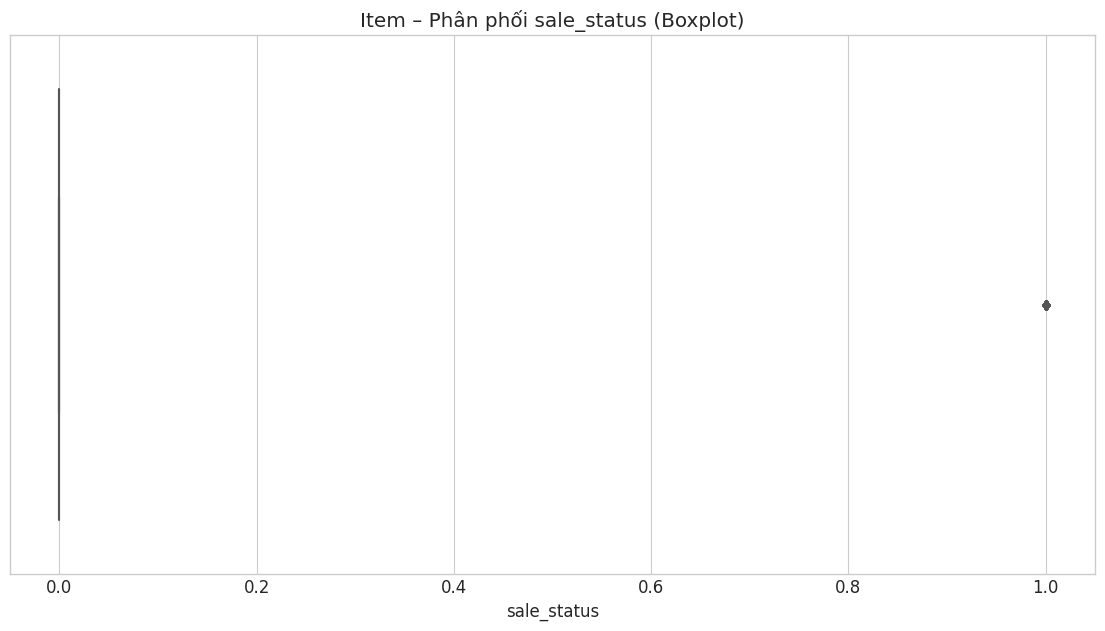

In [68]:
df_item_for_viz = lf_item.collect().to_pandas()
sns.boxplot(x=df_item_for_viz["sale_status"], color="#fbbf24")
plt.title("Item – Phân phối sale_status (Boxplot)")
plt.show()

> **Nhận xét**: sale_status trong Item có vài điểm nằm ngoài hộp → có outlier.

> **USER**

In [69]:
num_cols_user = [c for c, dt in lf_user.schema.items() if dt.is_numeric()]
print("User:", num_cols_user)

User: ['customer_id', 'location', 'timestamp', 'sync_status_id', 'install_date']


/tmp/ipykernel_19/5897886.py:1: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  num_cols_user = [c for c, dt in lf_user.schema.items() if dt.is_numeric()]


> Nhìn vào các cột trên, ta thấy có một số biến nhiều khả năng chứa giá trị bất thường. User: timestamp, install_date → có thể lệch về thời gian đăng ký hoặc cài đặt.

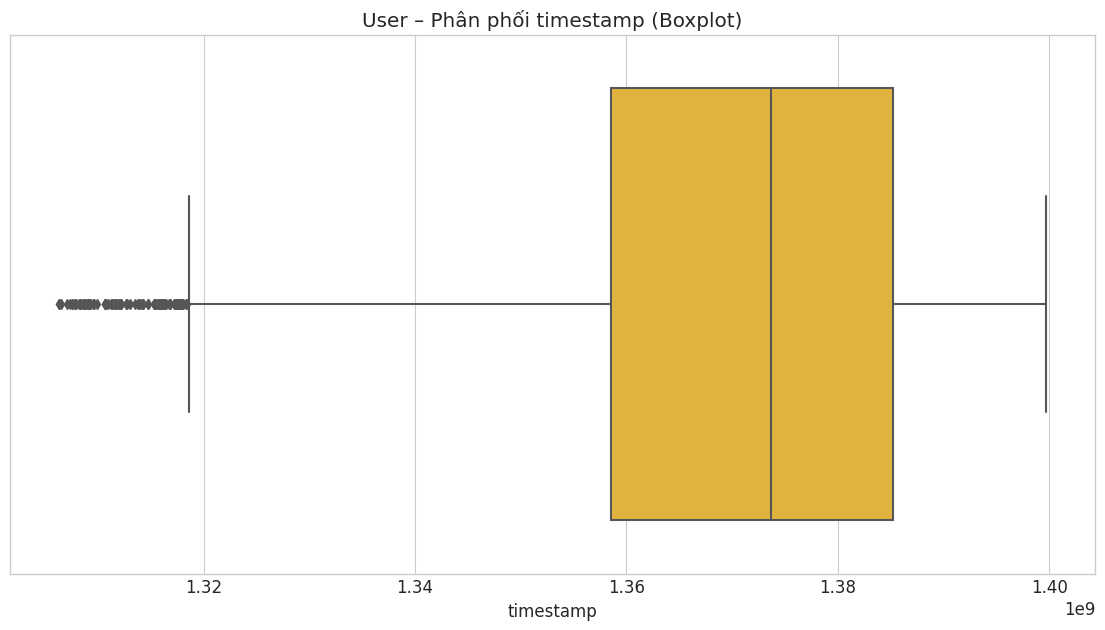

In [70]:
df_user_for_viz = lf_user.slice(0, 10000).collect().to_pandas()
sns.boxplot(x=df_user_for_viz["timestamp"], color="#fbbf24")
plt.title("User – Phân phối timestamp (Boxplot)")
plt.show()

> **Nhận xét**: timestamp trong User phân bố trải dài, có giá trị sớm hoặc muộn hơn nhiều so với phần lớn dữ liệu → có outlier thời gian.

In [71]:
def detect_outlier_iqr(df: pd.DataFrame, col: str):
    s = pd.to_numeric(df[col], errors="coerce").dropna()
    if s.empty:
        return 0, np.nan, np.nan, np.nan
    q1, q3 = np.percentile(s, [25, 75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    mask = (s < lower) | (s > upper)
    return mask.sum(), lower, upper, iqr

outlier_bounds = {}

# Sử dụng các DF tạm thời để tính toán
for name, data, cols in [
    ("Purchase", df_pur_for_viz, ["event_value", "quantity"]),
    ("Item", df_item_for_viz, ["p_id", "category_l1_id", "creation_timestamp", "sale_status"]),
    ("User", df_user_for_viz, ["timestamp", "install_date"])
]:
    print(f"\n{name}:")
    for c in cols:
        outliers, lo, hi, iqr = detect_outlier_iqr(data, c)
        if iqr > 0: # Chỉ lưu lại ngưỡng nếu IQR > 0
            outlier_bounds[f"{name}_{c}"] = {"lower": lo, "upper": hi}
        print(f"{c:<20} | Outliers: {outliers:>5} | Lower={lo:.2f} | Upper={hi:.2f}")


Purchase:
event_value          | Outliers: 17553 | Lower=1.00 | Upper=1.00
quantity             | Outliers: 17553 | Lower=1.00 | Upper=1.00

Item:
p_id                 | Outliers:   102 | Lower=41863.50 | Upper=167301.50
category_l1_id       | Outliers:  7307 | Lower=2032.00 | Upper=4048.00
creation_timestamp   | Outliers:   304 | Lower=1433792473.88 | Upper=1811579302.88
sale_status          | Outliers:  4570 | Lower=0.00 | Upper=0.00

User:
timestamp            | Outliers:   106 | Lower=1318612254.00 | Upper=1425217334.00
install_date         | Outliers:     0 | Lower=986904000.00 | Upper=1997092800.00


> Purchase: event_value và quantity đều có 17,553 giá trị nằm ngoài vùng IQR, tức là phần lớn dữ liệu có giá trị đúng bằng 1, còn một số ít đơn hàng có giá trị lớn hơn rất nhiều.

>Item: p_id có 102 outlier, category_l1_id có 7,307, creation_timestamp có 304, sale_status có 4,570.

> User: imestamp: có 106 outlier, install_date: không có ngoại lệ. Các giá trị lệch của timestamp thường là người dùng đăng ký quá sớm hoặc hoạt động gần đây, khác biệt so với phần lớn tập. install_date ổn định, không có điểm vượt biên IQR.

In [72]:
print("\nÁp dụng xử lý Outlier vào LazyFrame")

# 1. Purchase: Dùng clip() vì đây là dữ liệu giao dịch, ta muốn giữ lại nhưng giảm ảnh hưởng
pur_event_bounds = outlier_bounds.get("Purchase_event_value")
pur_qty_bounds = outlier_bounds.get("Purchase_quantity")

if pur_event_bounds:
    print(f"Purchase: Clipping 'event_value' to [{pur_event_bounds['lower']:.2f}, {pur_event_bounds['upper']:.2f}]")
    lf_pur = lf_pur.with_columns(
        pl.col("event_value").clip(pur_event_bounds['lower'], pur_event_bounds['upper'])
    )
if pur_qty_bounds:
    print(f"Purchase: Clipping 'quantity' to [{pur_qty_bounds['lower']:.2f}, {pur_qty_bounds['upper']:.2f}]")
    lf_pur = lf_pur.with_columns(
        pl.col("quantity").clip(pur_qty_bounds['lower'], pur_qty_bounds['upper'])
    )

# 2. Item: Dùng filter() cho 'creation_timestamp' vì đây có thể là dữ liệu rác
item_ts_bounds = outlier_bounds.get("Item_creation_timestamp")
if item_ts_bounds:
    print(f"Item: Filtering 'creation_timestamp' between [{item_ts_bounds['lower']:.2f}, {item_ts_bounds['upper']:.2f}]")
    lf_item = lf_item.filter(
        pl.col("creation_timestamp").is_between(item_ts_bounds['lower'], item_ts_bounds['upper'])
    )

# 3. User: Dùng filter() cho 'timestamp' (ngày tạo user) vì đây có thể là dữ liệu rác
user_ts_bounds = outlier_bounds.get("User_timestamp")
if user_ts_bounds:
    print(f"User: Filtering 'timestamp' between [{user_ts_bounds['lower']:.2f}, {user_ts_bounds['upper']:.2f}]")
    lf_user = lf_user.filter(
        pl.col("timestamp").is_between(user_ts_bounds['lower'], user_ts_bounds['upper'])
    )

print("Hoàn tất áp dụng Outlier")


Áp dụng xử lý Outlier vào LazyFrame
Item: Filtering 'creation_timestamp' between [1433792473.88, 1811579302.88]
User: Filtering 'timestamp' between [1318612254.00, 1425217334.00]
Hoàn tất áp dụng Outlier


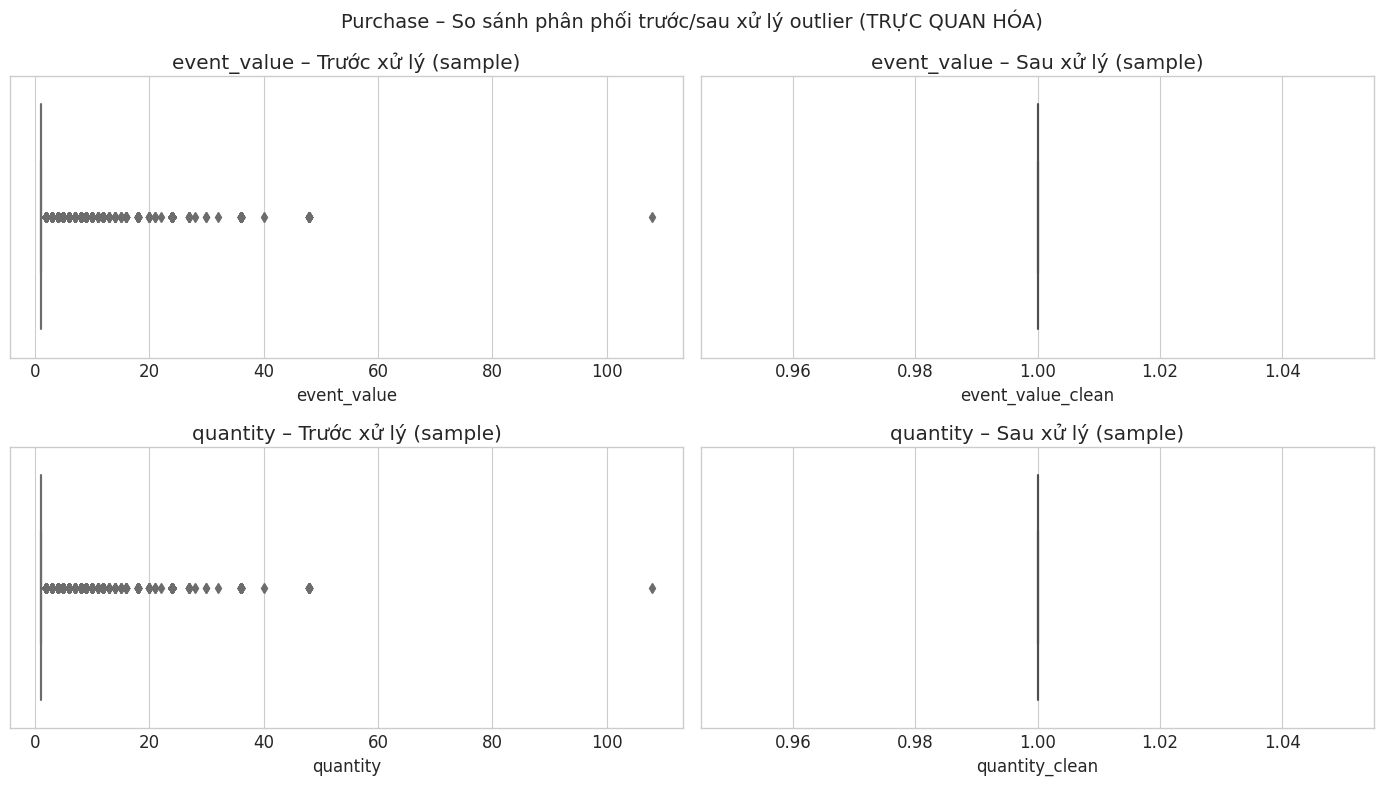

In [73]:
df_pur_viz_clean = df_pur_for_viz.copy() 
for col in ["event_value", "quantity"]:
    s = pd.to_numeric(df_pur_viz_clean[col], errors="coerce").dropna()
    q1, q3 = np.percentile(s, [25, 75])
    iqr = q3 - q1
    lo, hi = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    df_pur_viz_clean[f"{col}_clean"] = df_pur_viz_clean[col].clip(lo, hi)

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
for i, col in enumerate(["event_value", "quantity"]):
    x_original = df_pur_viz_clean[col].astype(float)
    x_cleaned = df_pur_viz_clean[f"{col}_clean"].astype(float)

    sns.boxplot(x=x_original, ax=axes[i, 0], color="#f87171")
    sns.boxplot(x=x_cleaned, ax=axes[i, 1], color="#34d399")

    axes[i, 0].set_title(f"{col} – Trước xử lý (sample)")
    axes[i, 1].set_title(f"{col} – Sau xử lý (sample)")

fig.suptitle("Purchase – So sánh phân phối trước/sau xử lý outlier (TRỰC QUAN HÓA)", fontsize=14)
plt.tight_layout()
plt.show()

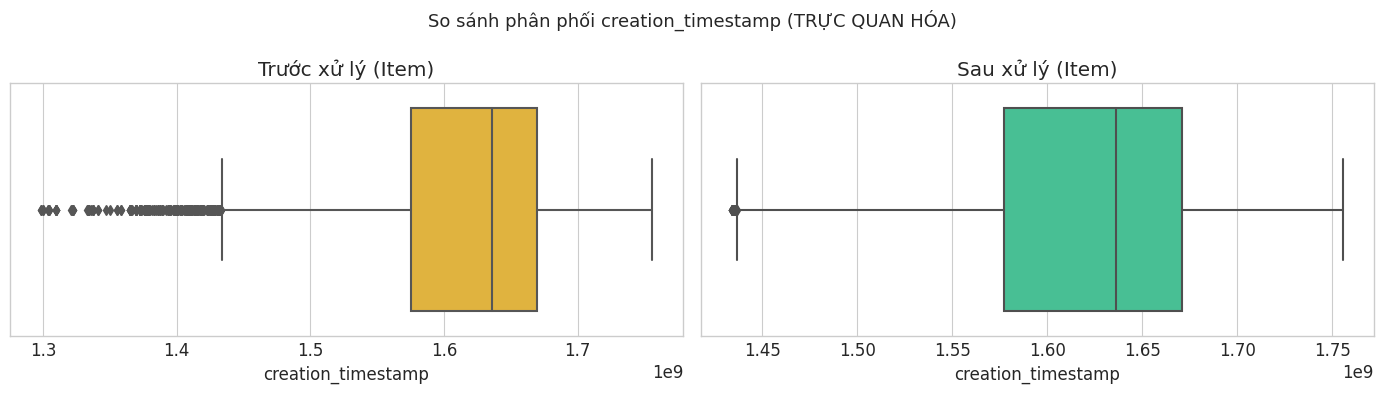

In [74]:
s = pd.to_numeric(df_item_for_viz["creation_timestamp"], errors="coerce").dropna()
q1, q3 = np.percentile(s, [25, 75])
iqr = q3 - q1
lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
df_item_viz_clean = df_item_for_viz[(df_item_for_viz["creation_timestamp"] >= lower) &
                                    (df_item_for_viz["creation_timestamp"] <= upper)]

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
sns.boxplot(x=df_item_for_viz["creation_timestamp"], ax=ax[0], color="#fbbf24")
sns.boxplot(x=df_item_viz_clean["creation_timestamp"], ax=ax[1], color="#34d399")
ax[0].set_title("Trước xử lý (Item)")
ax[1].set_title("Sau xử lý (Item)")
plt.suptitle("So sánh phân phối creation_timestamp (TRỰC QUAN HÓA)", fontsize=13)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


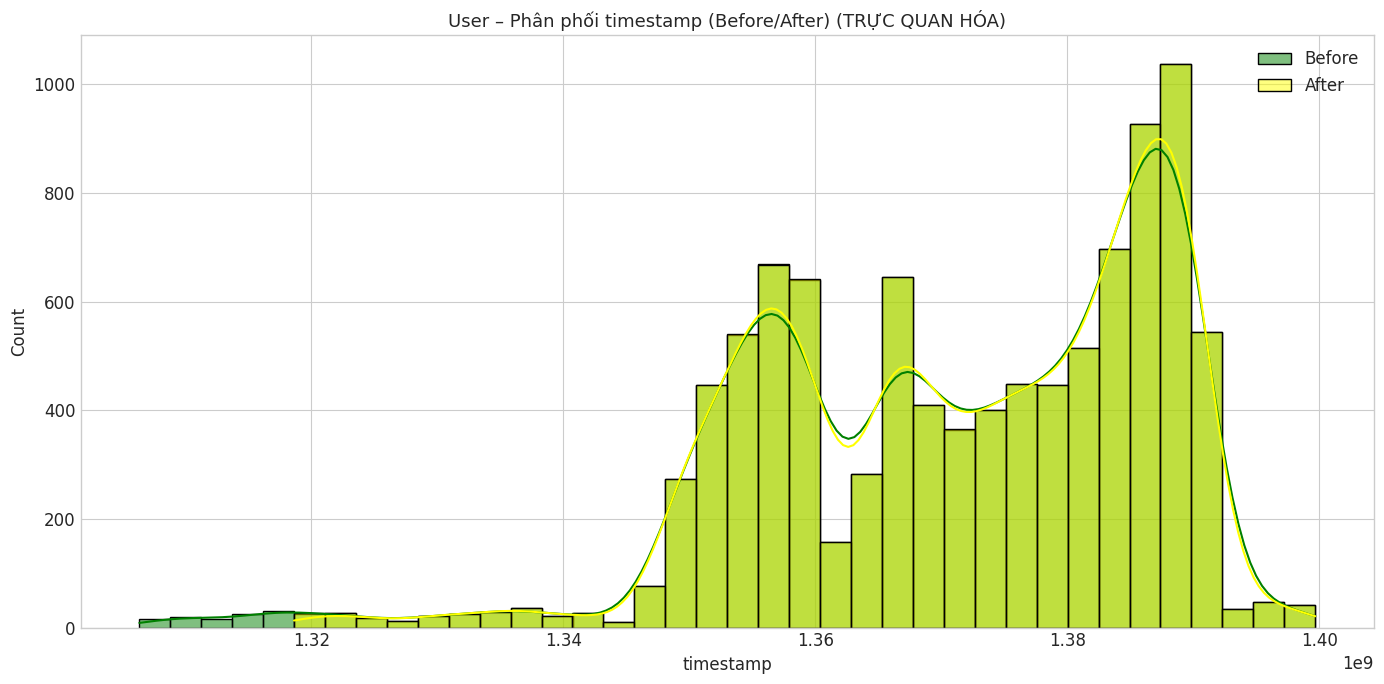

In [75]:
s = pd.to_numeric(df_user_for_viz["timestamp"], errors="coerce").dropna()
q1, q3 = np.percentile(s, [25, 75])
iqr = q3 - q1
lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
df_user_viz_clean = df_user_for_viz[(df_user_for_viz["timestamp"] >= lower) &
                                    (df_user_for_viz["timestamp"] <= upper)]

sns.histplot(df_user_for_viz["timestamp"], kde=True, color="green", label="Before", alpha=0.5)
sns.histplot(df_user_viz_clean["timestamp"], kde=True, color="yellow", label="After", alpha=0.5)
plt.title("User – Phân phối timestamp (Before/After) (TRỰC QUAN HÓA)", fontsize=13)
plt.legend()
plt.tight_layout()
plt.show()

>

## Task 3 — Phân tích tương đồng & loại đặc trưng thừa
- 1) quantity ~ event_value: nếu ~trùng nhau, drop 1
- 2) region suy ra từ province → drop 1
- 3) Datetime gốc sẽ drop sau khi rút trích time-features (Task 4)

In [76]:
def analyze_redundancy(df: pd.DataFrame, table_name: str, corr_threshold=0.9):
    print(f" PHÂN TÍCH BẢNG: {table_name}")

    # --- 1️ Phát hiện cột trùng lặp hoàn toàn
    duplicated_cols = []
    cols = df.columns.tolist() # [Sửa] Dùng .columns.tolist()
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            # [Sửa] Dùng .equals() là cách chuẩn của pandas
            if df[cols[i]].equals(df[cols[j]]):
                duplicated_cols.append((cols[i], cols[j]))

    if duplicated_cols:
        print(f" Cột trùng lặp hoàn toàn ({len(duplicated_cols)}):")
        for c1, c2 in duplicated_cols:
            print(f"  - {c1} ↔ {c2}")
    else:
        print(" Không có cột trùng lặp hoàn toàn.")

    #  Tính hệ số tương quan giữa các cột số
    numeric_cols = df.select_dtypes(include=np.number).columns
    if len(numeric_cols) < 2:
        print(" Không đủ biến numeric để tính tương quan.")
        return

    corr = df[numeric_cols].corr().abs()
    high_corr = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
                      .stack()
                      .reset_index())
    high_corr.columns = ["Var1", "Var2", "Corr"]
    high_corr = high_corr[high_corr["Corr"] > corr_threshold]

    if not high_corr.empty:
        print(f"\n Cặp biến tương quan mạnh (>|{corr_threshold}|):")
        print(high_corr)
    else:
        print(f" Không có cặp biến có tương quan > {corr_threshold}.")

    plt.figure(figsize=(10, 8)) # [Sửa] Đổi kích thước lại cho hợp lý
    sns.heatmap(corr, cmap="coolwarm", annot=False)
    plt.title(f"{table_name} – Ma trận tương quan", fontsize=13)
    plt.show()

In [77]:
print("\nPhân tích tương đồng (trên dữ liệu đã làm sạch outlier)")
df_pur_for_corr = lf_pur.slice(0, 100000).collect().to_pandas()
df_item_for_corr = lf_item.collect().to_pandas()
df_user_for_corr = lf_user.slice(0, 10000).collect().to_pandas()


Phân tích tương đồng (trên dữ liệu đã làm sạch outlier)


 PHÂN TÍCH BẢNG: Purchase
 Không có cột trùng lặp hoàn toàn.

 Cặp biến tương quan mạnh (>|0.9|):
        Var1      Var2      Corr
0  timestamp  date_key  0.993008


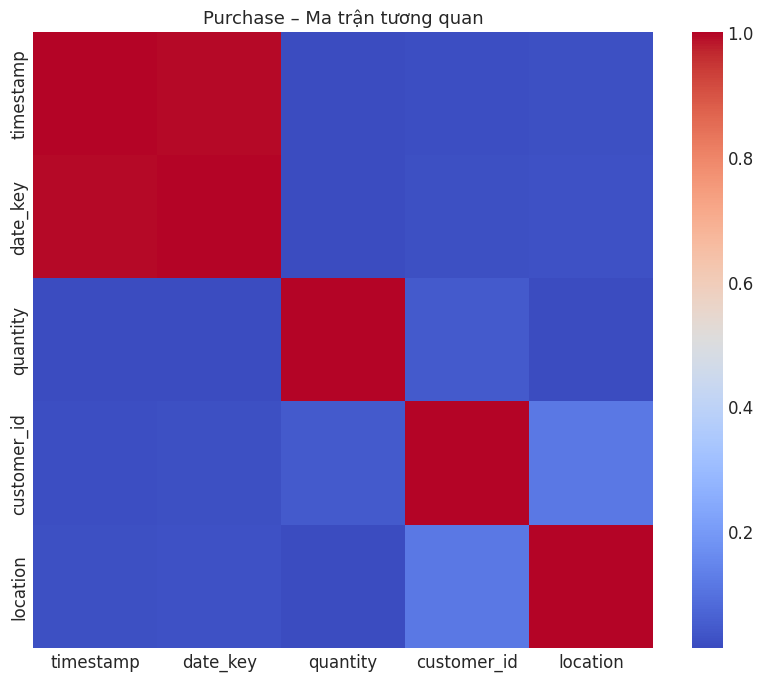

In [78]:
analyze_redundancy(df_pur_for_corr,  "Purchase")

> Nhận xét: timestamp và date_key có tương quan rất cao (≈0.99) → trùng thông tin về thời gian. Các biến khác tương quan thấp, hoạt động độc lập.

>Kết luận: Giữ timestamp, loại date_key. Các biến khác giữ nguyên.

 PHÂN TÍCH BẢNG: Item
 Không có cột trùng lặp hoàn toàn.

 Cặp biến tương quan mạnh (>|0.9|):
   Var1                Var2      Corr
4  p_id  creation_timestamp  0.975628


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


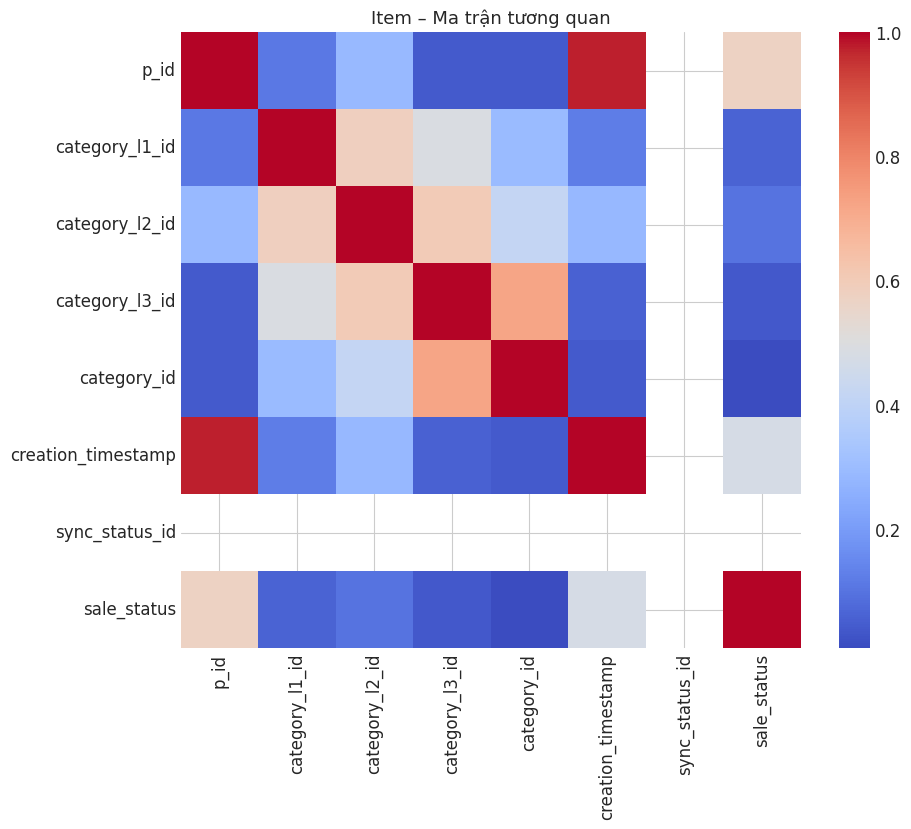

In [79]:
analyze_redundancy(df_item_for_corr, "Item")

>Nhận xét: p_id và creation_timestamp tương quan mạnh (≈0.98). Nhóm category_l1_id–l3_id–category_id có quan hệ phân cấp (0.6–0.8).

>Kết luận: Loại 1 trong 2 (p_id hoặc creation_timestamp), giữ category_id đại diện. Giữ sale_status và sync_status_id.

 PHÂN TÍCH BẢNG: User
 Không có cột trùng lặp hoàn toàn.

 Cặp biến tương quan mạnh (>|0.9|):
          Var1       Var2      Corr
1  customer_id  timestamp  0.988881


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


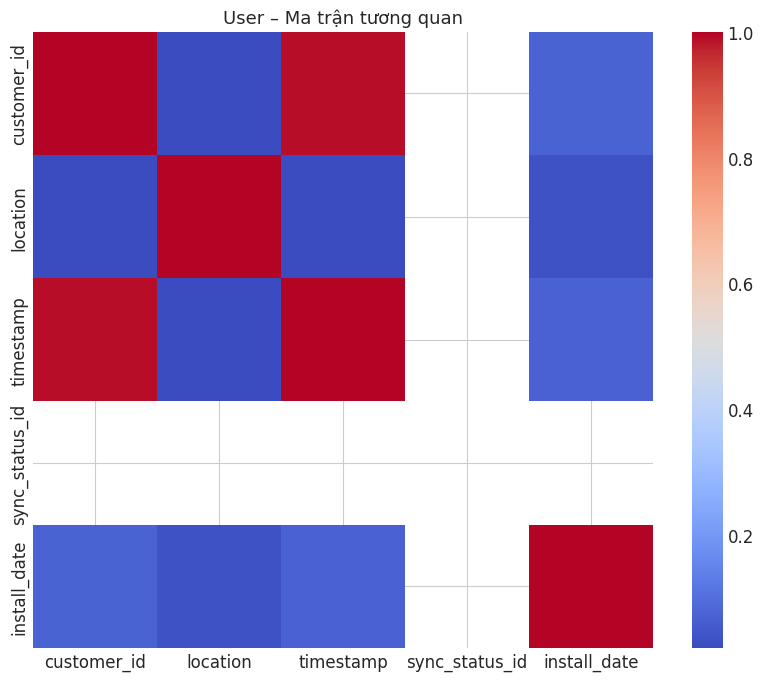

In [80]:
analyze_redundancy(df_user_for_corr, "User")

> Nhận xét: customer_id và timestamp tương quan cao (≈0.99), vì ID khách hàng thường gắn với thời điểm tạo. Các biến khác độc lập.

>Kết luận: Giữ timestamp, . Các biến khác giữ nguyên.

**Theo nhận xét ban đầu:**
 - Purchase: timestamp & date_key trùng thông tin -> giữ timestamp, drop date_key
 - Item: p_id trùng mạnh với creation_timestamp (ID tăng theo thời gian) -> drop p_id
 - User: customer_id tương quan với timestamp, nhưng TA GIỮ customer_id để JOIN feature sau này

> **Thực hiện loại bỏ**

In [81]:
if "date_key" in lf_pur.columns:
    lf_pur = lf_pur.drop("date_key")
    print("\nPurchase: đã loại 'date_key' (trùng thông tin thời gian).")


Purchase: đã loại 'date_key' (trùng thông tin thời gian).


/tmp/ipykernel_19/2120717118.py:1: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  if "date_key" in lf_pur.columns:


In [82]:
if "p_id" in lf_item.columns:
    lf_item = lf_item.drop("p_id")
    print("Item: đã loại 'p_id' (ít ý nghĩa, tương quan mạnh với thời gian tạo).")

Item: đã loại 'p_id' (ít ý nghĩa, tương quan mạnh với thời gian tạo).


/tmp/ipykernel_19/2893624198.py:1: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  if "p_id" in lf_item.columns:


In [83]:
print("\n Schema sau xử lý:")
print("Purchase:", lf_pur.collect_schema())
print("Item:", lf_item.collect_schema())
print("User:", lf_user.collect_schema())


 Schema sau xử lý:
Purchase: Schema([('timestamp', Int64), ('user_id', String), ('item_id', String), ('event_value', Decimal(precision=38, scale=4)), ('price', Decimal(precision=38, scale=4)), ('quantity', Int32), ('customer_id', Int32), ('created_date', Datetime(time_unit='us', time_zone=None)), ('updated_date', Datetime(time_unit='us', time_zone=None)), ('channel', String), ('payment', String), ('location', Int32), ('discount', Decimal(precision=38, scale=4)), ('is_deleted', Boolean)])
Item: Schema([('item_id', String), ('price', Decimal(precision=38, scale=4)), ('category_l1_id', Int32), ('category_l1', String), ('category_l2_id', Int32), ('category_l2', String), ('category_l3_id', Int32), ('category_l3', String), ('category_id', Int32), ('category', String), ('description', String), ('brand', String), ('creation_timestamp', Int64), ('is_deleted', Boolean), ('created_date', Datetime(time_unit='us', time_zone=None)), ('updated_date', Datetime(time_unit='us', time_zone=None)), ('sync

#### **Kết Luận**: loại date_key, một trong hai p_id hoặc creation_timestamp, và cân nhắc bỏ customer_id.

## Task 4 — Chuẩn hóa & biến đổi dữ liệu
-Giảm nhiễu, cân bằng phân phối dữ liệu.

-Chuẩn hóa thang đo giữa các đặc trưng.

-Tách và mở rộng thông tin ẩn trong biến thời gian, giúp cho bước dự đoán hiệu quả hơn

> Ở Task 3 thì các cột bị lệch (Skew > 1 hoặc < -1) là :
- Purchase: event_value, quantity -> Biến đổi log1p
- Item: sale_status -> Biến đổi log1p
- User: timestamp, install_date -> Biến đổi log1p và chuẩn hóa z-score

> 4.1 Chuẩn hoá timestamp trong Purchase → Datetime

In [84]:
ts_dtype = lf_pur.collect_schema()["timestamp"]

if ts_dtype == pl.Int64:
    lf_pur = lf_pur.with_columns(
        (pl.col("timestamp") * 1000).cast(pl.Datetime("ms")).alias("timestamp")
    )
elif ts_dtype.is_temporal():
    lf_pur = lf_pur.with_columns(
        pl.col("timestamp").cast(pl.Datetime("ms")).alias("timestamp")
    )
else:
    if "timestamp" in lf_pur.columns:
        raise TypeError(f"Unsupported purchase timestamp dtype: {ts_dtype}")
    else:
        print("Purchase: Cột 'timestamp' không tồn tại, bỏ qua chuyển đổi.")


print("\nPurchase: timestamp đã được convert sang Datetime(ms).")


Purchase: timestamp đã được convert sang Datetime(ms).


> User.timestamp & User.install_date

In [85]:
user_ts_dtype = lf_user.collect_schema()["timestamp"]
if user_ts_dtype == pl.Int64:
    lf_user = lf_user.with_columns(
        (pl.col("timestamp") * 1000).cast(pl.Datetime("ms")).alias("timestamp")
    )
elif user_ts_dtype.is_temporal():
    lf_user = lf_user.with_columns(
        pl.col("timestamp").cast(pl.Datetime("ms")).alias("timestamp")
    )

inst_dtype = lf_user.collect_schema()["install_date"]
if inst_dtype == pl.Int64:
    lf_user = lf_user.with_columns(
        (pl.col("install_date") * 1000).cast(pl.Datetime("ms")).alias("install_date")
    )
elif inst_dtype.is_temporal():
    lf_user = lf_user.with_columns(
        pl.col("install_date").cast(pl.Datetime("ms")).alias("install_date")
    )

print("User: timestamp & install_date đã được convert sang Datetime(ms).")

User: timestamp & install_date đã được convert sang Datetime(ms).


> 4.2 Log1p transform (theo đề bài) – thêm cột mới, không overwrite

In [86]:
lf_pur = lf_pur.with_columns([
    (pl.col("event_value").cast(pl.Float64) + 1).log().alias("event_value_log"),
    (pl.col("quantity").cast(pl.Float64) + 1).log().alias("quantity_log"),
])
print("\nPurchase: đã thêm event_value_log, quantity_log.")


Purchase: đã thêm event_value_log, quantity_log.


In [87]:
if "sale_status" in lf_item.columns:
    lf_item = lf_item.with_columns(
        (pl.col("sale_status").cast(pl.Float64) + 1).log().alias("sale_status_log")
    )
    print("Item: đã thêm sale_status_log.")

Item: đã thêm sale_status_log.


/tmp/ipykernel_19/1329088597.py:1: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  if "sale_status" in lf_item.columns:


> 4.3 Log1p + (optionally) chuẩn hoá Z-score cho timestamp, install_date

In [88]:
from sklearn.preprocessing import StandardScaler

# [LOGIC FIX]: Sử dụng .collect() thay vì .to_pandas() trực tiếp từ LazyFrame
# và đảm bảo collect() được gọi trước khi dùng .to_pandas()
df_user_time = (
    lf_user
    .select([
        pl.col("timestamp").cast(pl.Int64).alias("timestamp_int"),
        pl.col("install_date").cast(pl.Int64).alias("install_date_int"),
    ])
    .collect(engine="streaming") # Thu thập dữ liệu trước
    .to_pandas() # Sau đó chuyển sang Pandas
)

scaler = StandardScaler()
scaled = scaler.fit_transform(df_user_time[["timestamp_int", "install_date_int"]])
df_user_scaled = pd.DataFrame(scaled, columns=["timestamp_scaled", "install_date_scaled"])
print("\nUser: Đã chuẩn hoá timestamp & install_date theo Z-score (demo describe):")
print(df_user_scaled.describe().round(2))




User: Đã chuẩn hoá timestamp & install_date theo Z-score (demo describe):
       timestamp_scaled  install_date_scaled
count          46992.00             46992.00
mean               0.00                 0.00
std                1.00                 1.00
min               -4.18                -1.30
25%               -0.58                -0.66
50%                0.31                -0.53
75%                0.79                 1.06
max                1.16                 2.13


> 4.4 Tách feature thời gian từ timestamp Purchase & install_date User

In [89]:
from datetime import datetime

lf_pur = lf_pur.with_columns([
    pl.col("timestamp").dt.hour().alias("purchase_hour"),
    pl.col("timestamp").dt.day().alias("purchase_day"),
    pl.col("timestamp").dt.weekday().alias("purchase_weekday"),
    pl.col("timestamp").dt.month().alias("purchase_month"),
    pl.col("timestamp").dt.year().alias("purchase_year"),
])
print("\nPurchase: đã tách các time-features (purchase_hour/day/weekday/month/year).")


Purchase: đã tách các time-features (purchase_hour/day/weekday/month/year).


In [90]:
lf_user = lf_user.with_columns([
    pl.col("install_date").dt.month().alias("install_month"),
    pl.col("install_date").dt.year().alias("install_year"),
])
print("User: đã tách install_month, install_year.")

User: đã tách install_month, install_year.


> 4.5 Chuẩn hoá event_value theo từng user (relative value)

In [91]:
user_avg_value = (
    lf_pur
    .group_by("user_id")
    .agg(pl.col("event_value_log").mean().alias("user_avg_value"))
)

lf_pur = (
    lf_pur
    .join(user_avg_value, on="user_id", how="left")
    .with_columns(
        (pl.col("event_value_log") / pl.col("user_avg_value"))
        .fill_null(1.0)
        .alias("value_norm_by_user")
    )
)

print("\nPurchase: đã thêm value_norm_by_user (event_value_log chuẩn hoá theo user).")


Purchase: đã thêm value_norm_by_user (event_value_log chuẩn hoá theo user).


In [92]:
print("Purchase schema sau :", lf_pur.collect_schema())
print("User schema sau :", lf_user.collect_schema())


Purchase schema sau : Schema([('timestamp', Datetime(time_unit='ms', time_zone=None)), ('user_id', String), ('item_id', String), ('event_value', Decimal(precision=38, scale=4)), ('price', Decimal(precision=38, scale=4)), ('quantity', Int32), ('customer_id', Int32), ('created_date', Datetime(time_unit='us', time_zone=None)), ('updated_date', Datetime(time_unit='us', time_zone=None)), ('channel', String), ('payment', String), ('location', Int32), ('discount', Decimal(precision=38, scale=4)), ('is_deleted', Boolean), ('event_value_log', Float64), ('quantity_log', Float64), ('purchase_hour', Int8), ('purchase_day', Int8), ('purchase_weekday', Int8), ('purchase_month', Int8), ('purchase_year', Int32), ('user_avg_value', Float64), ('value_norm_by_user', Float64)])
User schema sau : Schema([('customer_id', Int32), ('gender', String), ('location', Int32), ('province', String), ('membership', String), ('timestamp', Datetime(time_unit='ms', time_zone=None)), ('created_date', Datetime(time_unit='

## Task 5: Rút trích & Tạo đặc trưng mới (Feature Engineering)
>Từ các bảng Purchase, User, và Item, tạo thêm các đặc trưng tổng hợp và hành vi giúp mô hình dự đoán xem:
**“Người dùng nào có khả năng mua hàng cao hơn, và họ thường mua gì, khi nào?”**

#### Dự đoán hướng tạo đặc trưng

> Hành vi người dùng (User Behavior)	Thể hiện hành vi và tần suất mua hàng của khách hàng	`total_orders, avg_value, most_active_hour`

> Đặc trưng sản phẩm (Item Info)	Mô tả sản phẩm và mức độ phổ biến của chúng	`avg_price_per_category, total_sales_per_item`

> Đặc trưng thời gian (Temporal Features)	Nắm bắt xu hướng mua hàng theo thời gian (ngày, tháng, mùa, tuần)	`month, weekday, hour`

> Tài chính & thanh toán (Payment Features)	Phản ánh thói quen và phương thức thanh toán	`dominant_channel, payment_mode_ratio`

#### **Rút trích đặc trưng từ Purchase**: thể hiện hành vi giao dịch, nên ta trích xuất đặc trưng tổng hợp theo user_id.

In [93]:
lf_user_features = (
    lf_pur
    .group_by("user_id")
    .agg([
        pl.len().alias("total_orders"),
        pl.col("event_value").sum().alias("total_spent"),
        pl.col("event_value").mean().alias("avg_spent"),
        pl.col("quantity").sum().alias("total_quantity"),
        pl.col("channel").n_unique().alias("num_channels"),
        pl.col("payment").n_unique().alias("num_payment_types"),
        pl.col("purchase_hour").mean().cast(pl.Float64).alias("avg_active_hour"),
        pl.col("purchase_weekday").mean().cast(pl.Float64).alias("avg_active_weekday"),
        pl.col("purchase_month").mean().cast(pl.Float64).alias("avg_active_month"),
    ])
)

print("\nĐã rút trích lf_user_features (hành vi mua hàng).")


Đã rút trích lf_user_features (hành vi mua hàng).


#### **Rút trích đặc trưng từ Item**: Tập trung vào mức độ phổ biến và giá trị trung bình theo danh mục sản phẩm.

In [94]:
lf_item_features = (
    lf_pur
    .group_by("item_id")
    .agg([
        pl.count().alias("total_purchases"),
        pl.col("event_value").mean().alias("avg_item_value"),
        pl.col("quantity").sum().alias("total_sold"),
        pl.col("user_id").n_unique().alias("unique_buyers"),
    ])
)

print("Đã rút trích lf_item_features (đặc trưng phổ biến item).")

Đã rút trích lf_item_features (đặc trưng phổ biến item).


/tmp/ipykernel_19/3550925844.py:5: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  pl.count().alias("total_purchases"),


#### **Gộp đặc trưng với bảng User**: Kết hợp dữ liệu từ User, lf_user_features và lf_item_features để tạo bộ dữ liệu cuối phục vụ mô hình dự đoán.

In [95]:
lf_user_enriched = (
    lf_user
    .join(lf_user_features, on="user_id", how="left")
    .fill_null(0)
)

print("\nUser đã được enrich thêm đặc trưng hành vi.")
print(lf_user_enriched.collect_schema())


User đã được enrich thêm đặc trưng hành vi.
Schema([('customer_id', Int32), ('gender', String), ('location', Int32), ('province', String), ('membership', String), ('timestamp', Datetime(time_unit='ms', time_zone=None)), ('created_date', Datetime(time_unit='us', time_zone=None)), ('updated_date', Datetime(time_unit='us', time_zone=None)), ('sync_status_id', Float64), ('last_sync_date', String), ('region', String), ('location_name', String), ('install_app', String), ('install_date', Datetime(time_unit='ms', time_zone=None)), ('district', String), ('user_id', String), ('is_deleted', Boolean), ('install_month', Int8), ('install_year', Int32), ('total_orders', UInt32), ('total_spent', Decimal(precision=38, scale=4)), ('avg_spent', Float64), ('total_quantity', Int32), ('num_channels', UInt32), ('num_payment_types', UInt32), ('avg_active_hour', Float64), ('avg_active_weekday', Float64), ('avg_active_month', Float64)])


#### Trực quan hóa

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


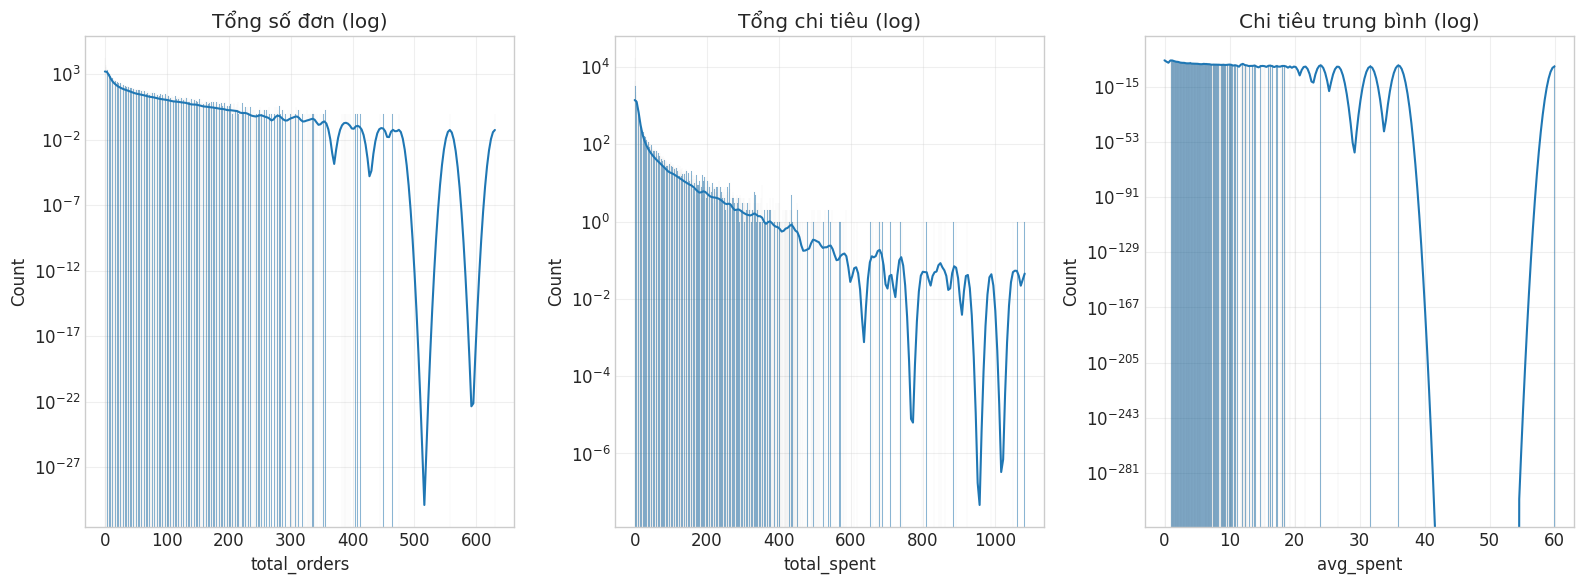

In [96]:
df_summary = (
    lf_user_enriched
    .select(["total_orders", "total_spent", "avg_spent"])
    .collect(engine="streaming")
    .to_pandas()
)

for c in ["total_spent", "avg_spent"]:
    df_summary[c] = pd.to_numeric(df_summary[c], errors="coerce").fillna(0.0)

fig, ax = plt.subplots(1, 3, figsize=(16, 6))
sns.histplot(df_summary["total_orders"], ax=ax[0], kde=True)
sns.histplot(df_summary["total_spent"], ax=ax[1], kde=True)
sns.histplot(df_summary["avg_spent"], ax=ax[2], kde=True)
for a in ax:
    a.set_yscale("log")
    a.grid(True, alpha=0.3)
ax[0].set_title("Tổng số đơn (log)")
ax[1].set_title("Tổng chi tiêu (log)")
ax[2].set_title("Chi tiêu trung bình (log)")
plt.tight_layout()
plt.show()

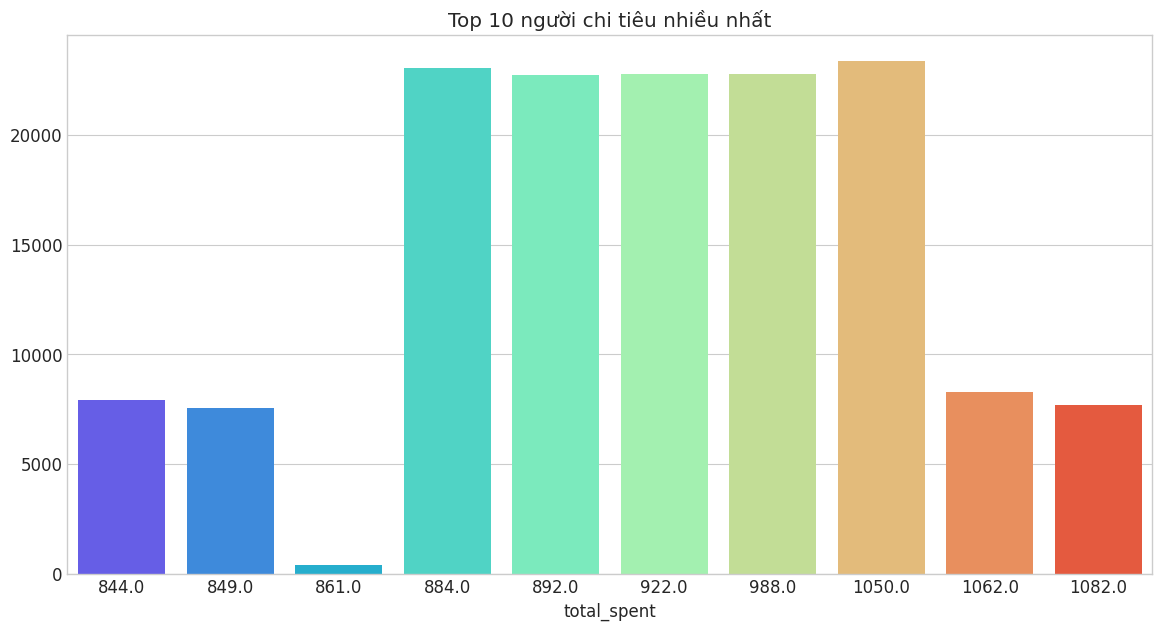

In [97]:
top_spenders = df_summary.nlargest(10, "total_spent")
sns.barplot(x="total_spent", y=top_spenders.index, data=top_spenders, palette="rainbow")
plt.title("Top 10 người chi tiêu nhiều nhất")
plt.show()


## **Feature Extraction**

In [98]:
print("Đang cache lf_pur...")
lf_pur = lf_pur.cache()

print("Đang cache lf_item...")
lf_item = lf_item.cache()

print("Đang cache lf_user...")
lf_user = lf_user.cache()

print("Đã cache xong 3 LazyFrame chính!")

Đang cache lf_pur...
Đang cache lf_item...
Đang cache lf_user...
Đã cache xong 3 LazyFrame chính!


> **Đặc trưng sản phẩm mua cùng: | item A | itemB | #cooc |**: là cặp sản phẩm mua cùng chung 1 đơn hàng ( hoặc cùng cung người mua cùng 1 ngày)

In [99]:
from collections import Counter
from itertools import combinations

# Ở đây giả sử df_full đã là pandas DataFrame chứa ít nhất:
# ["user_id", "timestamp", "item_id"]
# (y như bạn đang dùng)

baskets = df_full.groupby(
    ["user_id", df_full["timestamp"].dt.date]
)["item_id"].apply(list)

pairs_counter = Counter(
    tuple(sorted(p))
    for basket in baskets if len(basket) > 1
    for p in combinations(basket, 2)
)

pair_list = [
    {"pair": k, "cooc_count": v}
    for k, v in pairs_counter.items()
]

df_cooc = pl.DataFrame(pair_list)
df_cooc_final = (
    df_cooc
    .with_columns([
        pl.col("pair").list.get(0).alias("item_A"),
        pl.col("pair").list.get(1).alias("item_B")
    ])
    .drop("pair")
    .select("item_A", "item_B", "cooc_count")
    .sort("cooc_count", descending=True)
)

print("DataFrame các cặp sản phẩm mua cùng nhau (Co-occurrence) – xem 10 dòng đầu:")
df_cooc_preview = df_cooc_final.head(10)
display(df_cooc_preview.to_pandas())  


DataFrame các cặp sản phẩm mua cùng nhau (Co-occurrence) – xem 10 dòng đầu:


,item_A,item_B,cooc_count
0,2803000000011,2803000000013,350
1,2803000000012,2803000000013,162
2,5427000000004,5427000000006,160
3,2803000000010,2803000000012,149
4,2803000000011,2803000000012,143
5,0029250010002,0029250010003,136
6,7115000000004,7115000000005,131
7,5427000000004,5427000000005,127
8,0029250010001,0029250010003,125
9,5427000000005,5427000000006,125


> **Đặc trưng lứa tuổi của em bé: | customer_id | date_of_birth | age_in_month |**: Nếu User hoặc Purchase có chứa thông tin ngày sinh (date_of_birth hoặc timestamp lúc mua), ta có thể suy ra tuổi em bé tại thời điểm mua.

In [100]:
#  Tín hiệu 1: Lấy ID các sản phẩm "Step 1" hoặc "Newborn"
lf_signal_items = lf_item.filter(
    pl.col("category").str.to_lowercase().str.contains(r"step\s*1|0-6|newborn|sơ sinh")
).select("item_id").unique()

# Tín hiệu 2: Chuẩn bị bảng User với 'account_creation_date'
user_ts_dtype = lf_user.collect_schema()["timestamp"]
if user_ts_dtype == pl.Int64:
    lf_user_cleaned = lf_user.with_columns(
        (pl.col("timestamp") * 1000).cast(pl.Datetime("ms")).alias("account_creation_date")
    )
else:
    lf_user_cleaned = lf_user.with_columns(
        pl.col("timestamp").cast(pl.Datetime("ms")).alias("account_creation_date")
    )

# Chuẩn bị bảng Purchase với 'purchase_timestamp'
pur_ts_dtype = lf_pur.collect_schema()["timestamp"]
if pur_ts_dtype == pl.Int64:
    lf_pur_cleaned = lf_pur.with_columns(
        (pl.col("timestamp") * 1000).cast(pl.Datetime("ms")).alias("purchase_timestamp")
    )
else:
    lf_pur_cleaned = lf_pur.with_columns(
        pl.col("timestamp").cast(pl.Datetime("ms")).alias("purchase_timestamp")
    )

#Tìm Ngày mua "Tín hiệu" Sớm nhất

lf_signal_purchases = lf_pur_cleaned.join(
    lf_signal_items, on="item_id", how="inner"
)

lf_first_purchase_date = lf_signal_purchases.group_by("user_id").agg(
    pl.col("purchase_timestamp").min().alias("first_signal_purchase_date")
)

# Áp dụng Quy tắc Heuristic (Kết hợp 2 tín hiệu)

lf_creation_date = lf_user_cleaned.select("user_id", "account_creation_date")

lf_signals = lf_creation_date.join(
    lf_first_purchase_date, on="user_id", how="left"
)

# Áp dụng logic
lf_inferred_dob = lf_signals.with_columns(
    # Giả định A (Mua hàng): Mua 30 ngày SAU KHI SINH
    pl.col("first_signal_purchase_date").dt.offset_by("-30d").alias("dob_from_purchase"),
    # Giả định B (Đăng ký): Đăng ký 30 ngày TRƯỚC KHI SINH
    pl.col("account_creation_date").dt.offset_by("30d").alias("dob_from_creation")
).with_columns(
    # Áp dụng quy tắc kết hợp
    pl.when(
        pl.col("account_creation_date") < pl.col("first_signal_purchase_date")
    )
    .then(pl.col("dob_from_creation"))  # Tin vào ngày đăng ký
    .otherwise(pl.col("dob_from_purchase")) # Tin vào ngày mua
    .alias("inferred_date_of_birth")
).with_columns(
    # Xử lý trường hợp họ chỉ đăng ký mà chưa bao giờ mua hàng tín hiệu
    pl.col("inferred_date_of_birth").fill_null(pl.col("dob_from_creation"))
)

# Bảng DOB ước tính cuối cùng cho mỗi user
lf_user_dob_final = lf_inferred_dob.select("user_id", "inferred_date_of_birth")


# Join ngày sinh ước tính vào TOÀN BỘ lịch sử mua hàng
lf_full_history_with_age = lf_pur_cleaned.join(
    lf_user_dob_final, on="user_id", how="left"
)

# Tính 'inferred_age_in_month' cho MỖI giao dịch
lf_final_feature_table = lf_full_history_with_age.with_columns(
    (
        (pl.col("purchase_timestamp") - pl.col("inferred_date_of_birth")).dt.total_days() / 30.44
    ).cast(pl.Int32).alias("inferred_age_in_month")
)

# Nhóm theo ID khách hàng và ngày sinh ước tính
#    Lấy tuổi lớn nhất(từ lần mua hàng gần nhất)
lf_user_level_age = lf_final_feature_table.group_by(
    "customer_id", "inferred_date_of_birth"
).agg(
    pl.col("inferred_age_in_month").max().alias("age_in_month")
)

df_result = lf_user_level_age.select(
    pl.col("customer_id"),
    pl.col("inferred_date_of_birth").alias("date_of_birth"),
    pl.col("age_in_month")
).collect(engine="streaming")

print("Bảng đặc trưng lứa tuổi em bé:")


Bảng đặc trưng lứa tuổi em bé:


In [101]:
import polars as pl

# Thay thế code cũ của bạn
# df_filtered = df_result[df_result['date_of_birth'].notnull()] # <-- Lỗi

# BẰNG code Polars này:
df_filtered = df_result.filter(
    pl.col('date_of_birth').is_not_null()
)

# In ra 5 hàng đầu tiên
print(df_filtered.head(100))

shape: (100, 3)
┌─────────────┬─────────────────────┬──────────────┐
│ customer_id ┆ date_of_birth       ┆ age_in_month │
│ ---         ┆ ---                 ┆ ---          │
│ i32         ┆ datetime[ms]        ┆ i32          │
╞═════════════╪═════════════════════╪══════════════╡
│ 261741      ┆ 2015-02-05 19:23:46 ┆ 118          │
│ 215474      ┆ 2014-11-21 12:11:35 ┆ 121          │
│ 267502      ┆ 2015-02-14 19:50:42 ┆ 118          │
│ 277411      ┆ 2015-03-02 13:07:05 ┆ 117          │
│ 114288      ┆ 2013-12-10 11:11:41 ┆ 132          │
│ …           ┆ …                   ┆ …            │
│ 56918       ┆ 2013-01-09 18:17:07 ┆ 143          │
│ 108868      ┆ 2013-11-01 20:15:55 ┆ 133          │
│ 251390      ┆ 2015-01-20 21:13:14 ┆ 119          │
│ 181203      ┆ 2014-09-06 11:57:34 ┆ 123          │
│ 233793      ┆ 2014-12-23 17:27:49 ┆ 120          │
└─────────────┴─────────────────────┴──────────────┘


> **Đặc trưng phân khúc sản phẩm sữa Step 1:| item_id | category | segment |**: Phân loại sản phẩm Item theo step của sữa trẻ em (Step 1, 2, 3...) dựa trên tên hoặc category.

In [102]:
# Chuẩn hóa các regex tìm kiếm
step1_regex = r"step\s*1|0-6"
step2_regex = r"step\s*2|6-12"
step3_regex = r"step\s*3|12-18|1-2" # 1-2 tuổi
step4_regex = r"step\s*4|18-36|2-3" # 2-3 tuổi

lf_item_segment_full = (
    lf_item
    .select(["item_id", "category"])
    .with_columns(
        # Chuyển category về chữ thường 1 lần duy nhất
        pl.col("category").str.to_lowercase().alias("category_lower")
    )
    .with_columns(
        pl.when(pl.col("category_lower").str.contains(step1_regex))
        .then(pl.lit("Step 1 (0-6m)"))
        .when(pl.col("category_lower").str.contains(step2_regex))
        .then(pl.lit("Step 2 (6-12m)"))
        .when(pl.col("category_lower").str.contains(step3_regex))
        .then(pl.lit("Step 3 (1-2y)"))
        .when(pl.col("category_lower").str.contains(step4_regex))
        .then(pl.lit("Step 4 (2-3y+)"))
        .otherwise(pl.lit("Other"))  # Các loại khác (sữa bầu, tã, v.v.)
        .alias("segment")
    )
    .drop("category_lower")  # Bỏ cột tạm
)

# Collect sample để hiển thị
df_item_segment_full = lf_item_segment_full.limit(20).collect().to_pandas()
print("Sample phân khúc sản phẩm sữa Step:")
display(df_item_segment_full)

print("\nPhân phối các segment (value_counts):")
# Ở đây có thể tính trên toàn bộ LazyFrame nhưng chỉ collect series nhỏ
seg_counts = (
    lf_item_segment_full
    .group_by("segment")
    .agg(pl.len().alias("cnt"))
    .sort("cnt", descending=True)
    .collect()
)
display(seg_counts)

Sample phân khúc sản phẩm sữa Step:


,item_id,category,segment
0,0010290040150,Bộ quần áo bé gái,Other
1,0024181040235,Áo bé trai,Other
2,0010251040141,"Quần, chân váy bé gái",Other
3,0009051040002,Gối ôm TH khác,Other
4,0007051040005,"Nôi, cũi Autoru",Other
5,0014570000020,Giày tập đi khác tồn,Other
6,0020010000396,Merries_Tã Quần,Other
7,0024180250008,Quần bé trai,Other
8,0008020000220,Phụ kiện treo nôi,Other
9,0020030000001,Pampers Nhật_Sơ Sinh,Other



Phân phối các segment (value_counts):


segment,cnt
str,u32
"""Other""",26642
"""Step 1 (0-6m)""",127
"""Step 3 (1-2y)""",120
"""Step 4 (2-3y+)""",79
"""Step 2 (6-12m)""",60


> **Đặc trưng phân khúc khách hàng dựa trên sữa Step 1:| customer_id |  segment |**: những khách hàng có em bé sơ sinh (0–6 tháng)

In [103]:
lf_item_segment = (
    lf_item
    .select(["item_id", "category"])
    .with_columns([
        pl.when(
            pl.col("category").str.to_lowercase().str.contains(r"step\s*1|0-6")
        ).then(pl.lit("Step 1"))
         .otherwise(pl.lit("Other"))
         .alias("segment")
    ])
)

# Lấy các item "Step 1"
lf_step1_items = (
    lf_item_segment
    .filter(pl.col("segment") == "Step 1")
    .select("item_id")
    .unique()
)

# Tìm các 'user_id' đã mua Step 1
lf_step1_buyers = (
    lf_pur.join(lf_step1_items, on="item_id", how="inner")
          .select("user_id")
          .unique()
          .with_columns(pl.lit("Step 1 Buyer").alias("segment"))
)

# Lấy TẤT CẢ 'user_id' từ bảng User
lf_all_customers = lf_user.select("user_id").unique()

# Join bằng 'user_id'
lf_customer_segment = (
    lf_all_customers
    .join(lf_step1_buyers, on="user_id", how="left")
    .with_columns(pl.col("segment").fill_null("Other Buyer"))
    .select(["user_id", "segment"])
)

# | user_id | segment |
df_user_segment = lf_customer_segment.limit(20).collect().to_pandas()

print("Sample bảng phân khúc khách hàng :")
display(df_user_segment)

print("\nPhân phối phân khúc khách hàng:")
seg_cust_counts = (
    lf_customer_segment
    .group_by("segment")
    .agg(pl.len().alias("cnt"))
    .sort("cnt", descending=True)
    .collect()
)
display(seg_cust_counts)


Sample bảng phân khúc khách hàng :


,user_id,segment
0,c8de6eac9736e8cf4577151b756fac7b23c2034aee79a5...,Other Buyer
1,cdbaabd88cb96f273051f9956b57b76ca3af7a7a09b62a...,Other Buyer
2,410b8dbe6a6891a739c08d4df2b75444c32d7ed8b2d21e...,Other Buyer
3,658a07e69bbaf868310e7f20b621888d5dcf73dea3673b...,Other Buyer
4,3b7063da91f66efd6b3adb6e52ff74d1fe23b366eefb28...,Other Buyer
5,4ff4e5c9de2ca12c400ec8fe644c328a3931a868a7151a...,Other Buyer
6,fe09144760e9333f6d33eff4736484af230da4c8b14b3d...,Step 1 Buyer
7,5afb06cc74aadfa2c52a8e3cb76413f44e5e6d0563295e...,Other Buyer
8,3de67cc3640dbf7ea6e9522ad6e8a65e66041925beb9b1...,Other Buyer
9,9c7a1c13abf5b1a9eacee9b4141791cec5c57aa96bdbc8...,Other Buyer



Phân phối phân khúc khách hàng:


segment,cnt
str,u32
"""Other Buyer""",43388
"""Step 1 Buyer""",3604


In [104]:
from datetime import timedelta


pur_schema = lf_pur.collect_schema()
item_schema = lf_item.collect_schema()

print("purchase created_date dtype:", pur_schema.get("created_date"))
print("item created_date dtype:", item_schema.get("created_date"))

def safe_parse_datetime(lf, col_name, new_name):
    dtype = lf.collect_schema().get(col_name)
    if dtype == pl.Utf8:
        # Nếu là String thì parse
        return lf.with_columns(
            pl.col(col_name).str.strptime(pl.Datetime, strict=False).alias(new_name)
        )
    else:
        # Nếu đã là Datetime hoặc Int64 → cast luôn
        return lf.with_columns(
            pl.col(col_name).cast(pl.Datetime).alias(new_name)
        )

lf_pur_dt = safe_parse_datetime(lf_pur, "created_date", "created_dt")
lf_item_dt = safe_parse_datetime(lf_item, "created_date", "item_created_dt")

pur_hist = lf_pur_dt

# ref_date = ngày giao dịch mới nhất trong lịch sử
ref_df = pur_hist.select(pl.col("created_dt").max().alias("ref_date")).collect()
ref_date = ref_df["ref_date"][0]
print("ref_date (max created_dt trên toàn lịch sử):", ref_date)


purchase created_date dtype: Datetime(time_unit='us', time_zone=None)
item created_date dtype: Datetime(time_unit='us', time_zone=None)
ref_date (max created_dt trên toàn lịch sử): 2024-12-31 22:35:19.510000


> **FEATURE TỪ PURCHASE (customer_id, item_id)**

> 1. Tổng số lần customer mua item này trong quá khứ. Đặc trưng đồng biến: càng cao → khả năng mua lại càng cao.
- Schema: | customer_id | item_id | ci_cnt |

In [105]:
ci_hist = (
    pur_hist
    .select(["customer_id", "item_id"])
    .group_by(["customer_id", "item_id"])
    .agg(pl.len().alias("ci_cnt"))
)

ci_hist.collect()


customer_id,item_id,ci_cnt
i32,str,u32
7243844,"""0007010000887""",1
3579351,"""3944000000218""",1
5458004,"""3362000000101""",1
5196585,"""0006040000479""",1
7249380,"""4294000000051""",1
…,…,…
6153243,"""0020010000095""",2
6198148,"""4877000000004""",1
6266560,"""5836000000002""",1


> 2. RECENCY CUSTOMER-ITEM
- Schema: | customer_id | item_id | ci_last_buy_date | days_since_last_buy | ci_recency_score |

In [106]:
# Lấy ngày mua cuối cùng
ci_last_buy = (
    pur_hist
    .select(["customer_id", "item_id", "created_dt"])
    .group_by(["customer_id", "item_id"])
    .agg(pl.max("created_dt").alias("ci_last_buy_date"))
)

ci_recency = (
    ci_last_buy
    .with_columns(
        (pl.lit(ref_date) - pl.col("ci_last_buy_date"))
        .dt.total_days()
        .alias("days_since_last_buy")
    )
    .with_columns(
        (-pl.col("days_since_last_buy")).alias("ci_recency_score")
    )
)

ci_recency.collect()


customer_id,item_id,ci_last_buy_date,days_since_last_buy,ci_recency_score
i32,str,datetime[μs],i64,i64
2405417,"""0076000000039""",2024-02-08 09:37:43.283,327,-327
393731,"""0007010170002""",2024-10-12 09:19:24.953,80,-80
5792727,"""4950000000002""",2024-02-21 08:57:49.200,314,-314
7070338,"""4512000000002""",2024-06-25 19:43:14.057,189,-189
5709906,"""6665000000002""",2024-02-21 18:45:23.233,314,-314
…,…,…,…,…
7009781,"""4585000000004""",2024-04-20 20:00:40.060,255,-255
5175419,"""2707000000001""",2024-03-28 17:57:47.990,278,-278
5069423,"""2005000000006""",2024-09-22 16:04:21.947,100,-100


> 

> 3. TỔNG CHI TIÊU CUSTOMER-ITEM LIFETIME
- Schema: | customer_id | item_id | ci_total_spent |

In [107]:
ci_total_spent = (
    pur_hist
    .select(["customer_id", "item_id", "event_value"])
    .group_by(["customer_id", "item_id"])
    .agg(pl.sum("event_value").alias("ci_total_spent"))
)

print(ci_total_spent.collect())

shape: (24_700_599, 3)
┌─────────────┬───────────────┬────────────────┐
│ customer_id ┆ item_id       ┆ ci_total_spent │
│ ---         ┆ ---           ┆ ---            │
│ i32         ┆ str           ┆ decimal[38,4]  │
╞═════════════╪═══════════════╪════════════════╡
│ 6739065     ┆ 2415000000002 ┆ 1.0000         │
│ 6971864     ┆ 6497000000004 ┆ 1.0000         │
│ 7664418     ┆ 6847000000003 ┆ 1.0000         │
│ 7548631     ┆ 4596000000001 ┆ 1.0000         │
│ 6427382     ┆ 1606000000006 ┆ 1.0000         │
│ …           ┆ …             ┆ …              │
│ 6717890     ┆ 0007360000023 ┆ 1.0000         │
│ 5271383     ┆ 0020090270002 ┆ 2.0000         │
│ 6184488     ┆ 0068000000075 ┆ 1.0000         │
│ 1930153     ┆ 4559000000002 ┆ 1.0000         │
│ 7554797     ┆ 3826000000002 ┆ 1.0000         │
└─────────────┴───────────────┴────────────────┘


> 4. TỶ TRỌNG CHI TIÊU THEO CATEGORY L1 (LIFETIME)
- Schema: | customer_id | category_l1_id | cust_cat_l1_spent | cust_total_spent | cust_cat_share_l1 |

In [108]:
# Tổng chi tiêu mỗi customer (lifetime)
cust_spent = (
    pur_hist
    .select(["customer_id", "event_value"])
    .group_by("customer_id")
    .agg(pl.sum("event_value").alias("cust_total_spent"))
)

# Gắn category_l1_id vào purchase
pur_hist_cat = (
    pur_hist
    .join(
        lf_item_dt.select(["item_id", "category_l1_id"]),
        on="item_id", how="left"
    )
)

cust_cat_share_l1 = (
    pur_hist_cat
    .select(["customer_id", "category_l1_id", "event_value"])
    .group_by(["customer_id", "category_l1_id"])
    .agg(pl.sum("event_value").alias("cust_cat_l1_spent"))
    .join(cust_spent, on="customer_id", how="left")
    .with_columns(
        (pl.col("cust_cat_l1_spent") / pl.col("cust_total_spent"))
        .fill_null(0.0)
        .alias("cust_cat_share_l1")
    )
)
print("\n4) cust_cat_share_l1:")
print(cust_cat_share_l1.collect())


4) cust_cat_share_l1:
shape: (8_549_799, 5)
┌─────────────┬────────────────┬───────────────────┬──────────────────┬───────────────────┐
│ customer_id ┆ category_l1_id ┆ cust_cat_l1_spent ┆ cust_total_spent ┆ cust_cat_share_l1 │
│ ---         ┆ ---            ┆ ---               ┆ ---              ┆ ---               │
│ i32         ┆ i32            ┆ decimal[38,4]     ┆ decimal[38,4]    ┆ decimal[*,8]      │
╞═════════════╪════════════════╪═══════════════════╪══════════════════╪═══════════════════╡
│ 6717988     ┆ 351            ┆ 1.0000            ┆ 15.0000          ┆ 0.06666666        │
│ 2624769     ┆ 4031           ┆ 1.0000            ┆ 15.0000          ┆ 0.06666666        │
│ 6374129     ┆ 2222           ┆ 14.0000           ┆ 183.0000         ┆ 0.07650273        │
│ 5238617     ┆ 2222           ┆ 2.0000            ┆ 70.0000          ┆ 0.02857142        │
│ 6403572     ┆ 1979           ┆ 28.0000           ┆ 31.0000          ┆ 0.90322580        │
│ …           ┆ …              ┆ … 

> 5. TỶ TRỌNG CHI TIÊU THEO BRAND (LIFETIME)
- Schema: | customer_id | brand | cust_brand_spent | cust_total_spent | cust_brand_share |

In [109]:
pur_hist_brand = pur_hist.join(
    lf_item_dt.select(["item_id", "brand"]),
    on="item_id", how="left"
)

cust_brand_share = (
    pur_hist_brand
    .select(["customer_id", "brand", "event_value"])
    .group_by(["customer_id", "brand"])
    .agg(pl.sum("event_value").alias("cust_brand_spent"))
    .join(cust_spent, on="customer_id", how="left")
    .with_columns(
        (pl.col("cust_brand_spent") / pl.col("cust_total_spent"))
        .fill_null(0.0)
        .alias("cust_brand_share")
    )
)
print("\ncust_brand_share:")
print(cust_brand_share.collect())


cust_brand_share:
shape: (16_580_970, 5)
┌─────────────┬──────────────┬──────────────────┬──────────────────┬──────────────────┐
│ customer_id ┆ brand        ┆ cust_brand_spent ┆ cust_total_spent ┆ cust_brand_share │
│ ---         ┆ ---          ┆ ---              ┆ ---              ┆ ---              │
│ i32         ┆ str          ┆ decimal[38,4]    ┆ decimal[38,4]    ┆ decimal[*,8]     │
╞═════════════╪══════════════╪══════════════════╪══════════════════╪══════════════════╡
│ 6551277     ┆ null         ┆ 1.0000           ┆ 169.0000         ┆ 0.00591715       │
│ 4892758     ┆ KUKU         ┆ 1.0000           ┆ 18.0000          ┆ 0.05555555       │
│ 1743841     ┆ Lay's        ┆ 3.0000           ┆ 81.0000          ┆ 0.03703703       │
│ 8105638     ┆ GrowPLUS+ Đỏ ┆ 12.0000          ┆ 63.0000          ┆ 0.19047619       │
│ 7964707     ┆ Grinny       ┆ 4.0000           ┆ 18.0000          ┆ 0.22222222       │
│ …           ┆ …            ┆ …                ┆ …                ┆ …        

> 6. ĐỘ PHỔ BIẾN ITEM (LIFETIME)
- Schema: | item_id | item_pop |

In [110]:
item_pop = (
    pur_hist
    .select(["item_id"])
    .group_by("item_id")
    .agg(pl.len().alias("item_pop"))   
)

item_pop.collect()

item_id,item_pop
str,u32
"""0006040000257""",4
"""4675000000002""",766
"""3324000000334""",753
"""0954000000057""",643
"""0010290170038""",20
…,…
"""0887026760005""",1
"""2346000000149""",42
"""2344000000037""",23


> 7. TỶ LỆ NGƯỜI MUA LẶP LẠI ITEM (LIFETIME)
- Schema: | item_id | item_distinct_buyers | item_repeat_buyers | item_repeat_ratio |

In [111]:
ci_cnt_all = (
    pur_hist
    .select(["customer_id", "item_id"])
    .group_by(["customer_id", "item_id"])
    .agg(pl.len().alias("ci_buy_cnt"))
)

repeat_buyer_all = (
    ci_cnt_all
    .filter(pl.col("ci_buy_cnt") >= 2)
    .group_by("item_id")
    .agg(pl.n_unique("customer_id").alias("item_repeat_buyers"))
)

item_repeat_ratio = (
    pur_hist
    .select(["item_id", "customer_id"])
    .group_by("item_id")
    .agg(pl.n_unique("customer_id").alias("item_distinct_buyers"))
    .join(repeat_buyer_all, on="item_id", how="left")
    .with_columns(
        (pl.col("item_repeat_buyers").fill_null(0) / pl.col("item_distinct_buyers"))
        .fill_null(0.0)
        .alias("item_repeat_ratio")
    )
)
print("\n7) item_repeat_ratio:")
print(item_repeat_ratio.collect())


7) item_repeat_ratio:
shape: (20_810, 4)
┌───────────────┬──────────────────────┬────────────────────┬───────────────────┐
│ item_id       ┆ item_distinct_buyers ┆ item_repeat_buyers ┆ item_repeat_ratio │
│ ---           ┆ ---                  ┆ ---                ┆ ---               │
│ str           ┆ u32                  ┆ u32                ┆ f64               │
╞═══════════════╪══════════════════════╪════════════════════╪═══════════════════╡
│ 3362285620002 ┆ 2                    ┆ null               ┆ 0.0               │
│ 6233000000003 ┆ 538                  ┆ 26                 ┆ 0.048327          │
│ 4995000000004 ┆ 123                  ┆ 7                  ┆ 0.056911          │
│ 5483000000002 ┆ 286                  ┆ 16                 ┆ 0.055944          │
│ 5898000000003 ┆ 6608                 ┆ 498                ┆ 0.075363          │
│ …             ┆ …                    ┆ …                  ┆ …                 │
│ 3525000000114 ┆ 1308                 ┆ 36             

> 8. TỶ LỆ GIẢM GIÁ TRUNG BÌNH CUSTOMER-ITEM (LIFETIME)
- Schema: | customer_id | item_id | ci_discount_rate |

In [112]:
pur_hist_disc = pur_hist.with_columns(
    (pl.col("discount") / pl.col("price")).alias("discount_rate_row")
)

ci_discount_rate = (
    pur_hist_disc
    .select(["customer_id", "item_id", "discount_rate_row"])
    .group_by(["customer_id", "item_id"])
    .agg(pl.mean("discount_rate_row").alias("ci_discount_rate"))
)
print("\n8) ci_discount_rate:")
print(ci_discount_rate.collect())


8) ci_discount_rate:
shape: (24_700_599, 3)
┌─────────────┬───────────────┬──────────────────┐
│ customer_id ┆ item_id       ┆ ci_discount_rate │
│ ---         ┆ ---           ┆ ---              │
│ i32         ┆ str           ┆ decimal[*,8]     │
╞═════════════╪═══════════════╪══════════════════╡
│ 4180661     ┆ 0000280000138 ┆ null             │
│ 6955561     ┆ 6498000000003 ┆ null             │
│ 2801333     ┆ 4789000000010 ┆ null             │
│ 4593747     ┆ 2415000000002 ┆ null             │
│ 8103410     ┆ 4837000000004 ┆ null             │
│ …           ┆ …             ┆ …                │
│ 2089065     ┆ 5856000000001 ┆ null             │
│ 7161841     ┆ 7206000000006 ┆ null             │
│ 3892814     ┆ 0057000000002 ┆ null             │
│ 7323615     ┆ 0020010000210 ┆ null             │
│ 4861533     ┆ 2109000000041 ┆ null             │
└─────────────┴───────────────┴──────────────────┘


> 9. TỶ LỆ DOANH SỐ ITEM THEO REGION (LIFETIME)
- Schema: | item_id | region | item_region_sales | item_total_sales | item_region_share |

In [113]:
pur_region = (
    pur_hist
    .select(["customer_id", "item_id", "event_value"])
    .join(lf_user.select(["customer_id", "region"]), on="customer_id", how="left")
)

item_region_sales = (
    pur_region
    .group_by(["item_id", "region"])
    .agg(pl.sum("event_value").alias("item_region_sales"))
)

item_total_sales = (
    pur_region
    .group_by("item_id")
    .agg(pl.sum("event_value").alias("item_total_sales"))
)

item_region_share = (
    item_region_sales
    .join(item_total_sales, on="item_id", how="left")
    .with_columns(
        (pl.col("item_region_sales") / pl.col("item_total_sales"))
        .fill_null(0.0)
        .alias("item_region_share")
    )
)
print("\n9) item_region_share:")
print(item_region_share.collect())


9) item_region_share:
shape: (49_086, 5)
┌───────────────┬───────────────────────┬───────────────────┬──────────────────┬───────────────────┐
│ item_id       ┆ region                ┆ item_region_sales ┆ item_total_sales ┆ item_region_share │
│ ---           ┆ ---                   ┆ ---               ┆ ---              ┆ ---               │
│ str           ┆ str                   ┆ decimal[38,4]     ┆ decimal[38,4]    ┆ decimal[*,8]      │
╞═══════════════╪═══════════════════════╪═══════════════════╪══════════════════╪═══════════════════╡
│ 3514000000106 ┆ null                  ┆ 94.0000           ┆ 95.0000          ┆ 0.98947368        │
│ 5427000000002 ┆ Tây Nguyên            ┆ 19.0000           ┆ 30662.0000       ┆ 0.00061965        │
│ 6882000000003 ┆ Đông Nam Bộ           ┆ 34.0000           ┆ 1034.0000        ┆ 0.03288201        │
│ 0085000000060 ┆ Đông Nam Bộ           ┆ 1.0000            ┆ 63.0000          ┆ 0.01587301        │
│ 2180000000018 ┆ Đồng bằng sông Hồng   ┆ 1.00

> 0. Điểm khớp lứa tuổi (age_match_score). So sánh user.age_group với item.age_group
- AGE_MATCH_SCORE (user vs item_age_group) - Schema: | user_id | item_id | age_match_score |

In [114]:
age_match_score = (
    pur_hist
    .join(
        lf_item_dt.select(["item_id", "age_group"]).rename({"age_group": "item_age_group"}),
        on="item_id", how="left"
    )
    .with_columns(
        (pl.col("item_age_group").is_not_null()).cast(pl.Int8).alias("age_match_score")
    )
    .select(["user_id", "item_id", "age_match_score"])
)
print("\n10) age_match_score:")
print(age_match_score.collect())


10) age_match_score:
shape: (35_729_825, 3)
┌─────────────────────────────────┬───────────────┬─────────────────┐
│ user_id                         ┆ item_id       ┆ age_match_score │
│ ---                             ┆ ---           ┆ ---             │
│ str                             ┆ str           ┆ i8              │
╞═════════════════════════════════╪═══════════════╪═════════════════╡
│ ca12702ddf55acaa9fb767e10faaa6… ┆ 7115000000004 ┆ 1               │
│ 54314ce86269f4849f9a4c3fc85d94… ┆ 0029130000030 ┆ 1               │
│ 4799de4022b58689b2b9fb37122479… ┆ 3496000000053 ┆ 1               │
│ 4799de4022b58689b2b9fb37122479… ┆ 2700000000002 ┆ 1               │
│ 3b2423f730815273dfd6f6220b0c5c… ┆ 0029110000036 ┆ 1               │
│ …                               ┆ …             ┆ …               │
│ a6fc68430e2654c90a06f64be11a98… ┆ 1396000000020 ┆ 1               │
│ ac1dddd7c809e0b473d23f36d349eb… ┆ 0007070000403 ┆ 1               │
│ 191d6a3053c0dfed3a2a79586e0f89… ┆ 437100000

> 11. Sự tương đồng phân khúc (segment_similarity). So sánh khoảng giá trung bình customer trả và giá item hiện tại.
- Schema: | customer_id | item_id | segment_similarity |

In [115]:
cust_avg_price = (
    pur_hist
    .select(["customer_id", "price"])
    .group_by("customer_id")
    .agg(pl.mean("price").alias("cust_avg_price"))
)

segment_similarity = (
    pur_hist
    .join(cust_avg_price, on="customer_id", how="left")
    .join(lf_item_dt.select(["item_id", "price"]), on="item_id", how="left")
    .with_columns(
        (
            1- ((pl.col("price") - pl.col("cust_avg_price")).abs() / pl.col("cust_avg_price"))
        )
        .clip(0.0, None)       
        .fill_null(0.0)
        .alias("segment_similarity")
    )
    .select(["customer_id", "item_id", "segment_similarity"])
)

print("\n11) segment_similarity:")
print(segment_similarity.limit(10).collect())



11) segment_similarity:
shape: (10, 3)
┌─────────────┬───────────────┬────────────────────┐
│ customer_id ┆ item_id       ┆ segment_similarity │
│ ---         ┆ ---           ┆ ---                │
│ i32         ┆ str           ┆ f64                │
╞═════════════╪═══════════════╪════════════════════╡
│ 5254214     ┆ 7115000000004 ┆ 0.0                │
│ 7573232     ┆ 0029130000030 ┆ 0.0                │
│ 8187418     ┆ 3496000000053 ┆ 0.0                │
│ 8187418     ┆ 2700000000002 ┆ 0.0                │
│ 6931560     ┆ 0029110000036 ┆ 0.0                │
│ 2262570     ┆ 3953000000286 ┆ 0.0                │
│ 3353278     ┆ 2242000910001 ┆ 0.0                │
│ 6674236     ┆ 0007180000027 ┆ 0.0                │
│ 5938241     ┆ 1512000000004 ┆ 0.0                │
│ 3261175     ┆ 4869000000004 ┆ 0.0                │
└─────────────┴───────────────┴────────────────────┘


> **Đặc trưng nghịch biến**

> 13. PRICE_VS_CUST_CAT_AVG – giá item vs giá TB customer trả cho category đó
- Schema: | item_id | category_l1_id | price | cust_cat_l1_avg_price | price_vs_cust_cat_avg |

In [116]:
cat_l1_avg_price = (
    pur_hist_cat
    .group_by("category_l1_id")
    .agg(pl.mean("price").alias("cat_l1_avg_price"))
)

price_vs_cat_avg = (
    lf_item_dt
    .join(cat_l1_avg_price, on="category_l1_id", how="left")
    .with_columns(
        (pl.col("price") / pl.col("cat_l1_avg_price")).alias("price_vs_cat_avg")
    )
    .select(["item_id", "category_l1_id", "price_vs_cat_avg"])
)

print("\n13) price_vs_cat_avg (sample 10 dòng):")
print(price_vs_cat_avg.limit(10).collect())



13) price_vs_cat_avg (sample 10 dòng):
shape: (10, 3)
┌───────────────┬────────────────┬──────────────────┐
│ item_id       ┆ category_l1_id ┆ price_vs_cat_avg │
│ ---           ┆ ---            ┆ ---              │
│ str           ┆ i32            ┆ f64              │
╞═══════════════╪════════════════╪══════════════════╡
│ 0010290040150 ┆ 3292           ┆ null             │
│ 0024181040235 ┆ 3292           ┆ null             │
│ 0010251040141 ┆ 3292           ┆ null             │
│ 0009051040002 ┆ 3960           ┆ null             │
│ 0007051040005 ┆ 1              ┆ null             │
│ 0014570000020 ┆ 2788           ┆ null             │
│ 0020010000396 ┆ 2222           ┆ null             │
│ 0024180250008 ┆ 3292           ┆ null             │
│ 0008020000220 ┆ 351            ┆ null             │
│ 0020030000001 ┆ 2222           ┆ null             │
└───────────────┴────────────────┴──────────────────┘


> 14. PRICE_VS_ITEM_AVG – giá item hiện tại vs giá thị trường TB của chính item
- Schema: | item_id | price | item_avg_market_price | price_vs_item_avg |

In [117]:
item_market_price = (
    pur_hist
    .select(["item_id", "price"])
    .group_by("item_id")
    .agg(pl.mean("price").alias("item_avg_market_price"))
)

price_vs_item_avg = (
    lf_item_dt
    .join(item_market_price, on="item_id", how="left")
    .with_columns(
        (pl.col("price") / pl.col("item_avg_market_price"))
        .alias("price_vs_item_avg")
    )
    .select(["item_id", "price", "item_avg_market_price", "price_vs_item_avg"])
)
print("\n14) price_vs_item_avg:")
print(price_vs_item_avg.limit(10).collect())


14) price_vs_item_avg:
shape: (10, 4)
┌───────────────┬───────────────┬───────────────────────┬───────────────────┐
│ item_id       ┆ price         ┆ item_avg_market_price ┆ price_vs_item_avg │
│ ---           ┆ ---           ┆ ---                   ┆ ---               │
│ str           ┆ decimal[38,4] ┆ decimal[38,4]         ┆ f64               │
╞═══════════════╪═══════════════╪═══════════════════════╪═══════════════════╡
│ 0010290040150 ┆ 69000.0000    ┆ null                  ┆ null              │
│ 0024181040235 ┆ 49000.0000    ┆ null                  ┆ null              │
│ 0010251040141 ┆ 49000.0000    ┆ null                  ┆ null              │
│ 0009051040002 ┆ 115000.0000   ┆ null                  ┆ null              │
│ 0007051040005 ┆ 2090000.0000  ┆ null                  ┆ null              │
│ 0014570000020 ┆ 29000.0000    ┆ null                  ┆ null              │
│ 0020010000396 ┆ 401000.0000   ┆ null                  ┆ null              │
│ 0024180250008 ┆ 49000.0

> 15. 15. ITEM_AGE_DAYS – tuổi đời sản phẩm (tính từ ref_date)
- Schema: | item_id | item_created_dt | item_age_days |

In [118]:
item_age_days = (
    lf_item_dt
    .select(["item_id", "item_created_dt"])
    .with_columns(
        (pl.lit(ref_date) - pl.col("item_created_dt"))
        .dt.total_days()
        .alias("item_age_days")
    )
)
print("\n15) item_age_days:")
print(item_age_days.collect())


15) item_age_days:
shape: (27_028, 3)
┌───────────────┬─────────────────────────┬───────────────┐
│ item_id       ┆ item_created_dt         ┆ item_age_days │
│ ---           ┆ ---                     ┆ ---           │
│ str           ┆ datetime[μs]            ┆ i64           │
╞═══════════════╪═════════════════════════╪═══════════════╡
│ 0010290040150 ┆ 2017-08-18 08:50:50.713 ┆ 2692          │
│ 0024181040235 ┆ 2018-07-17 17:14:39.277 ┆ 2359          │
│ 0010251040141 ┆ 2018-03-16 16:00:25.103 ┆ 2482          │
│ 0009051040002 ┆ 2015-07-08 10:11:39.467 ┆ 3464          │
│ 0007051040005 ┆ 2015-09-24 11:41:15.683 ┆ 3386          │
│ …             ┆ …                       ┆ …             │
│ 3389000000238 ┆ 2025-02-20 09:21:42.617 ┆ -50           │
│ 3389000000212 ┆ 2025-02-20 09:21:42.617 ┆ -50           │
│ 3389000000213 ┆ 2025-02-20 09:21:42.617 ┆ -50           │
│ 6996000000174 ┆ 2025-03-13 17:13:31.703 ┆ -71           │
│ 5999000000001 ┆ 2025-04-25 17:46:08.120 ┆ -114          │
└

In [119]:
# Giả định df_full là Pandas DataFrame của bạn
# và biến OUT_DIR đã được định nghĩa trước đó
# (trong notebook của bạn là "/kaggle/working/eda_outputs")
output_file_path = os.path.join(OUT_DIR, "df_full_exported.parquet")

print(f"Bắt đầu xuất file tới: {output_file_path}...")

try:
    # SỬA LỖI: Dùng .to_parquet() cho Pandas DataFrame
    # compression='zstd' vẫn hoạt động với Pandas nếu bạn đã cài đặt engine hỗ trợ (như pyarrow)
    df_full.to_parquet(output_file_path, compression='zstd')
    
    print(f"Đã xuất file thành công!")
    
except Exception as e:
    print(f"Có lỗi xảy ra khi xuất file: {e}")

Bắt đầu xuất file tới: /kaggle/working/eda_outputs/df_full_exported.parquet...
Đã xuất file thành công!


# MODEL TRAINING

Target: Dự đoán xem 1 người có mua 1 sản phẩm hay không